# MODELISATION TARGETS :

# EMISSIONS CO2 : TotalGHGEmissions :

En 2050, la ville de Seattle s'est fixé pour objectif d'atteindre un niveau de neutralité Carbone. Afin de ne pas supporter de nouveaux surcoûts, à l'image des relevés des campagnes effectuées en 2015 et 2016, la ville a besoin de prédictions pour ses bâtiments non destinés à l'habitation.

Les trois objectifs principaux sont :

-  Déterminer des variables pertinentes ou en créer de nouvelles (sur le modèle du feature    engineering).

-  Prédire au moyen d'une modélisation :

Consommation totale d'Energie des Bâtiments ou "SiteEnergyUseWN(kBtu)" / Emissions GES (Gaz à Effets de Serre) ou "TotalGHGEmissions".

- Evaluer, pour ces prédictions, la pertinence d'un indicateur d'efficacité énergétique appelé ENERGYSTARScore.

# Méthode de Travail :

# Préparation des données :

- Séparation des données en entrées (matrice X) et de la variable cible (vecteur y).
- Split du jeu de données en jeu d'entraînement (train) et jeu de test (test).
- Préparation des variables quantitatives.
- Préparation des variables qualitatives.

Modélisation :

- Essayer plusieurs modèles en utilisant les hyperparamètres de base sur la variable cible.
- Conclure de la performance des modèles.
- Sélectionner les 3 modèles avec les hyperparamètres de base les plus performants.
- Recherche manuelle des hyperparamètres pour sentir leurs influences.
- Recherche automatique à partir des premières intuitions pour trouver les hyperparamètres les plus performants (GridSearch CV, etc).
- Sélectionner le modèle final le plus performant.

Compléments :

- Analyser les erreurs de prédictions.
- Voir les features importance.

In [1]:
# Installation Multiples :

In [2]:
pip install pycaret-ts-alpha

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install mlflow

Note: you may need to restart the kernel to use updated packages.


In [4]:
conda install -c conda-forge lightgbm

Solving environment: done

# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.


In [5]:
# Installation des Bibliothèques :

import matplotlib.pyplot as plt
import matplotlib.colors 
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as st
import os
import missingno as msno

In [6]:
# Lecture du Fichier Importé :

mars = pd.read_csv('datamodel.csv')

In [7]:
# Elimination d'une Colonne inutile 'Unnamed: 0' :

gordon = mars.drop(['Unnamed: 0'], axis=1)

In [8]:
# Décompte des NaN :

count_nan = gordon.isnull().sum()

print('Number of NaN values present: ' + str(count_nan))

Number of NaN values present: DataYear                           0
YearBuilt                          0
BuildingAge                        0
BuildingType                       0
PrimaryPropertyType                0
Address                            0
Neighborhood                       0
Latitude                           0
Longitude                          0
Latitude_Binaire                   0
Longitude_Binaire                  0
Latitude_Longitude_Binaire         0
ENERGYSTARScore                    0
ListOfAllPropertyUseTypes          0
PropertyGFATotal                   0
PropertyGFAParking                 0
PropertyGFABuilding(s)             0
LargestPropertyUseType             0
LargestPropertyUseTypeGFA          0
SecondLargestPropertyUseType       0
SecondLargestPropertyUseTypeGFA    0
ThirdLargestPropertyUseType        0
ThirdLargestPropertyUseTypeGFA     0
NumberofBuildings                  0
NumberofFloors                     0
SiteEnergyUse(kBtu)                0
SiteEner

In [9]:
# Visualisation du Dataset :

gordon

,DataYear,YearBuilt,BuildingAge,BuildingType,PrimaryPropertyType,Address,Neighborhood,Latitude,Longitude,Latitude_Binaire,...,TotalUseTypeNumber,GFABuildingRate,GFAParkingRate,GFAPerBuilding,GFAPerFloor,EnergyUsePerFloor,EnergyUsePerBuilding,ENERGYSTARScorePerFloor,TotalGHGEmissionsPerFloor,GHGEmissionsIntensityPerFloor
0,2015,1962,53,NonResidential,Self-Storage Facility,1120 12Th Ave,Central,47.612465,-122.316300,4,...,2,1.00000,0.00000,24248.0,24248.000,126687.000,126687.000,0.0,0.780,0.010
1,2015,2009,6,NonResidential,Other,210 S Hudson St,Greater Duwamish,47.558918,-122.331560,2,...,2,0.33333,0.66667,127065.0,42355.000,1179146.333,3537439.000,0.0,7.653,0.023
2,2015,1910,105,NonResidential,Small- and Mid-Sized Office,1943 1St Ave S,Greater Duwamish,47.584620,-122.334700,3,...,2,1.00000,0.00000,49052.0,16350.667,594807.667,1784423.000,30.0,4.330,0.033
3,2015,1937,78,NonResidential,Small- and Mid-Sized Office,66 S Hanford St,Greater Duwamish,47.575943,-122.336240,2,...,2,1.00000,0.00000,39036.0,19518.000,816606.500,1633213.000,0.0,17.770,0.405
4,2015,1923,92,NonResidential,Small- and Mid-Sized Office,3201 1St Ave S,Greater Duwamish,47.575264,-122.334724,2,...,3,1.00000,0.00000,26310.0,26310.000,764906.000,764906.000,93.0,11.480,0.330
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1628,2016,1982,34,NonResidential,Small- and Mid-Sized Office,5506 6Th Ave S.,Greater Duwamish,47.553160,-122.326160,1,...,2,1.00000,0.00000,40029.0,20014.500,787664.125,1575328.250,34.5,5.130,0.130
1629,2016,1970,46,NonResidential,Other,670 South Orcas Street,Greater Duwamish,47.551680,-122.324590,1,...,2,1.00000,0.00000,26400.0,26400.000,452612.500,452612.500,0.0,3.160,0.120
1630,2016,1968,48,NonResidential,Warehouse,707 S Orcas St,Greater Duwamish,47.550490,-122.323820,1,...,2,1.00000,0.00000,27680.0,27680.000,1918665.750,1918665.750,0.0,64.810,2.340
1631,2016,1969,47,NonResidential,Small- and Mid-Sized Office,5700 Sixth Avenue South,Greater Duwamish,47.551450,-122.326350,1,...,2,1.00000,0.00000,25872.0,12936.000,926955.938,1853911.875,0.0,22.895,0.885


In [10]:
# Types de Données :

gordon.dtypes

DataYear                             int64
YearBuilt                            int64
BuildingAge                          int64
BuildingType                        object
PrimaryPropertyType                 object
Address                             object
Neighborhood                        object
Latitude                           float64
Longitude                          float64
Latitude_Binaire                     int64
Longitude_Binaire                    int64
Latitude_Longitude_Binaire           int64
ENERGYSTARScore                    float64
ListOfAllPropertyUseTypes           object
PropertyGFATotal                     int64
PropertyGFAParking                   int64
PropertyGFABuilding(s)               int64
LargestPropertyUseType              object
LargestPropertyUseTypeGFA          float64
SecondLargestPropertyUseType        object
SecondLargestPropertyUseTypeGFA    float64
ThirdLargestPropertyUseType         object
ThirdLargestPropertyUseTypeGFA     float64
NumberofBui

In [11]:
# Nombre de Lignes et de Colonnes du Dataset :

gordon.shape

(1633, 44)

# PyCaret :

L'utilisation au préalable de Pycaret va donner une idée des modèles avec les hyperparamètres de base.

In [12]:
from pycaret.regression import *

In [13]:
# Listage des Colonnes du Dataset :

gordon.columns.tolist()

['DataYear',
 'YearBuilt',
 'BuildingAge',
 'BuildingType',
 'PrimaryPropertyType',
 'Address',
 'Neighborhood',
 'Latitude',
 'Longitude',
 'Latitude_Binaire',
 'Longitude_Binaire',
 'Latitude_Longitude_Binaire',
 'ENERGYSTARScore',
 'ListOfAllPropertyUseTypes',
 'PropertyGFATotal',
 'PropertyGFAParking',
 'PropertyGFABuilding(s)',
 'LargestPropertyUseType',
 'LargestPropertyUseTypeGFA',
 'SecondLargestPropertyUseType',
 'SecondLargestPropertyUseTypeGFA',
 'ThirdLargestPropertyUseType',
 'ThirdLargestPropertyUseTypeGFA',
 'NumberofBuildings',
 'NumberofFloors',
 'SiteEnergyUse(kBtu)',
 'SiteEnergyUseWN(kBtu)',
 'SiteEnergyUseWNLog',
 'TotalGHGEmissions',
 'TotalGHGEmissionsLog',
 'GHGEmissionsIntensity',
 'SteamUse(kBtu)',
 'Electricity(kBtu)',
 'NaturalGas(kBtu)',
 'TotalUseTypeNumber',
 'GFABuildingRate',
 'GFAParkingRate',
 'GFAPerBuilding',
 'GFAPerFloor',
 'EnergyUsePerFloor',
 'EnergyUsePerBuilding',
 'ENERGYSTARScorePerFloor',
 'TotalGHGEmissionsPerFloor',
 'GHGEmissionsIntensi

# Avec Feature Engineering :

In [14]:
# Rétrecissement de la Dataframe :

liu = gordon.drop(['SiteEnergyUseWNLog','ENERGYSTARScore','TotalGHGEmissionsLog','SiteEnergyUseWN(kBtu)'], axis=1)

In [15]:
# Evitement du Message d'Erreur : 

liu =liu[~liu.isin([np.nan, np.inf, -np.inf]).any(1)]

In [16]:
# Initialisation :

reg_experiment = setup(liu,target='TotalGHGEmissions',session_id=21,log_experiment=True, experiment_name='emissions_co2')

,Description,Value
0,Session id,21
1,Target,TotalGHGEmissions
2,Target type,regression
3,Data shape,"(1611, 40)"
4,Train data shape,"(1127, 40)"
5,Test data shape,"(484, 40)"
6,Numeric features,31
7,Categorical features,8
8,Preprocess,True
9,Imputation type,simple


2022/05/25 11:26:48 WARNING mlflow.tracking.context.git_context: Failed to import Git (the Git executable is probably not on your PATH), so Git SHA is not available. Error: Failed to initialize: Cmd('git') failed due to: exit code(1)
  cmdline: git version
  stderr: 'xcrun: error: invalid active developer path (/Library/Developer/CommandLineTools), missing xcrun at: /Library/Developer/CommandLineTools/usr/bin/xcrun'


In [17]:
# Lancement de PyCaret :

best_model = compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
gbr,Gradient Boosting Regressor,42.8139,62351.3625,165.2187,0.9293,0.3663,0.3757,0.6750
et,Extra Trees Regressor,37.9959,78961.1950,183.7119,0.9118,0.1747,0.1297,0.2210
rf,Random Forest Regressor,53.9796,55354.5006,192.7221,0.9009,0.3148,0.3009,0.3800
xgboost,Extreme Gradient Boosting,44.6598,85909.4766,187.0664,0.8837,0.2752,0.2341,1.5140
omp,Orthogonal Matching Pursuit,103.3988,123048.5596,297.7459,0.7866,0.8631,1.3205,0.0700
lightgbm,Light Gradient Boosting Machine,80.8216,95756.0605,277.1526,0.7823,0.5348,0.5730,2.6350
huber,Huber Regressor,92.2829,114334.6520,269.6265,0.7753,0.7516,0.8871,0.0710
dt,Decision Tree Regressor,67.0161,138882.7043,264.5886,0.7660,0.4225,0.3447,0.0670
ada,AdaBoost Regressor,191.7065,58923.4672,234.8917,0.7620,1.8708,9.6996,0.1430
knn,K Neighbors Regressor,95.3869,122407.7581,303.2709,0.7530,0.5943,0.6166,0.0860


# Sans Feature Engineering :

In [18]:
# Rétrecissement de la dataframe :

yuen = gordon.drop(['BuildingAge','SiteEnergyUseWNLog','SiteEnergyUseWN(kBtu)', 'TotalGHGEmissionsLog','Latitude_Binaire','Longitude_Binaire','Latitude_Longitude_Binaire','TotalUseTypeNumber','GFABuildingRate','GFAParkingRate','GFAPerBuilding','GFAPerFloor','EnergyUsePerFloor','EnergyUsePerBuilding','ENERGYSTARScorePerFloor','TotalGHGEmissionsPerFloor','GHGEmissionsIntensityPerFloor'], axis=1)


In [19]:
# Evitement du message d'erreur : 

yuen =yuen[~yuen.isin([np.nan, np.inf, -np.inf]).any(1)]

In [20]:
# Initialisation :

reg_experiment = setup(yuen,target='TotalGHGEmissions',session_id=21,log_experiment=True, experiment_name='emissions_co2')


,Description,Value
0,Session id,21
1,Target,TotalGHGEmissions
2,Target type,regression
3,Data shape,"(1633, 27)"
4,Train data shape,"(1143, 27)"
5,Test data shape,"(490, 27)"
6,Numeric features,18
7,Categorical features,8
8,Preprocess,True
9,Imputation type,simple


In [21]:
# Lancement de PyCaret :

best_model2 = compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
et,Extra Trees Regressor,40.8156,58085.8576,177.4683,0.8709,0.2035,0.2214,0.2120
ada,AdaBoost Regressor,140.1308,152552.8621,262.7458,0.7706,1.4890,5.4931,0.0810
lightgbm,Light Gradient Boosting Machine,83.4068,155233.4654,304.0812,0.7366,0.5135,0.6012,0.9460
lar,Least Angle Regression,122.4885,90942.8769,283.4802,0.5193,1.1194,2.5211,0.0380
lasso,Lasso Regression,112.4219,94031.3655,287.9014,0.5076,1.0240,1.8290,0.0580
ridge,Ridge Regression,113.2737,94216.5625,288.4952,0.5035,1.0472,1.8517,0.0520
lr,Linear Regression,113.5515,94284.7803,288.6777,0.5023,1.0458,1.8737,0.0950
en,Elastic Net,111.6993,99835.5790,295.8318,0.4851,1.0222,1.7869,0.1080
llar,Lasso Least Angle Regression,97.8161,123904.5711,319.9985,0.4558,0.8827,1.3890,0.0350
rf,Random Forest Regressor,61.6175,108535.5565,257.3597,0.4073,0.2939,0.2800,0.2350


In [22]:
# Copie du Dataset :

data = gordon.copy()

# I Suppression de la Variable ENERGYSTARScore :

In [23]:
# "Drop" 'ENERGYSTARScore' :

energy_star_score = data['ENERGYSTARScore']
data.drop('ENERGYSTARScore', axis=1, inplace=True)

#  Split de Données en Entrée (Matrice X) et de la Variable Cible (Vecteur y) :

In [24]:
# Variables Qualitatives :

cols_cat = data.select_dtypes(exclude=[np.number]).columns.to_list()
cols_cat

['BuildingType',
 'PrimaryPropertyType',
 'Address',
 'Neighborhood',
 'ListOfAllPropertyUseTypes',
 'LargestPropertyUseType',
 'SecondLargestPropertyUseType',
 'ThirdLargestPropertyUseType']

In [25]:
# Déplacement de Colonne "TotalGHGEmissions" :

first_column = data.pop('TotalGHGEmissions')
data.insert(0, 'TotalGHGEmissions', first_column)
data

,TotalGHGEmissions,DataYear,YearBuilt,BuildingAge,BuildingType,PrimaryPropertyType,Address,Neighborhood,Latitude,Longitude,...,TotalUseTypeNumber,GFABuildingRate,GFAParkingRate,GFAPerBuilding,GFAPerFloor,EnergyUsePerFloor,EnergyUsePerBuilding,ENERGYSTARScorePerFloor,TotalGHGEmissionsPerFloor,GHGEmissionsIntensityPerFloor
0,0.78,2015,1962,53,NonResidential,Self-Storage Facility,1120 12Th Ave,Central,47.612465,-122.316300,...,2,1.00000,0.00000,24248.0,24248.000,126687.000,126687.000,0.0,0.780,0.010
1,22.96,2015,2009,6,NonResidential,Other,210 S Hudson St,Greater Duwamish,47.558918,-122.331560,...,2,0.33333,0.66667,127065.0,42355.000,1179146.333,3537439.000,0.0,7.653,0.023
2,12.99,2015,1910,105,NonResidential,Small- and Mid-Sized Office,1943 1St Ave S,Greater Duwamish,47.584620,-122.334700,...,2,1.00000,0.00000,49052.0,16350.667,594807.667,1784423.000,30.0,4.330,0.033
3,35.54,2015,1937,78,NonResidential,Small- and Mid-Sized Office,66 S Hanford St,Greater Duwamish,47.575943,-122.336240,...,2,1.00000,0.00000,39036.0,19518.000,816606.500,1633213.000,0.0,17.770,0.405
4,11.48,2015,1923,92,NonResidential,Small- and Mid-Sized Office,3201 1St Ave S,Greater Duwamish,47.575264,-122.334724,...,3,1.00000,0.00000,26310.0,26310.000,764906.000,764906.000,93.0,11.480,0.330
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1628,10.26,2016,1982,34,NonResidential,Small- and Mid-Sized Office,5506 6Th Ave S.,Greater Duwamish,47.553160,-122.326160,...,2,1.00000,0.00000,40029.0,20014.500,787664.125,1575328.250,34.5,5.130,0.130
1629,3.16,2016,1970,46,NonResidential,Other,670 South Orcas Street,Greater Duwamish,47.551680,-122.324590,...,2,1.00000,0.00000,26400.0,26400.000,452612.500,452612.500,0.0,3.160,0.120
1630,64.81,2016,1968,48,NonResidential,Warehouse,707 S Orcas St,Greater Duwamish,47.550490,-122.323820,...,2,1.00000,0.00000,27680.0,27680.000,1918665.750,1918665.750,0.0,64.810,2.340
1631,45.79,2016,1969,47,NonResidential,Small- and Mid-Sized Office,5700 Sixth Avenue South,Greater Duwamish,47.551450,-122.326350,...,2,1.00000,0.00000,25872.0,12936.000,926955.938,1853911.875,0.0,22.895,0.885


In [26]:
# Déplacement de Colonne "SiteEnergyUseWNLog" :

first_column = data.pop('SiteEnergyUseWNLog')
data.insert(0, 'SiteEnergyUseWNLog', first_column)
data

,SiteEnergyUseWNLog,TotalGHGEmissions,DataYear,YearBuilt,BuildingAge,BuildingType,PrimaryPropertyType,Address,Neighborhood,Latitude,...,TotalUseTypeNumber,GFABuildingRate,GFAParkingRate,GFAPerBuilding,GFAPerFloor,EnergyUsePerFloor,EnergyUsePerBuilding,ENERGYSTARScorePerFloor,TotalGHGEmissionsPerFloor,GHGEmissionsIntensityPerFloor
0,5.102735,0.78,2015,1962,53,NonResidential,Self-Storage Facility,1120 12Th Ave,Central,47.612465,...,2,1.00000,0.00000,24248.0,24248.000,126687.000,126687.000,0.0,0.780,0.010
1,6.548689,22.96,2015,2009,6,NonResidential,Other,210 S Hudson St,Greater Duwamish,47.558918,...,2,0.33333,0.66667,127065.0,42355.000,1179146.333,3537439.000,0.0,7.653,0.023
2,6.251498,12.99,2015,1910,105,NonResidential,Small- and Mid-Sized Office,1943 1St Ave S,Greater Duwamish,47.584620,...,2,1.00000,0.00000,49052.0,16350.667,594807.667,1784423.000,30.0,4.330,0.033
3,6.213043,35.54,2015,1937,78,NonResidential,Small- and Mid-Sized Office,66 S Hanford St,Greater Duwamish,47.575943,...,2,1.00000,0.00000,39036.0,19518.000,816606.500,1633213.000,0.0,17.770,0.405
4,5.883609,11.48,2015,1923,92,NonResidential,Small- and Mid-Sized Office,3201 1St Ave S,Greater Duwamish,47.575264,...,3,1.00000,0.00000,26310.0,26310.000,764906.000,764906.000,93.0,11.480,0.330
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1628,6.197371,10.26,2016,1982,34,NonResidential,Small- and Mid-Sized Office,5506 6Th Ave S.,Greater Duwamish,47.553160,...,2,1.00000,0.00000,40029.0,20014.500,787664.125,1575328.250,34.5,5.130,0.130
1629,5.655728,3.16,2016,1970,46,NonResidential,Other,670 South Orcas Street,Greater Duwamish,47.551680,...,2,1.00000,0.00000,26400.0,26400.000,452612.500,452612.500,0.0,3.160,0.120
1630,6.283000,64.81,2016,1968,48,NonResidential,Warehouse,707 S Orcas St,Greater Duwamish,47.550490,...,2,1.00000,0.00000,27680.0,27680.000,1918665.750,1918665.750,0.0,64.810,2.340
1631,6.268089,45.79,2016,1969,47,NonResidential,Small- and Mid-Sized Office,5700 Sixth Avenue South,Greater Duwamish,47.551450,...,2,1.00000,0.00000,25872.0,12936.000,926955.938,1853911.875,0.0,22.895,0.885


In [27]:
# Déplacement de Colonne "TotalGHGEmissionsLog" :

first_column = data.pop('TotalGHGEmissionsLog')
data.insert(0, 'TotalGHGEmissionsLog', first_column)
data

,TotalGHGEmissionsLog,SiteEnergyUseWNLog,TotalGHGEmissions,DataYear,YearBuilt,BuildingAge,BuildingType,PrimaryPropertyType,Address,Neighborhood,...,TotalUseTypeNumber,GFABuildingRate,GFAParkingRate,GFAPerBuilding,GFAPerFloor,EnergyUsePerFloor,EnergyUsePerBuilding,ENERGYSTARScorePerFloor,TotalGHGEmissionsPerFloor,GHGEmissionsIntensityPerFloor
0,0.250420,5.102735,0.78,2015,1962,53,NonResidential,Self-Storage Facility,1120 12Th Ave,Central,...,2,1.00000,0.00000,24248.0,24248.000,126687.000,126687.000,0.0,0.780,0.010
1,1.379487,6.548689,22.96,2015,2009,6,NonResidential,Other,210 S Hudson St,Greater Duwamish,...,2,0.33333,0.66667,127065.0,42355.000,1179146.333,3537439.000,0.0,7.653,0.023
2,1.145818,6.251498,12.99,2015,1910,105,NonResidential,Small- and Mid-Sized Office,1943 1St Ave S,Greater Duwamish,...,2,1.00000,0.00000,49052.0,16350.667,594807.667,1784423.000,30.0,4.330,0.033
3,1.562769,6.213043,35.54,2015,1937,78,NonResidential,Small- and Mid-Sized Office,66 S Hanford St,Greater Duwamish,...,2,1.00000,0.00000,39036.0,19518.000,816606.500,1633213.000,0.0,17.770,0.405
4,1.096215,5.883609,11.48,2015,1923,92,NonResidential,Small- and Mid-Sized Office,3201 1St Ave S,Greater Duwamish,...,3,1.00000,0.00000,26310.0,26310.000,764906.000,764906.000,93.0,11.480,0.330
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1628,1.051538,6.197371,10.26,2016,1982,34,NonResidential,Small- and Mid-Sized Office,5506 6Th Ave S.,Greater Duwamish,...,2,1.00000,0.00000,40029.0,20014.500,787664.125,1575328.250,34.5,5.130,0.130
1629,0.619093,5.655728,3.16,2016,1970,46,NonResidential,Other,670 South Orcas Street,Greater Duwamish,...,2,1.00000,0.00000,26400.0,26400.000,452612.500,452612.500,0.0,3.160,0.120
1630,1.818292,6.283000,64.81,2016,1968,48,NonResidential,Warehouse,707 S Orcas St,Greater Duwamish,...,2,1.00000,0.00000,27680.0,27680.000,1918665.750,1918665.750,0.0,64.810,2.340
1631,1.670153,6.268089,45.79,2016,1969,47,NonResidential,Small- and Mid-Sized Office,5700 Sixth Avenue South,Greater Duwamish,...,2,1.00000,0.00000,25872.0,12936.000,926955.938,1853911.875,0.0,22.895,0.885


In [28]:
# Déplacement de Colonne "SiteEnergyUseWN(kBtu)" :

first_column = data.pop('SiteEnergyUseWN(kBtu)')
data.insert(0, 'SiteEnergyUseWN(kBtu)', first_column)
data

,SiteEnergyUseWN(kBtu),TotalGHGEmissionsLog,SiteEnergyUseWNLog,TotalGHGEmissions,DataYear,YearBuilt,BuildingAge,BuildingType,PrimaryPropertyType,Address,...,TotalUseTypeNumber,GFABuildingRate,GFAParkingRate,GFAPerBuilding,GFAPerFloor,EnergyUsePerFloor,EnergyUsePerBuilding,ENERGYSTARScorePerFloor,TotalGHGEmissionsPerFloor,GHGEmissionsIntensityPerFloor
0,126687.000,0.250420,5.102735,0.78,2015,1962,53,NonResidential,Self-Storage Facility,1120 12Th Ave,...,2,1.00000,0.00000,24248.0,24248.000,126687.000,126687.000,0.0,0.780,0.010
1,3537439.000,1.379487,6.548689,22.96,2015,2009,6,NonResidential,Other,210 S Hudson St,...,2,0.33333,0.66667,127065.0,42355.000,1179146.333,3537439.000,0.0,7.653,0.023
2,1784423.000,1.145818,6.251498,12.99,2015,1910,105,NonResidential,Small- and Mid-Sized Office,1943 1St Ave S,...,2,1.00000,0.00000,49052.0,16350.667,594807.667,1784423.000,30.0,4.330,0.033
3,1633213.000,1.562769,6.213043,35.54,2015,1937,78,NonResidential,Small- and Mid-Sized Office,66 S Hanford St,...,2,1.00000,0.00000,39036.0,19518.000,816606.500,1633213.000,0.0,17.770,0.405
4,764906.000,1.096215,5.883609,11.48,2015,1923,92,NonResidential,Small- and Mid-Sized Office,3201 1St Ave S,...,3,1.00000,0.00000,26310.0,26310.000,764906.000,764906.000,93.0,11.480,0.330
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1628,1575328.250,1.051538,6.197371,10.26,2016,1982,34,NonResidential,Small- and Mid-Sized Office,5506 6Th Ave S.,...,2,1.00000,0.00000,40029.0,20014.500,787664.125,1575328.250,34.5,5.130,0.130
1629,452612.500,0.619093,5.655728,3.16,2016,1970,46,NonResidential,Other,670 South Orcas Street,...,2,1.00000,0.00000,26400.0,26400.000,452612.500,452612.500,0.0,3.160,0.120
1630,1918665.750,1.818292,6.283000,64.81,2016,1968,48,NonResidential,Warehouse,707 S Orcas St,...,2,1.00000,0.00000,27680.0,27680.000,1918665.750,1918665.750,0.0,64.810,2.340
1631,1853911.875,1.670153,6.268089,45.79,2016,1969,47,NonResidential,Small- and Mid-Sized Office,5700 Sixth Avenue South,...,2,1.00000,0.00000,25872.0,12936.000,926955.938,1853911.875,0.0,22.895,0.885


In [29]:
# Variables Cibles :

cols_target = data.columns[0:4].to_list()
cols_target

['SiteEnergyUseWN(kBtu)',
 'TotalGHGEmissionsLog',
 'SiteEnergyUseWNLog',
 'TotalGHGEmissions']

In [30]:
# Variables Quantitatives :

cols_num = data.select_dtypes(include=[np.number]).columns.to_list()
cols_num
del cols_num[0:4]
cols_num

['DataYear',
 'YearBuilt',
 'BuildingAge',
 'Latitude',
 'Longitude',
 'Latitude_Binaire',
 'Longitude_Binaire',
 'Latitude_Longitude_Binaire',
 'PropertyGFATotal',
 'PropertyGFAParking',
 'PropertyGFABuilding(s)',
 'LargestPropertyUseTypeGFA',
 'SecondLargestPropertyUseTypeGFA',
 'ThirdLargestPropertyUseTypeGFA',
 'NumberofBuildings',
 'NumberofFloors',
 'SiteEnergyUse(kBtu)',
 'GHGEmissionsIntensity',
 'SteamUse(kBtu)',
 'Electricity(kBtu)',
 'NaturalGas(kBtu)',
 'TotalUseTypeNumber',
 'GFABuildingRate',
 'GFAParkingRate',
 'GFAPerBuilding',
 'GFAPerFloor',
 'EnergyUsePerFloor',
 'EnergyUsePerBuilding',
 'ENERGYSTARScorePerFloor',
 'TotalGHGEmissionsPerFloor',
 'GHGEmissionsIntensityPerFloor']

In [31]:
# Sélection des Variables Quantitatives pour éviter l'hypercorrélation :

cols_num2 = ['DataYear','YearBuilt','BuildingAge','PropertyGFATotal','PropertyGFAParking','PropertyGFABuilding(s)','LargestPropertyUseTypeGFA','SecondLargestPropertyUseTypeGFA','ThirdLargestPropertyUseTypeGFA','NumberofBuildings','NumberofFloors','TotalUseTypeNumber','GFABuildingRate','GFAParkingRate','GFAPerBuilding','GFAPerFloor']

# Matrice X

In [32]:
# Conservation des Variables Catégoriques et Numériques et Suppression des Variables Cibles :

X = data[cols_cat + cols_num2]
X.shape

(1633, 24)

In [33]:
# Visualisation du Dataset :

X.head(3)

,BuildingType,PrimaryPropertyType,Address,Neighborhood,ListOfAllPropertyUseTypes,LargestPropertyUseType,SecondLargestPropertyUseType,ThirdLargestPropertyUseType,DataYear,YearBuilt,...,LargestPropertyUseTypeGFA,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseTypeGFA,NumberofBuildings,NumberofFloors,TotalUseTypeNumber,GFABuildingRate,GFAParkingRate,GFAPerBuilding,GFAPerFloor
0,NonResidential,Self-Storage Facility,1120 12Th Ave,Central,"Parking, Self-Storage Facility",Self-Storage Facility,Parking,0,2015,1962,...,21018.0,3230.0,0.0,1,1,2,1.00000,0.00000,24248.0,24248.000
1,NonResidential,Other,210 S Hudson St,Greater Duwamish,"Office, Parking",Parking,Office,0,2015,2009,...,84710.0,42355.0,0.0,1,3,2,0.33333,0.66667,127065.0,42355.000
2,NonResidential,Small- and Mid-Sized Office,1943 1St Ave S,Greater Duwamish,"Office, Retail Store",Office,Retail Store,0,2015,1910,...,32393.0,10057.0,0.0,1,3,2,1.00000,0.00000,49052.0,16350.667


In [34]:
# Nombre de Lignes et de Colonnes :

X.shape

(1633, 24)

In [35]:
# Nombre Aléatoire pour la Reproductibilité des Résultats :

seed = 21
print(f'Nombre aléatoire : {seed}')

Nombre aléatoire : 21


# Vecteur y

In [36]:
# Isolation de la Target 'TotalGHGEmissions' du Dataset :

y = data['TotalGHGEmissions']
y.shape

(1633,)

# Split du jeu de données en jeu d'entraînement (train) et jeu de test (test) :

In [37]:
# Installation :

from sklearn.model_selection import train_test_split

In [38]:
# Split du Dataset en Train set et Test set :

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=seed)

print(f'X_train : {X_train.shape} - X_test : {X_test.shape}')
print(f'y_train : {y_train.shape} - y_test : {y_test.shape}')

X_train : (1306, 24) - X_test : (327, 24)
y_train : (1306,) - y_test : (327,)


# Préparation des Variables Quantitatives :

In [39]:
# Data Pré-Processing :

from sklearn.preprocessing import OneHotEncoder, StandardScaler, RobustScaler, LabelEncoder
from category_encoders import LeaveOneOutEncoder, TargetEncoder

In [40]:
# Evitement du Message d'Erreur :

X_train = X_train.replace((np.inf, -np.inf, np.nan), 0).reset_index(drop=True)
X_test = X_test.replace((np.inf, -np.inf, np.nan), 0).reset_index(drop=True)

J'ai choisi le normalisateur RobustScaler, car ce dernier est peu sensible aux "Outliers" :

RobustScaler Calcul : Xscaled = (X - Médiane) / IQR ; (IQR = Ecart Interquartile)

In [41]:
# "Normalisation" Variables Quantitatives :

scaler_rob = RobustScaler()
X_train[cols_num2] = scaler_rob.fit_transform(X_train[cols_num2])
X_test[cols_num2] = scaler_rob.transform(X_test[cols_num2])

In [42]:
# Visualisation du Dataset X_train Variables Numériques "Normalisé" :

X_train[cols_num2]

,DataYear,YearBuilt,BuildingAge,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),LargestPropertyUseTypeGFA,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseTypeGFA,NumberofBuildings,NumberofFloors,TotalUseTypeNumber,GFABuildingRate,GFAParkingRate,GFAPerBuilding,GFAPerFloor
0,-1.0,-0.666667,0.656250,-0.216580,0.000000,-0.253420,-0.147376,-0.434385,0.000000,0.0,0.000000,0.0,0.000000,0.000000,-0.214904,-0.506979
1,0.0,-0.174603,0.187500,2.692604,5.957746,2.864011,2.379671,2.665699,3.141741,0.0,4.666667,0.0,-1.246219,1.246219,2.711258,-0.020958
2,0.0,0.190476,-0.171875,-0.280889,0.155704,-0.370757,-0.329449,-0.377674,0.385253,0.0,0.333333,3.0,-0.524304,0.524304,-0.279588,-0.692014
3,0.0,-0.111111,0.125000,-0.161258,0.000000,-0.175050,0.132610,0.187932,0.000000,0.0,0.000000,0.0,0.000000,0.000000,-0.159259,-0.416825
4,0.0,-0.666667,0.671875,-0.134314,0.000000,-0.136879,-0.122892,-0.388609,0.000000,0.0,0.000000,0.0,0.000000,0.000000,-0.132157,-0.372915
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1301,-1.0,0.222222,-0.218750,1.833729,13.882394,0.312094,1.893323,2.497563,0.000000,0.0,1.000000,0.0,-3.982826,3.982826,1.847371,0.950776
1302,-1.0,-1.095238,1.078125,-0.156400,0.000000,-0.168168,-0.157607,-0.384876,0.000000,0.0,0.666667,0.0,0.000000,0.000000,-0.154373,-0.618432
1303,-1.0,0.111111,-0.109375,-0.152958,0.000000,-0.163291,-0.041127,-0.475712,0.000000,0.0,-0.333333,0.0,0.000000,0.000000,-0.150910,-0.138589
1304,0.0,-0.761905,0.765625,0.076127,0.886338,0.011901,-0.196895,0.047813,2.966023,0.0,0.000000,2.0,-1.061098,1.061098,0.079512,-0.029974


In [43]:
# Visualisation du Dataset X_test Variables Numériques "Normalisé" :

X_test[cols_num2]

,DataYear,YearBuilt,BuildingAge,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),LargestPropertyUseTypeGFA,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseTypeGFA,NumberofBuildings,NumberofFloors,TotalUseTypeNumber,GFABuildingRate,GFAParkingRate,GFAPerBuilding,GFAPerFloor
0,0.0,0.365079,-0.343750,-0.077166,0.533239,-0.145766,0.014479,-0.306030,0.000000,0.0,0.000000,0.0,-0.882613,0.882613,-0.074676,-0.279785
1,0.0,0.349206,-0.328125,0.817566,0.000000,1.211583,0.949342,1.903640,5.646102,0.0,1.000000,7.0,0.000000,0.000000,0.825277,0.122790
2,-1.0,0.015873,-0.015625,0.160513,1.826056,-0.026887,0.078165,0.333255,0.514955,0.0,0.333333,1.0,-1.897096,1.897096,0.164390,-0.152522
3,0.0,-0.825397,0.828125,-0.272204,0.000000,-0.332218,-0.350230,-0.059049,0.000000,0.0,-0.333333,0.0,0.000000,0.000000,-0.270852,-0.430079
4,-1.0,0.428571,-0.421875,0.389615,1.060845,0.426595,0.510080,0.092307,0.989245,0.0,2.666667,1.0,-0.811018,0.811018,0.394829,-0.547187
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
322,-1.0,0.380952,-0.375000,1.089526,0.000000,1.596851,1.584587,-0.114441,0.944513,0.0,0.000000,4.0,0.000000,0.000000,1.098825,1.621493
323,-1.0,0.492063,-0.484375,2.716525,13.776127,1.580595,1.491796,0.948935,0.000000,0.0,2.666667,0.0,-2.860058,2.860058,2.735319,0.486997
324,0.0,-0.095238,0.109375,0.937841,0.000000,1.381969,1.396720,-0.085934,1.756755,0.0,2.666667,3.0,0.000000,0.000000,0.946255,-0.303530
325,0.0,0.174603,-0.156250,2.168508,4.056338,2.441925,3.097011,1.696213,0.000000,0.0,10.000000,0.0,-1.016547,1.016547,2.184104,-0.540667


# Préparation des Variables Qualitatives :

In [44]:
# Encodage par "get_dummies" :

X_train_encoded = pd.get_dummies(X_train[cols_cat])
X_train_encoded

,BuildingType_Campus,BuildingType_NonResidential,BuildingType_Nonresidential COS,BuildingType_SPS-District K-12,PrimaryPropertyType_College/University,PrimaryPropertyType_Distribution Center,PrimaryPropertyType_Hospital,PrimaryPropertyType_Hotel,PrimaryPropertyType_K-12 School,PrimaryPropertyType_Laboratory,...,ThirdLargestPropertyUseType_Refrigerated Warehouse,ThirdLargestPropertyUseType_Restaurant,ThirdLargestPropertyUseType_Retail Store,ThirdLargestPropertyUseType_Self-Storage Facility,ThirdLargestPropertyUseType_Social/Meeting Hall,ThirdLargestPropertyUseType_Strip Mall,ThirdLargestPropertyUseType_Supermarket/Grocery Store,ThirdLargestPropertyUseType_Swimming Pool,ThirdLargestPropertyUseType_Vocational School,ThirdLargestPropertyUseType_Worship Facility
0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1301,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1302,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1303,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1304,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [45]:
# Encodage par "get_dummies" :

X_test_encoded = pd.get_dummies(X_test[cols_cat])
X_test_encoded

,BuildingType_Campus,BuildingType_NonResidential,BuildingType_Nonresidential COS,BuildingType_SPS-District K-12,PrimaryPropertyType_College/University,PrimaryPropertyType_Distribution Center,PrimaryPropertyType_Hospital,PrimaryPropertyType_Hotel,PrimaryPropertyType_K-12 School,PrimaryPropertyType_Laboratory,...,ThirdLargestPropertyUseType_Other - Entertainment/Public Assembly,ThirdLargestPropertyUseType_Other - Recreation,ThirdLargestPropertyUseType_Other - Services,ThirdLargestPropertyUseType_Parking,"ThirdLargestPropertyUseType_Personal Services (Health/Beauty, Dry Cleaning, etc)",ThirdLargestPropertyUseType_Pre-school/Daycare,ThirdLargestPropertyUseType_Restaurant,ThirdLargestPropertyUseType_Retail Store,ThirdLargestPropertyUseType_Social/Meeting Hall,ThirdLargestPropertyUseType_Swimming Pool
0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
322,0,1,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
323,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
324,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
325,0,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [46]:
# Même Nombre de Colonnes entre les deux Datasets :

cols = X_train_encoded.columns.tolist()
X_test_encoded = X_test_encoded.reindex(columns=cols).fillna(0)
X_test_encoded

,BuildingType_Campus,BuildingType_NonResidential,BuildingType_Nonresidential COS,BuildingType_SPS-District K-12,PrimaryPropertyType_College/University,PrimaryPropertyType_Distribution Center,PrimaryPropertyType_Hospital,PrimaryPropertyType_Hotel,PrimaryPropertyType_K-12 School,PrimaryPropertyType_Laboratory,...,ThirdLargestPropertyUseType_Refrigerated Warehouse,ThirdLargestPropertyUseType_Restaurant,ThirdLargestPropertyUseType_Retail Store,ThirdLargestPropertyUseType_Self-Storage Facility,ThirdLargestPropertyUseType_Social/Meeting Hall,ThirdLargestPropertyUseType_Strip Mall,ThirdLargestPropertyUseType_Supermarket/Grocery Store,ThirdLargestPropertyUseType_Swimming Pool,ThirdLargestPropertyUseType_Vocational School,ThirdLargestPropertyUseType_Worship Facility
0,0,1,0,0,0,0,0,0,0,0,...,0.0,0,0,0.0,0,0.0,0.0,0,0.0,0.0
1,0,1,0,0,0,0,0,0,0,0,...,0.0,0,0,0.0,1,0.0,0.0,0,0.0,0.0
2,0,1,0,0,0,0,0,0,0,0,...,0.0,0,0,0.0,0,0.0,0.0,0,0.0,0.0
3,0,1,0,0,0,0,0,0,0,0,...,0.0,0,0,0.0,0,0.0,0.0,0,0.0,0.0
4,0,1,0,0,0,0,0,1,0,0,...,0.0,1,0,0.0,0,0.0,0.0,0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
322,0,1,0,0,0,0,0,0,0,0,...,0.0,0,0,0.0,0,0.0,0.0,0,0.0,0.0
323,0,1,0,0,0,0,0,0,0,0,...,0.0,0,0,0.0,0,0.0,0.0,0,0.0,0.0
324,0,1,0,0,0,0,0,0,0,0,...,0.0,0,0,0.0,0,0.0,0.0,0,0.0,0.0
325,0,1,0,0,0,0,0,1,0,0,...,0.0,0,0,0.0,0,0.0,0.0,0,0.0,0.0


In [47]:
# Visualisation du Dataset train "encodé" et "normalisé" :

X_train = pd.concat([X_train[cols_num2]], axis = 1)
X_train

,DataYear,YearBuilt,BuildingAge,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),LargestPropertyUseTypeGFA,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseTypeGFA,NumberofBuildings,NumberofFloors,TotalUseTypeNumber,GFABuildingRate,GFAParkingRate,GFAPerBuilding,GFAPerFloor
0,-1.0,-0.666667,0.656250,-0.216580,0.000000,-0.253420,-0.147376,-0.434385,0.000000,0.0,0.000000,0.0,0.000000,0.000000,-0.214904,-0.506979
1,0.0,-0.174603,0.187500,2.692604,5.957746,2.864011,2.379671,2.665699,3.141741,0.0,4.666667,0.0,-1.246219,1.246219,2.711258,-0.020958
2,0.0,0.190476,-0.171875,-0.280889,0.155704,-0.370757,-0.329449,-0.377674,0.385253,0.0,0.333333,3.0,-0.524304,0.524304,-0.279588,-0.692014
3,0.0,-0.111111,0.125000,-0.161258,0.000000,-0.175050,0.132610,0.187932,0.000000,0.0,0.000000,0.0,0.000000,0.000000,-0.159259,-0.416825
4,0.0,-0.666667,0.671875,-0.134314,0.000000,-0.136879,-0.122892,-0.388609,0.000000,0.0,0.000000,0.0,0.000000,0.000000,-0.132157,-0.372915
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1301,-1.0,0.222222,-0.218750,1.833729,13.882394,0.312094,1.893323,2.497563,0.000000,0.0,1.000000,0.0,-3.982826,3.982826,1.847371,0.950776
1302,-1.0,-1.095238,1.078125,-0.156400,0.000000,-0.168168,-0.157607,-0.384876,0.000000,0.0,0.666667,0.0,0.000000,0.000000,-0.154373,-0.618432
1303,-1.0,0.111111,-0.109375,-0.152958,0.000000,-0.163291,-0.041127,-0.475712,0.000000,0.0,-0.333333,0.0,0.000000,0.000000,-0.150910,-0.138589
1304,0.0,-0.761905,0.765625,0.076127,0.886338,0.011901,-0.196895,0.047813,2.966023,0.0,0.000000,2.0,-1.061098,1.061098,0.079512,-0.029974


In [48]:
# Visualisation du Dataset Train "encodé" et "normalisé" :

X_test = pd.concat([X_test[cols_num2]], axis = 1)
X_test

,DataYear,YearBuilt,BuildingAge,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),LargestPropertyUseTypeGFA,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseTypeGFA,NumberofBuildings,NumberofFloors,TotalUseTypeNumber,GFABuildingRate,GFAParkingRate,GFAPerBuilding,GFAPerFloor
0,0.0,0.365079,-0.343750,-0.077166,0.533239,-0.145766,0.014479,-0.306030,0.000000,0.0,0.000000,0.0,-0.882613,0.882613,-0.074676,-0.279785
1,0.0,0.349206,-0.328125,0.817566,0.000000,1.211583,0.949342,1.903640,5.646102,0.0,1.000000,7.0,0.000000,0.000000,0.825277,0.122790
2,-1.0,0.015873,-0.015625,0.160513,1.826056,-0.026887,0.078165,0.333255,0.514955,0.0,0.333333,1.0,-1.897096,1.897096,0.164390,-0.152522
3,0.0,-0.825397,0.828125,-0.272204,0.000000,-0.332218,-0.350230,-0.059049,0.000000,0.0,-0.333333,0.0,0.000000,0.000000,-0.270852,-0.430079
4,-1.0,0.428571,-0.421875,0.389615,1.060845,0.426595,0.510080,0.092307,0.989245,0.0,2.666667,1.0,-0.811018,0.811018,0.394829,-0.547187
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
322,-1.0,0.380952,-0.375000,1.089526,0.000000,1.596851,1.584587,-0.114441,0.944513,0.0,0.000000,4.0,0.000000,0.000000,1.098825,1.621493
323,-1.0,0.492063,-0.484375,2.716525,13.776127,1.580595,1.491796,0.948935,0.000000,0.0,2.666667,0.0,-2.860058,2.860058,2.735319,0.486997
324,0.0,-0.095238,0.109375,0.937841,0.000000,1.381969,1.396720,-0.085934,1.756755,0.0,2.666667,3.0,0.000000,0.000000,0.946255,-0.303530
325,0.0,0.174603,-0.156250,2.168508,4.056338,2.441925,3.097011,1.696213,0.000000,0.0,10.000000,0.0,-1.016547,1.016547,2.184104,-0.540667


# Forme :

In [49]:
# Nombre de Lignes / Nombre de Colonnes :

X_train.shape

(1306, 16)

In [50]:
# Nombre de Lignes / Nombre de Colonnes :

X_test.shape

(327, 16)

In [51]:
# Nombre de Lignes / Nombre de Colonnes :

y_train.shape

(1306,)

In [52]:
# Nombre de Lignes / Nombre de Colonnes :

y_test.shape

(327,)

# Test de Plusieurs Autres Transformers et Calcul de Quelques Métriques : 

In [53]:
# Nombre de Lignes et de Colonnes :

print(X_train.shape, y_train.shape)

(1306, 16) (1306,)


In [54]:
# Installation des Bibliothèques :

from numpy import mean
from numpy import absolute
from numpy import loadtxt
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.pipeline import Pipeline
from sklearn.linear_model import HuberRegressor
from sklearn.preprocessing import MinMaxScaler
from sklearn.compose import TransformedTargetRegressor
from sklearn.preprocessing import PowerTransformer

# TransformedTargetRegressor :

In [55]:
# Préparation du modèle et mise à l'échelle par MinMaxScaler :

pipeline = Pipeline(steps=[('normalize', MinMaxScaler()), ('model', HuberRegressor())])

In [56]:
# Préparation du modèle et mise à l'échelle de la Cible :

model = TransformedTargetRegressor(regressor=pipeline, transformer=MinMaxScaler())

In [57]:
# Evaluation du Modèle :

cv = KFold(n_splits=10, shuffle=True, random_state=1)
scores = cross_val_score(model, X_train, y_train, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)

/Users/sylvaincarlevato/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_huber.py:332: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/sylvaincarlevato/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_huber.py:332: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/sylvaincarlevato/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_huber.py:332: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: T

In [58]:
# Conversion :

scores = absolute(scores)

In [59]:
# Résultats :

s_mean = mean(scores)
print('Mean MAE: %.3f' % (s_mean))

Mean MAE: 154.941


# PowerTransformer :

In [60]:
# Préparation du modèle et mise à l'échelle :

pipeline = Pipeline(steps=[('power', PowerTransformer()), ('model', HuberRegressor())])

In [61]:
# Préparation du modèle et mise à l'échelle de la Cible :

model = TransformedTargetRegressor(regressor=pipeline, transformer=PowerTransformer())

In [62]:
# Evaluation du Modèle :

cv = KFold(n_splits=10, shuffle=True, random_state=1)
scores = cross_val_score(model, X_train, y_train, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)

/Users/sylvaincarlevato/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_huber.py:332: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/sylvaincarlevato/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_huber.py:332: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/sylvaincarlevato/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_huber.py:332: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: T

In [63]:
# Conversion :

scores = absolute(scores)

In [64]:
# Résultats :

s_mean = mean(scores)
print('Mean MAE: %.3f' % (s_mean))

Mean MAE: 159.746


# Test des Différents Algorithmes de MACHINE LEARNING :

L'objectif de cette partie est de :

- Tester, avec leurs hyperparamètres par défaut tout en effectuant de la cross-validation, différents modèles de MACHINE LEARNING linéaires ou non.
- Sélectionner des algorithmes non optimisés les plus performants pour notre problématique.

# Modèle Baseline : 

Utilisation de Baseline Dummy Regressor, car une simple "Baseline" sert d'élément de comparaison avec d'autres "régresseurs".

In [65]:
# Résultats :

results = pd.DataFrame({})

# Paramètres : Stratégie par la Moyenne et par la Médiane :

# Moyenne : Prédiction de la moyenne du "training set" :

In [66]:
# Définition du Modèle :

from sklearn.metrics import mean_squared_error, r2_score
from sklearn.dummy import DummyRegressor
model = DummyRegressor(strategy="mean").fit(X_train, y_train)
print(model.score(X_train, y_train))

0.0


In [67]:
# Coefficient de détermination R^2 sur la Prédiction :

y_pred = model.predict(X_test)
print(model.score(X_test, y_test))

-2.3172823755412963e-06


In [68]:
# Métriques :

from sklearn import metrics

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R^2:', r2_score(y_test, y_pred))

Mean Absolute Error: 246.48321161798518
Mean Squared Error: 979300.9316121166
Root Mean Squared Error: 989.5963478166826
R^2: -2.3172823755412963e-06


L’indicateur MAE donne une meilleure idée de la qualité de prédiction. Par contre, il n’est pas possible de savoir si le modèle a tendance à sous ou sur-estimer les prédictions.

Le MSE est la moyenne arithmétique des carrés des écarts entre prévisions du modèle et observations.

Le RMSE est pertinent. Cet indice fournit une indication par rapport à la dispersion ou la variabilité de la qualité de la prédiction. Le RMSE peut être relié à la variance du modèle. Les valeurs de RMSE sont difficiles à interpréter parce que l’on est pas en mesure de dire si une valeur de variance est faible ou forte. Il serait plus intéressant de normaliser le RMSE pour que cet indicateur soit exprimé comme un pourcentage de la valeur moyenne des observations.

# Analyse des Résidus :

Les résidus ou "erreurs observées" sont définis comme étant les différences entre les valeurs observées et les valeurs estimées par un modèle de régression, ils ont la particularité de représenter la partie non expliquée par l’équation de régression.

In [69]:
# Comparaison des Valeurs Actuelles de Test aux Valeurs Prédites :

compare = pd.DataFrame({'Valeur Actuelle': y_test.values.ravel(), 'Valeur Prédite': y_pred})
compare

,Valeur Actuelle,Valeur Prédite
0,109.59,211.820919
1,1623.34,211.820919
2,45.83,211.820919
3,6.73,211.820919
4,263.51,211.820919
...,...,...
322,67.48,211.820919
323,73.67,211.820919
324,346.62,211.820919
325,648.62,211.820919


In [70]:
# Résultats Baseline Médiane :

import math
results = results.append(pd.DataFrame({
    'Modèle' : ['Baseline Moyenne'],'R^2' : r2_score(y_test, y_pred),'Mean Absolute Error' : metrics.mean_absolute_error(y_test, y_pred),'Mean Squared Error': metrics.mean_squared_error(y_test, y_pred),
    'Score_RMSE' : [np.sqrt(metrics.mean_squared_error(y_test, y_pred))]}),
              ignore_index=True)

# Médiane : Prédiction de la médiane du "training set" :

In [71]:
# Définition du Modèle :

from sklearn.metrics import mean_squared_error, r2_score
from sklearn.dummy import DummyRegressor
model = DummyRegressor(strategy="median").fit(X_train, y_train)
print(model.score(X_train, y_train))

-0.0418615941136633


In [72]:
# Coefficient de détermination R^2 sur la Prédiction :

y_pred = model.predict(X_test)
print(model.score(X_test, y_test))

-0.0228897762956366


In [73]:
# Métriques :

from sklearn import metrics

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R^2:', r2_score(y_test, y_pred))

Mean Absolute Error: 184.82585626911313
Mean Squared Error: 1001714.5896072629
Root Mean Squared Error: 1000.8569276411404
R^2: -0.0228897762956366


# Analyse des Résidus :

Les résidus ou  "erreurs observées" sont définis comme étant les différences entre les valeurs observées et les valeurs estimées par un modèle de régression, ils ont la particularité de représenter la partie non expliquée par l’équation de régression.

In [74]:
# Comparaison des Valeurs Actuelles de Test aux Valeurs Prédites :

compare = pd.DataFrame({'Valeur Actuelle': y_test.values.ravel(), 'Valeur Prédite': y_pred})
compare

,Valeur Actuelle,Valeur Prédite
0,109.59,60.595
1,1623.34,60.595
2,45.83,60.595
3,6.73,60.595
4,263.51,60.595
...,...,...
322,67.48,60.595
323,73.67,60.595
324,346.62,60.595
325,648.62,60.595


In [75]:
# Résultats Baseline Médiane :

import math
results = results.append(pd.DataFrame({
    'Modèle' : ['Baseline Médiane'],'R^2' : r2_score(y_test, y_pred),'Mean Absolute Error' : metrics.mean_absolute_error(y_test, y_pred),'Mean Squared Error': metrics.mean_squared_error(y_test, y_pred),
    'Score_RMSE' : [np.sqrt(metrics.mean_squared_error(y_test, y_pred))]}),
              ignore_index=True)

# Modèles Linéaires : 

# Régression Linéaire Multiple :

In [76]:
# Importation :

from sklearn.linear_model import LinearRegression, Ridge, ElasticNet, Lasso
from sklearn.metrics import mean_squared_error, r2_score

In [77]:
# "Fit" du modèle de regression linéaire vers le dataset :

regressor = LinearRegression() 
regressor.fit(X_train, y_train) 

LinearRegression()

In [78]:
# Set de prédictions :

y_pred = regressor.predict(X_test) 

In [79]:
# Métriques :

from sklearn import metrics

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R^2:', r2_score(y_test, y_pred))

Mean Absolute Error: 252.4758816778786
Mean Squared Error: 683361.666321253
Root Mean Squared Error: 826.656921776654
R^2: 0.3021927909960711


# Analyse des Résidus :

In [80]:
# Comparaison des Valeurs Actuelles de Test aux Valeurs Prédites :

compare = pd.DataFrame({'Valeur Actuelle': y_test.values.ravel(), 'Valeur Prédite': y_pred})
compare

,Valeur Actuelle,Valeur Prédite
0,109.59,138.129722
1,1623.34,425.044739
2,45.83,144.780254
3,6.73,51.144326
4,263.51,-22.720646
...,...,...
322,67.48,482.431584
323,73.67,-583.144181
324,346.62,243.699394
325,648.62,-124.930699


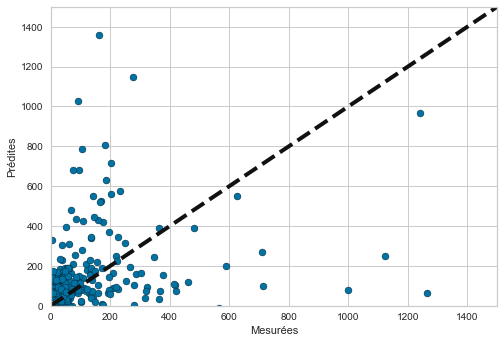

In [81]:
# Graphique de Prédictions :

fig, ax = plt.subplots()
ax.scatter(y_test, y_pred, edgecolors=(0, 0, 0))
ax.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
ax.set_xlim([0, 1500])
ax.set_ylim([0, 1500])
ax.set_xlabel('Mesurées')
ax.set_ylabel('Prédites')
plt.show()

In [82]:
# Résultats Regression Linéaires Multiples :

import math
results = results.append(pd.DataFrame({
    'Modèle' : ['Regression Multiple'],'R^2' : r2_score(y_test, y_pred),'Mean Absolute Error' : metrics.mean_absolute_error(y_test, y_pred),'Mean Squared Error': metrics.mean_squared_error(y_test, y_pred),
    'Score_RMSE' : [np.sqrt(metrics.mean_squared_error(y_test, y_pred))]}),
              ignore_index=True)

# Régression Ridge :

In [83]:
# Création d'un modèle de regression linéaire avec Ridge :

regressor = Ridge(alpha=1.0)
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)

In [84]:
# "Print" Pondération et Métriques par Ridge :

print("\n===Ridge Regularization===")
print("Weights: \n", regressor.coef_)
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print("R^2: %.3f" % r2_score(y_test, y_pred))


===Ridge Regularization===
Weights: 
 [   5.55770663   -2.4109106     2.46007929  -51.86748249  -70.48860812
  -61.60060277  397.16889065   75.68200355   -4.58799033   -5.26000833
 -111.68604804   12.40607615  -42.08546955   42.08546955  -11.5024196
  -60.70530403]
Mean Absolute Error: 252.43602491920058
Mean Squared Error: 684599.988938488
Root Mean Squared Error: 827.4055770530483
R^2: 0.301


# Analyse des Résidus :

In [85]:
# Comparaison des Valeurs Actuelles de Test aux Valeurs Prédites :

compare = pd.DataFrame({'Valeur Actuelle': y_test.values.ravel(), 'Valeur Prédite': y_pred})
compare

,Valeur Actuelle,Valeur Prédite
0,109.59,138.048877
1,1623.34,424.394266
2,45.83,144.766447
3,6.73,51.150401
4,263.51,-22.684555
...,...,...
322,67.48,482.286382
323,73.67,-581.412938
324,346.62,243.482410
325,648.62,-125.161778


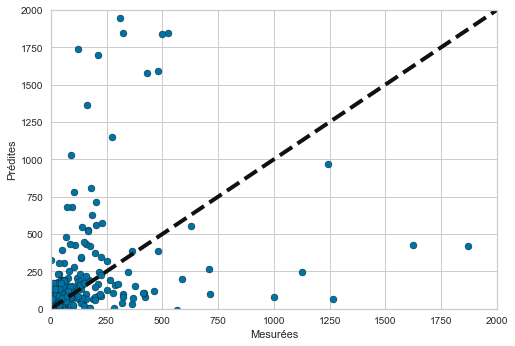

In [86]:
# Graphique de Prédictions :

fig, ax = plt.subplots()
ax.scatter(y_test, y_pred, edgecolors=(0, 0, 0))
ax.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
ax.set_xlim([0, 2000])
ax.set_ylim([0, 2000])
ax.set_xlabel('Mesurées')
ax.set_ylabel('Prédites')
plt.show()

In [87]:
# Résultats Regression Linéaires Multiples :

import math
results = results.append(pd.DataFrame({
    'Modèle' : ['Regression Ridge'],'R^2' : r2_score(y_test, y_pred),'Mean Absolute Error' : metrics.mean_absolute_error(y_test, y_pred),'Mean Squared Error': metrics.mean_squared_error(y_test, y_pred),
    'Score_RMSE' : [np.sqrt(metrics.mean_squared_error(y_test, y_pred))]}),
              ignore_index=True)

# Régression Ridge : Log :

In [88]:
# Isolation de la Target 'TotalGHGEmissionsLog' du Dataset :

y_log = data['TotalGHGEmissionsLog']
y_log.shape

(1633,)

In [89]:
# Split du Dataset en Train set et Test set :

X_train_log, X_test_log, y_train_log, y_test_log = train_test_split(X, y_log, test_size=0.2, random_state=seed)

print(f'X_train : {X_train.shape} - X_test : {X_test.shape}')
print(f'y_train : {y_train_log.shape} - y_test : {y_test_log.shape}')

X_train : (1306, 16) - X_test : (327, 16)
y_train : (1306,) - y_test : (327,)


In [90]:
# Evitement du Message d'Erreur :

X_train_log = X_train_log.replace((np.inf, -np.inf, np.nan), 0).reset_index(drop=True)
X_test_log = X_test_log.replace((np.inf, -np.inf, np.nan), 0).reset_index(drop=True)

In [91]:
# "Normalisation" Variables Quantitatives :

scaler_rob = RobustScaler()
X_train_log[cols_num2] = scaler_rob.fit_transform(X_train_log[cols_num2])
X_test_log[cols_num2] = scaler_rob.transform(X_test_log[cols_num2])

In [92]:
# Encodage par "get_dummies" :

X_train_log_encoded = pd.get_dummies(X_train_log[cols_cat])
X_train_log_encoded

,BuildingType_Campus,BuildingType_NonResidential,BuildingType_Nonresidential COS,BuildingType_SPS-District K-12,PrimaryPropertyType_College/University,PrimaryPropertyType_Distribution Center,PrimaryPropertyType_Hospital,PrimaryPropertyType_Hotel,PrimaryPropertyType_K-12 School,PrimaryPropertyType_Laboratory,...,ThirdLargestPropertyUseType_Refrigerated Warehouse,ThirdLargestPropertyUseType_Restaurant,ThirdLargestPropertyUseType_Retail Store,ThirdLargestPropertyUseType_Self-Storage Facility,ThirdLargestPropertyUseType_Social/Meeting Hall,ThirdLargestPropertyUseType_Strip Mall,ThirdLargestPropertyUseType_Supermarket/Grocery Store,ThirdLargestPropertyUseType_Swimming Pool,ThirdLargestPropertyUseType_Vocational School,ThirdLargestPropertyUseType_Worship Facility
0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1301,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1302,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1303,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1304,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [93]:
# Encodage par "get_dummies" :

X_test_log_encoded = pd.get_dummies(X_test_log[cols_cat])
X_test_log_encoded

,BuildingType_Campus,BuildingType_NonResidential,BuildingType_Nonresidential COS,BuildingType_SPS-District K-12,PrimaryPropertyType_College/University,PrimaryPropertyType_Distribution Center,PrimaryPropertyType_Hospital,PrimaryPropertyType_Hotel,PrimaryPropertyType_K-12 School,PrimaryPropertyType_Laboratory,...,ThirdLargestPropertyUseType_Other - Entertainment/Public Assembly,ThirdLargestPropertyUseType_Other - Recreation,ThirdLargestPropertyUseType_Other - Services,ThirdLargestPropertyUseType_Parking,"ThirdLargestPropertyUseType_Personal Services (Health/Beauty, Dry Cleaning, etc)",ThirdLargestPropertyUseType_Pre-school/Daycare,ThirdLargestPropertyUseType_Restaurant,ThirdLargestPropertyUseType_Retail Store,ThirdLargestPropertyUseType_Social/Meeting Hall,ThirdLargestPropertyUseType_Swimming Pool
0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
322,0,1,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
323,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
324,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
325,0,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [94]:
# Même Nombre de Colonnes entre les deux Datasets :

cols = X_train_log_encoded.columns.tolist()
X_test_log_encoded = X_test_encoded.reindex(columns=cols).fillna(0)
X_test_log_encoded

,BuildingType_Campus,BuildingType_NonResidential,BuildingType_Nonresidential COS,BuildingType_SPS-District K-12,PrimaryPropertyType_College/University,PrimaryPropertyType_Distribution Center,PrimaryPropertyType_Hospital,PrimaryPropertyType_Hotel,PrimaryPropertyType_K-12 School,PrimaryPropertyType_Laboratory,...,ThirdLargestPropertyUseType_Refrigerated Warehouse,ThirdLargestPropertyUseType_Restaurant,ThirdLargestPropertyUseType_Retail Store,ThirdLargestPropertyUseType_Self-Storage Facility,ThirdLargestPropertyUseType_Social/Meeting Hall,ThirdLargestPropertyUseType_Strip Mall,ThirdLargestPropertyUseType_Supermarket/Grocery Store,ThirdLargestPropertyUseType_Swimming Pool,ThirdLargestPropertyUseType_Vocational School,ThirdLargestPropertyUseType_Worship Facility
0,0,1,0,0,0,0,0,0,0,0,...,0.0,0,0,0.0,0,0.0,0.0,0,0.0,0.0
1,0,1,0,0,0,0,0,0,0,0,...,0.0,0,0,0.0,1,0.0,0.0,0,0.0,0.0
2,0,1,0,0,0,0,0,0,0,0,...,0.0,0,0,0.0,0,0.0,0.0,0,0.0,0.0
3,0,1,0,0,0,0,0,0,0,0,...,0.0,0,0,0.0,0,0.0,0.0,0,0.0,0.0
4,0,1,0,0,0,0,0,1,0,0,...,0.0,1,0,0.0,0,0.0,0.0,0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
322,0,1,0,0,0,0,0,0,0,0,...,0.0,0,0,0.0,0,0.0,0.0,0,0.0,0.0
323,0,1,0,0,0,0,0,0,0,0,...,0.0,0,0,0.0,0,0.0,0.0,0,0.0,0.0
324,0,1,0,0,0,0,0,0,0,0,...,0.0,0,0,0.0,0,0.0,0.0,0,0.0,0.0
325,0,1,0,0,0,0,0,1,0,0,...,0.0,0,0,0.0,0,0.0,0.0,0,0.0,0.0


In [95]:
# Visualisation du Dataset train "encodé" et "normalisé" :

X_train_log = pd.concat([X_train_log[cols_num2]], axis = 1)
X_train_log

,DataYear,YearBuilt,BuildingAge,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),LargestPropertyUseTypeGFA,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseTypeGFA,NumberofBuildings,NumberofFloors,TotalUseTypeNumber,GFABuildingRate,GFAParkingRate,GFAPerBuilding,GFAPerFloor
0,-1.0,-0.666667,0.656250,-0.216580,0.000000,-0.253420,-0.147376,-0.434385,0.000000,0.0,0.000000,0.0,0.000000,0.000000,-0.214904,-0.506979
1,0.0,-0.174603,0.187500,2.692604,5.957746,2.864011,2.379671,2.665699,3.141741,0.0,4.666667,0.0,-1.246219,1.246219,2.711258,-0.020958
2,0.0,0.190476,-0.171875,-0.280889,0.155704,-0.370757,-0.329449,-0.377674,0.385253,0.0,0.333333,3.0,-0.524304,0.524304,-0.279588,-0.692014
3,0.0,-0.111111,0.125000,-0.161258,0.000000,-0.175050,0.132610,0.187932,0.000000,0.0,0.000000,0.0,0.000000,0.000000,-0.159259,-0.416825
4,0.0,-0.666667,0.671875,-0.134314,0.000000,-0.136879,-0.122892,-0.388609,0.000000,0.0,0.000000,0.0,0.000000,0.000000,-0.132157,-0.372915
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1301,-1.0,0.222222,-0.218750,1.833729,13.882394,0.312094,1.893323,2.497563,0.000000,0.0,1.000000,0.0,-3.982826,3.982826,1.847371,0.950776
1302,-1.0,-1.095238,1.078125,-0.156400,0.000000,-0.168168,-0.157607,-0.384876,0.000000,0.0,0.666667,0.0,0.000000,0.000000,-0.154373,-0.618432
1303,-1.0,0.111111,-0.109375,-0.152958,0.000000,-0.163291,-0.041127,-0.475712,0.000000,0.0,-0.333333,0.0,0.000000,0.000000,-0.150910,-0.138589
1304,0.0,-0.761905,0.765625,0.076127,0.886338,0.011901,-0.196895,0.047813,2.966023,0.0,0.000000,2.0,-1.061098,1.061098,0.079512,-0.029974


In [96]:
# Visualisation du Dataset train "encodé" et "normalisé" :

X_test_log = pd.concat([X_test_log[cols_num2]], axis = 1)
X_test_log

,DataYear,YearBuilt,BuildingAge,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),LargestPropertyUseTypeGFA,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseTypeGFA,NumberofBuildings,NumberofFloors,TotalUseTypeNumber,GFABuildingRate,GFAParkingRate,GFAPerBuilding,GFAPerFloor
0,0.0,0.365079,-0.343750,-0.077166,0.533239,-0.145766,0.014479,-0.306030,0.000000,0.0,0.000000,0.0,-0.882613,0.882613,-0.074676,-0.279785
1,0.0,0.349206,-0.328125,0.817566,0.000000,1.211583,0.949342,1.903640,5.646102,0.0,1.000000,7.0,0.000000,0.000000,0.825277,0.122790
2,-1.0,0.015873,-0.015625,0.160513,1.826056,-0.026887,0.078165,0.333255,0.514955,0.0,0.333333,1.0,-1.897096,1.897096,0.164390,-0.152522
3,0.0,-0.825397,0.828125,-0.272204,0.000000,-0.332218,-0.350230,-0.059049,0.000000,0.0,-0.333333,0.0,0.000000,0.000000,-0.270852,-0.430079
4,-1.0,0.428571,-0.421875,0.389615,1.060845,0.426595,0.510080,0.092307,0.989245,0.0,2.666667,1.0,-0.811018,0.811018,0.394829,-0.547187
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
322,-1.0,0.380952,-0.375000,1.089526,0.000000,1.596851,1.584587,-0.114441,0.944513,0.0,0.000000,4.0,0.000000,0.000000,1.098825,1.621493
323,-1.0,0.492063,-0.484375,2.716525,13.776127,1.580595,1.491796,0.948935,0.000000,0.0,2.666667,0.0,-2.860058,2.860058,2.735319,0.486997
324,0.0,-0.095238,0.109375,0.937841,0.000000,1.381969,1.396720,-0.085934,1.756755,0.0,2.666667,3.0,0.000000,0.000000,0.946255,-0.303530
325,0.0,0.174603,-0.156250,2.168508,4.056338,2.441925,3.097011,1.696213,0.000000,0.0,10.000000,0.0,-1.016547,1.016547,2.184104,-0.540667


In [97]:
# Evitement du Message d'Erreur :

X_train_log = X_train_log.replace((np.inf, -np.inf, np.nan), 0).reset_index(drop=True)
X_test_log = X_test_log.replace((np.inf, -np.inf, np.nan), 0).reset_index(drop=True)

In [98]:
# Création d'un modèle de regression linéaire avec Ridge :

regressor = Ridge(alpha=1.0)
regressor.fit(X_train_log, y_train_log)
y_pred_log = regressor.predict(X_test_log)

In [99]:
# "Print" Pondération et Métriques par Ridge :

print("\n===Ridge Regularization===")
print("Weights: \n", regressor.coef_)
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test_log, y_pred_log))
print('Mean Squared Error:', metrics.mean_squared_error(y_test_log, y_pred_log))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test_log, y_pred_log)))
print("R^2: %.3f" % r2_score(y_test_log, y_pred_log))


===Ridge Regularization===
Weights: 
 [ 0.00267004  0.02139998 -0.02102389 -0.04886659 -0.0193636  -0.0659634
  0.08008452  0.05217425  0.00338784  0.02327042  0.03192255  0.03594883
 -0.00267657  0.00267657  0.11737835  0.0405443 ]
Mean Absolute Error: 0.3857672796623588
Mean Squared Error: 0.2545931417153784
Root Mean Squared Error: 0.5045722363699556
R^2: 0.299


# Analyse des Résidus :

In [100]:
# Comparaison des Valeurs Actuelles de Test aux Valeurs Prédites :

compare = pd.DataFrame({'Valeur Actuelle': y_test_log.values.ravel(), 'Valeur Prédite': y_pred_log})
compare

,Valeur Actuelle,Valeur Prédite
0,2.043716,1.663007
1,3.210677,2.149487
2,1.670524,1.726916
3,0.888179,1.584241
4,2.422442,1.821341
...,...,...
322,1.835564,1.992535
323,1.873146,1.799606
324,2.541105,1.938832
325,2.812659,2.232163


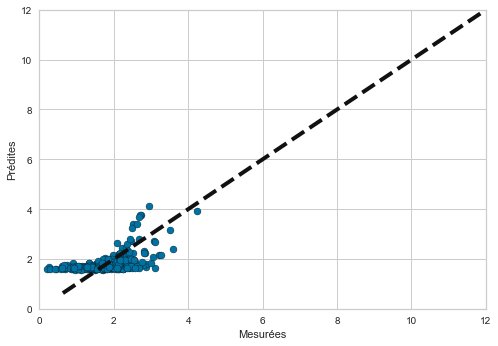

In [101]:
# Graphique de Prédictions :

fig, ax = plt.subplots()
ax.scatter(y_test_log, y_pred_log, edgecolors=(0, 0, 0))
ax.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
ax.set_xlim([0, 12])
ax.set_ylim([0, 12])
ax.set_xlabel('Mesurées')
ax.set_ylabel('Prédites')
plt.show()

# Régression par Lasso :

In [102]:
# Création d'un modèle de regression linéaire avec Lasso :

regressor = Lasso(alpha=1.0)
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)

In [103]:
# "Print" Pondération et Métriques par Lasso :

print("\n===LASSO Regularization===")
print("Weights: \n", regressor.coef_)
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print("R^2: %.3f" % r2_score(y_test, y_pred))


===LASSO Regularization===
Weights: 
 [   1.23639075   -0.            0.         -104.0705244   -63.97627615
  -22.73832193  391.47878632   74.47242501   -4.92995331   -4.09460008
 -111.36884068   11.45739131  -81.62805305    0.           -6.60799827
  -60.30325248]
Mean Absolute Error: 252.59053648871594
Mean Squared Error: 691378.4436860374
Root Mean Squared Error: 831.4916979056601
R^2: 0.294


# Analyse des Résidus :

In [104]:
# Comparaison des Valeurs Actuelles de Test aux Valeurs Prédites :

compare = pd.DataFrame({'Valeur Actuelle': y_test.values.ravel(), 'Valeur Prédite': y_pred})
compare

,Valeur Actuelle,Valeur Prédite
0,109.59,137.405631
1,1623.34,416.808059
2,45.83,143.913855
3,6.73,47.111638
4,263.51,-18.719822
...,...,...
322,67.48,484.893006
323,73.67,-569.634518
324,346.62,240.026308
325,648.62,-126.629108


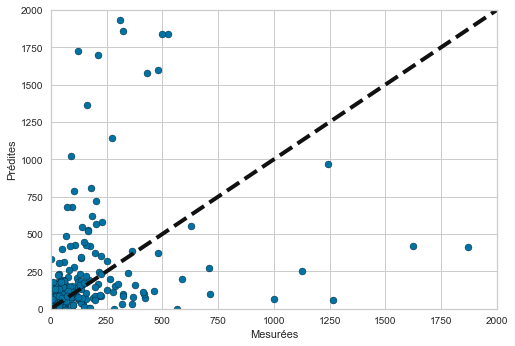

In [105]:
# Graphique de Prédictions :

fig, ax = plt.subplots()
ax.scatter(y_test, y_pred, edgecolors=(0, 0, 0))
ax.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
ax.set_xlim([0, 2000])
ax.set_ylim([0, 2000])
ax.set_xlabel('Mesurées')
ax.set_ylabel('Prédites')
plt.show()

In [106]:
# Résultats Regression Linéaires Multiples :

import math
results = results.append(pd.DataFrame({
    'Modèle' : ['Regression Lasso'],'R^2' : r2_score(y_test, y_pred),'Mean Absolute Error' : metrics.mean_absolute_error(y_test, y_pred),'Mean Squared Error': metrics.mean_squared_error(y_test, y_pred),
    'Score_RMSE' : [np.sqrt(metrics.mean_squared_error(y_test, y_pred))]}),
              ignore_index=True)

# Régression par Elastic Net :

In [107]:
# Création d'un modèle de regression linéaire avec Elastic Net :

regressor = ElasticNet(alpha=1.0,l1_ratio=0.5)
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)

In [108]:
# "Print" Pondération et Métriques par Elastic Net :

print("\n===Elastic Net Regularization===")
print("Weights: \n", regressor.coef_)
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print("R^2: %.3f" % r2_score(y_test, y_pred))


===Elastic Net Regularization===
Weights: 
 [ -0.34098331   2.68397014  -2.64738437  21.45339708 -54.67590352
  40.16750934 169.6105834   60.09384778 -21.74367571  -4.26106775
 -80.62575292   3.21856279 -24.1059021   24.10595624  23.59095228
 -36.40975637]
Mean Absolute Error: 241.7772457726126
Mean Squared Error: 932111.611719647
Root Mean Squared Error: 965.4592750187068
R^2: 0.048


# Analyse des Résidus :

In [109]:
# Comparaison des Valeurs Actuelles de Test aux Valeurs Prédites :

compare = pd.DataFrame({'Valeur Actuelle': y_test.values.ravel(), 'Valeur Prédite': y_pred})
compare

,Valeur Actuelle,Valeur Prédite
0,109.59,106.867934
1,1623.34,284.163674
2,45.83,108.872625
3,6.73,56.202729
4,263.51,3.807063
...,...,...
322,67.48,417.579562
323,73.67,-242.176240
324,346.62,203.250181
325,648.62,-28.512232


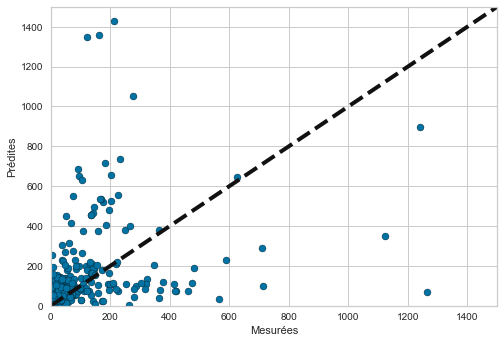

In [110]:
# Graphique de Prédictions :

fig, ax = plt.subplots()
ax.scatter(y_test, y_pred, edgecolors=(0, 0, 0))
ax.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
ax.set_xlim([0, 1500])
ax.set_ylim([0, 1500])
ax.set_xlabel('Mesurées')
ax.set_ylabel('Prédites')
plt.show()

In [111]:
# Résultats Régressions Linéaires Multiples :

import math
results = results.append(pd.DataFrame({
    'Modèle' : ['Regression Elastic Net'],'R^2' : r2_score(y_test, y_pred),'Mean Absolute Error' : metrics.mean_absolute_error(y_test, y_pred),'Mean Squared Error': metrics.mean_squared_error(y_test, y_pred),
    'Score_RMSE' : [np.sqrt(metrics.mean_squared_error(y_test, y_pred))]}),
              ignore_index=True)

# "Tuning" des Hyperparamètres avec Optuna :

In [112]:
pip install optuna

Note: you may need to restart the kernel to use updated packages.


In [113]:
# Cross Validation :

def ridge_objective(trial):   
    _alpha = trial.suggest_float("alpha", 0.1, 20)    
    ridge = Ridge(alpha=_alpha, random_state=42)   
    scores = cross_val_score(ridge, X_train, y_train, 
                             cv=KFold(n_splits=10,
                                      shuffle=True,
                                      random_state=42),
                             scoring="neg_root_mean_squared_error"
                            )  
    return scores.mean()

In [114]:
# Etude :

import optuna
study = optuna.create_study(direction="maximize")

[I 2022-05-25 11:28:58,175] A new study created in memory with name: no-name-7e1d9222-b751-484e-8fbd-0b3bc87788bd


In [115]:
# Optimisation :

study.optimize(ridge_objective, n_trials=10)

[I 2022-05-25 11:28:58,217] Trial 0 finished with value: -570.0836749462294 and parameters: {'alpha': 8.641398462054873}. Best is trial 0 with value: -570.0836749462294.
[I 2022-05-25 11:28:58,246] Trial 1 finished with value: -573.8258268333528 and parameters: {'alpha': 6.901051726614565}. Best is trial 0 with value: -570.0836749462294.
[I 2022-05-25 11:28:58,277] Trial 2 finished with value: -559.0294654424116 and parameters: {'alpha': 16.552441008156183}. Best is trial 2 with value: -559.0294654424116.
[I 2022-05-25 11:28:58,308] Trial 3 finished with value: -560.7661996831685 and parameters: {'alpha': 14.911832912002799}. Best is trial 2 with value: -559.0294654424116.
[I 2022-05-25 11:28:58,335] Trial 4 finished with value: -557.158750534642 and parameters: {'alpha': 18.569340026948996}. Best is trial 4 with value: -557.158750534642.
[I 2022-05-25 11:28:58,364] Trial 5 finished with value: -585.7362547017897 and parameters: {'alpha': 2.9517553863773225}. Best is trial 4 with value

In [116]:
# Résultats :

best_params = study.best_params
best_score = study.best_value
print(f"Best score: {best_score}\n")
print(f"Optimized parameters: {best_params}\n")

Best score: -557.158750534642

Optimized parameters: {'alpha': 18.569340026948996}



# Conclusion :

In [117]:
# Présentation des Résultats :

results

,Modèle,R^2,Mean Absolute Error,Mean Squared Error,Score_RMSE
0,Baseline Moyenne,-0.000002,246.483212,9.793009e+05,989.596348
1,Baseline Médiane,-0.022890,184.825856,1.001715e+06,1000.856928
2,Regression Multiple,0.302193,252.475882,6.833617e+05,826.656922
3,Regression Ridge,0.300928,252.436025,6.846000e+05,827.405577
4,Regression Lasso,0.294007,252.590536,6.913784e+05,831.491698
5,Regression Elastic Net,0.048185,241.777246,9.321116e+05,965.459275


# Modèles Ensemblistes :

# Random Forest Regression :

In [118]:
# Import Random Forest Regressor :

from sklearn.ensemble import RandomForestRegressor

In [119]:
# Fit du Modèle :

regressor = RandomForestRegressor(n_estimators = 10, random_state=0)
regressor.fit(X_train, y_train)

RandomForestRegressor(n_estimators=10, random_state=0)

In [120]:
# Prédictions :

y_pred = regressor.predict(X_test)

In [121]:
# "Print" Métriques par Random Forest Regressor :

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print("R^2: %.3f" % r2_score(y_test, y_pred))

Mean Absolute Error: 155.98819266055045
Mean Squared Error: 759703.6550535933
Root Mean Squared Error: 871.6098066529503
R^2: 0.224


# Analyse des Résidus :

In [122]:
# Comparaison des Valeurs Actuelles de Test aux Valeurs Prédites :

compare = pd.DataFrame({'Valeur Actuelle': y_test.values.ravel(), 'Valeur Prédite': y_pred})
compare

,Valeur Actuelle,Valeur Prédite
0,109.59,89.104
1,1623.34,296.275
2,45.83,50.066
3,6.73,55.508
4,263.51,195.734
...,...,...
322,67.48,90.991
323,73.67,137.043
324,346.62,261.863
325,648.62,633.548


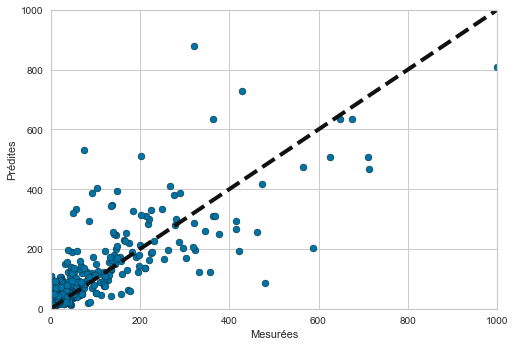

In [123]:
# Graphique de Prédictions :

fig, ax = plt.subplots()
ax.scatter(y_test, y_pred, edgecolors=(0, 0, 0))
ax.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
ax.set_xlim([0, 1000])
ax.set_ylim([0, 1000])
ax.set_xlabel('Mesurées')
ax.set_ylabel('Prédites')
plt.show()

In [124]:
# Résultats Modèles Ensemblistes :

import math
results = results.append(pd.DataFrame({
    'Modèle' : ['Random Forest'],'R^2' : r2_score(y_test, y_pred),'Mean Absolute Error' : metrics.mean_absolute_error(y_test, y_pred),'Mean Squared Error': metrics.mean_squared_error(y_test, y_pred),
    'Score_RMSE' : [np.sqrt(metrics.mean_squared_error(y_test, y_pred))]}),
              ignore_index=True)

# XG BOOST Regression :

In [125]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [126]:
# Importation :

import xgboost as xgb
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error as mse

In [127]:
# Instantiation avec hyperparamètres :

xgb_reg = xgb.XGBRegressor(max_depth=3, n_estimators=100, n_jobs=2,
                           objective='reg:squarederror', booster='gbtree',
                           random_state=42, learning_rate=0.05)

In [128]:
# Fit du Modèle :

xgb_reg.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.05, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=2,
             num_parallel_tree=1, predictor='auto', random_state=42,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [129]:
# Prédictions :

y_pred = xgb_reg.predict(X_test)

In [130]:
# "Print" Métriques par XG BOOST Regressor :

MSE = mse(y_test, y_pred)
RMSE = np.sqrt(MSE)

R_squared = r2_score(y_test, y_pred)

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print("R^2: %.3f" % np.round(R_squared,2))

Mean Absolute Error: 232.51750647868582
Mean Squared Error: 1328955.0992297744
Root Mean Squared Error: 1152.803148516595
R^2: -0.360


# Analyse des Résidus :

In [131]:
# Comparaison des Valeurs Actuelles de Test aux Valeurs Prédites :

compare = pd.DataFrame({'Valeur Actuelle': y_test.values.ravel(), 'Valeur Prédite': y_pred})
compare

,Valeur Actuelle,Valeur Prédite
0,109.59,79.512100
1,1623.34,204.174103
2,45.83,86.104675
3,6.73,66.370506
4,263.51,102.891899
...,...,...
322,67.48,195.255981
323,73.67,175.140411
324,346.62,203.975540
325,648.62,435.760040


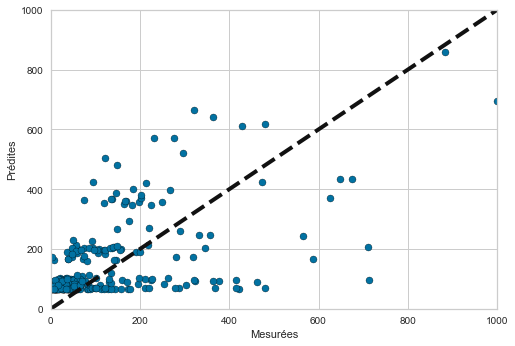

In [132]:
# Graphique de Prédictions :

fig, ax = plt.subplots()
ax.scatter(y_test, y_pred, edgecolors=(0, 0, 0))
ax.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
ax.set_xlim([0, 1000])
ax.set_ylim([0, 1000])
ax.set_xlabel('Mesurées')
ax.set_ylabel('Prédites')
plt.show()

In [133]:
# Résultats Modèles Ensemblistes :

import math
results = results.append(pd.DataFrame({
    'Modèle' : ['XG BOOST'],'R^2' : r2_score(y_test, y_pred),'Mean Absolute Error' : metrics.mean_absolute_error(y_test, y_pred),'Mean Squared Error': metrics.mean_squared_error(y_test, y_pred),
    'Score_RMSE' : [np.sqrt(metrics.mean_squared_error(y_test, y_pred))]}),
              ignore_index=True)

# Conclusion :

In [134]:
# Présentation des Résultats :

results

,Modèle,R^2,Mean Absolute Error,Mean Squared Error,Score_RMSE
0,Baseline Moyenne,-0.000002,246.483212,9.793009e+05,989.596348
1,Baseline Médiane,-0.022890,184.825856,1.001715e+06,1000.856928
2,Regression Multiple,0.302193,252.475882,6.833617e+05,826.656922
3,Regression Ridge,0.300928,252.436025,6.846000e+05,827.405577
4,Regression Lasso,0.294007,252.590536,6.913784e+05,831.491698
5,Regression Elastic Net,0.048185,241.777246,9.321116e+05,965.459275
6,Random Forest,0.224237,155.988193,7.597037e+05,871.609807
7,XG BOOST,-0.357048,232.517506,1.328955e+06,1152.803149


# Validation Croisée et Optimisation des Hyperparamètres :

# Régression Linéaire : 

# Elastic Net / Cross Validation :

In [135]:
# Importation :

from sklearn.linear_model import LinearRegression,Ridge, ElasticNet, Lasso
from sklearn.metrics import mean_squared_error, r2_score
from numpy import mean
from numpy import std
from numpy import absolute

In [136]:
# Fit du Modèle :

model = ElasticNet(random_state=0)
model.fit(X_train, y_train)
print('Train score:', model.score(X_train, y_train))
print('Test score:', model.score(X_test, y_test))

Train score: 0.505522663234629
Test score: 0.0481845349100003


In [137]:
from sklearn.model_selection import cross_val_score 

scores = cross_val_score(ElasticNet(random_state=0), X_train, y_train, cv=5, scoring ='neg_mean_absolute_error')
scores

array([-171.52463524, -169.70757351, -242.50043881, -224.32758444,
       -196.5653879 ])

In [138]:
scores = absolute(scores)
print('Mean MAE: %.3f (%.3f)' % (mean(scores), std(scores)))

Mean MAE: 200.925 (28.755)


# Elastic Net / Grid Search :

# Rappel de la Fonction de Coût du Elasticnet :

1 / (2 * n_samples) * ||y - Xw||^2_2 + alpha * l1_ratio * ||w||_1 + 0.5 * alpha * (1 - l1_ratio) * ||w||^2_2

Alpha est un coefficient qui multiplie le terme de pénalité.

L1 ratio, si L1 = 1 alors Lasso, L1 = 0 alors Ridge.

In [139]:
# Importation :

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import ElasticNet

In [140]:
# Paramètrage :

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import ElasticNet

parameters = {"tol" : [0.1,0.01,0.001,0.0001],
              "alpha": [0.0001, 0.001, 0.01, 0.1, 1, 10, 100],
              "l1_ratio": np.arange(0.0, 1.0, 0.1)}


elastic_grid = GridSearchCV(estimator = ElasticNet(), 
                      param_grid = parameters,
                      scoring = 'neg_mean_squared_error',
                      cv=5,
                      verbose=0
                     )

elastic_grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=ElasticNet(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100],
                         'l1_ratio': array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]),
                         'tol': [0.1, 0.01, 0.001, 0.0001]},
             scoring='neg_mean_squared_error')

In [141]:
# Recherche des Hyperparamètres Optimaux :

elastic_grid.best_params_

{'alpha': 1, 'l1_ratio': 0.9, 'tol': 0.1}

# Modèles Ensemblistes : 

# Random Forest Regression / Cross Validation :

In [142]:
# Import Random Forest Regressor :

from sklearn.ensemble import RandomForestRegressor

In [143]:
# Fit du Modèle :

model = RandomForestRegressor(n_estimators = 10, random_state=0)
model.fit(X_train, y_train)
print('Train score:', model.score(X_train, y_train))
print('Test score:', model.score(X_test, y_test))

Train score: 0.9036725010205952
Test score: 0.22423701338580027


In [144]:
from sklearn.model_selection import cross_val_score 

scores = cross_val_score(model, X_train, y_train, cv=5, scoring ='neg_mean_absolute_error')
scores

array([-111.56741985, -121.15510728, -197.62044828, -158.14088889,
       -122.99461303])

In [145]:
scores = absolute(scores)
print('Mean MAE: %.3f (%.3f)' % (mean(scores), std(scores)))

Mean MAE: 142.296 (31.861)


# Random Forest Regression / Grid Search :

In [146]:
# Importation :

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor

In [147]:
# Paramètrage :

from sklearn.ensemble import RandomForestRegressor

parameters = {
    'n_estimators' : [10,50,100,300], # Nombre d'Arbres de Décision.
    'min_samples_leaf' : [1,3,5,10], # Nombre de Feuilles Minimales dans un Noeud.
    'max_features': ['auto', 'sqrt'] # Nombre de Features observées pour chaque Arbre.
}

rfr_search = GridSearchCV(RandomForestRegressor(),
                               param_grid = parameters,
                               scoring='neg_mean_squared_error',
                               verbose=2,
                               cv=5)

rfr_search.fit(X_train, y_train)

Fitting 5 folds for each of 32 candidates, totalling 160 fits
[CV] END max_features=auto, min_samples_leaf=1, n_estimators=10; total time=   0.1s
[CV] END max_features=auto, min_samples_leaf=1, n_estimators=10; total time=   0.1s
[CV] END max_features=auto, min_samples_leaf=1, n_estimators=10; total time=   0.1s
[CV] END max_features=auto, min_samples_leaf=1, n_estimators=10; total time=   0.1s
[CV] END max_features=auto, min_samples_leaf=1, n_estimators=10; total time=   0.1s
[CV] END max_features=auto, min_samples_leaf=1, n_estimators=50; total time=   0.3s
[CV] END max_features=auto, min_samples_leaf=1, n_estimators=50; total time=   0.3s
[CV] END max_features=auto, min_samples_leaf=1, n_estimators=50; total time=   0.3s
[CV] END max_features=auto, min_samples_leaf=1, n_estimators=50; total time=   0.3s
[CV] END max_features=auto, min_samples_leaf=1, n_estimators=50; total time=   0.4s
[CV] END max_features=auto, min_samples_leaf=1, n_estimators=100; total time=   0.6s
[CV] END max_

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 3, 5, 10],
                         'n_estimators': [10, 50, 100, 300]},
             scoring='neg_mean_squared_error', verbose=2)

In [148]:
# Recherche des Hyperparamètres Optimaux :

rfr_search.best_params_

{'max_features': 'sqrt', 'min_samples_leaf': 1, 'n_estimators': 100}

# XG Boost / Grid Search :

In [149]:
# Paramètrage :

from xgboost import XGBRegressor


parameters = {
    'n_estimators' : [100,500,1000]
}

xgb_grid = GridSearchCV(XGBRegressor(n_jobs=-1),
                        param_grid = parameters,
                        scoring = 'neg_mean_squared_error',
                        cv = 5,
                        verbose=5)
xgb_grid.fit(X_train, y_train)

Fitting 5 folds for each of 3 candidates, totalling 15 fits
[CV 1/5] END .............n_estimators=100;, score=-47659.523 total time=   0.3s
[CV 2/5] END ..............n_estimators=100;, score=-7876.146 total time=   0.2s
[CV 3/5] END ...........n_estimators=100;, score=-1160437.947 total time=   0.2s
[CV 4/5] END .............n_estimators=100;, score=-91343.544 total time=   0.2s
[CV 5/5] END ............n_estimators=100;, score=-457705.569 total time=   0.2s
[CV 1/5] END .............n_estimators=500;, score=-47347.233 total time=   0.8s
[CV 2/5] END ..............n_estimators=500;, score=-7737.965 total time=   1.3s
[CV 3/5] END ...........n_estimators=500;, score=-1161453.957 total time=   0.9s
[CV 4/5] END .............n_estimators=500;, score=-91258.048 total time=   0.7s
[CV 5/5] END ............n_estimators=500;, score=-457481.849 total time=   0.8s
[CV 1/5] END ............n_estimators=1000;, score=-47347.008 total time=   1.4s
[CV 2/5] END .............n_estimators=1000;, sco

GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None,
                                    enable_categorical=False, gamma=None,
                                    gpu_id=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, max_delta_step=None,
                                    max_depth=None, min_child_weight=None,
                                    missing=nan, monotone_constraints=None,
                                    n_estimators=100, n_jobs=-1,
                                    num_parallel_tree=None, predictor=None,
                                    random_state=None, reg_alpha=None,
                                    reg_lambda=None, scale_pos_weight=None,
         

In [150]:
# Recherche des Hyperparamètres Optimaux :

xgb_grid.best_params_

{'n_estimators': 100}

In [151]:
# Recherche des Estimateurs Optimaux :

xgb_grid.best_estimator_

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.300000012,
             max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=-1,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [152]:
# Recherche des Hyperparamètres Optimaux :

xgb_grid.best_estimator_.feature_importances_

array([3.61692830e-04, 7.60956900e-03, 1.10957271e-03, 1.64316129e-02,
       4.45905095e-03, 3.22132297e-02, 2.22730771e-01, 4.27490592e-01,
       1.15512805e-02, 1.01515129e-02, 2.01337099e-01, 2.44748220e-03,
       5.30531164e-03, 0.00000000e+00, 4.58985493e-02, 1.09026395e-02],
      dtype=float32)

# Méthode A Noyaux :

# Support Vector Regression / Grid Search :

In [153]:
# Paramètrage :

from sklearn.svm import SVR

parameters = {'gamma' : [1e-8, 1e-7, 1e-6, 1e-5, 1e-4, 1e-3, 1e-2, 1e-1], # Kernel Coefficient [ici kernel = Radial Basis Function]
              'epsilon' : [0.001, 0.01, 0.1, 1], # Erreur tolérée par l'algorithme
              'C' : [0.001, 0.01, 0.1, 1, 10]} # Paramètre de régularisation

svm = GridSearchCV(estimator = SVR(), 
                      param_grid = parameters,
                      scoring = 'neg_mean_squared_error',
                      cv=5,
                   verbose=2
                     )

svm.fit(X_train, y_train)

Fitting 5 folds for each of 160 candidates, totalling 800 fits
[CV] END ................C=0.001, epsilon=0.001, gamma=1e-08; total time=   0.1s
[CV] END ................C=0.001, epsilon=0.001, gamma=1e-08; total time=   0.1s
[CV] END ................C=0.001, epsilon=0.001, gamma=1e-08; total time=   0.1s
[CV] END ................C=0.001, epsilon=0.001, gamma=1e-08; total time=   0.1s
[CV] END ................C=0.001, epsilon=0.001, gamma=1e-08; total time=   0.1s
[CV] END ................C=0.001, epsilon=0.001, gamma=1e-07; total time=   0.1s
[CV] END ................C=0.001, epsilon=0.001, gamma=1e-07; total time=   0.1s
[CV] END ................C=0.001, epsilon=0.001, gamma=1e-07; total time=   0.1s
[CV] END ................C=0.001, epsilon=0.001, gamma=1e-07; total time=   0.1s
[CV] END ................C=0.001, epsilon=0.001, gamma=1e-07; total time=   0.1s
[CV] END ................C=0.001, epsilon=0.001, gamma=1e-06; total time=   0.1s
[CV] END ................C=0.001, epsilon=0.00

GridSearchCV(cv=5, estimator=SVR(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10],
                         'epsilon': [0.001, 0.01, 0.1, 1],
                         'gamma': [1e-08, 1e-07, 1e-06, 1e-05, 0.0001, 0.001,
                                   0.01, 0.1]},
             scoring='neg_mean_squared_error', verbose=2)

In [154]:
# Recherche des Hyperparamètres Optimaux :

svm.best_params_

{'C': 10, 'epsilon': 1, 'gamma': 0.01}

In [155]:
# Recherche des Scores Optimaux :

svm.best_score_

-521378.81773994846

# FEATURE IMPORTANCE :

In [156]:
# Feature Importance par XGBoost :

model_5_xgboost = XGBRegressor(n_estimators=50, 
                     max_depth=7, 
                     eta=0.1, 
                     subsample=0.7, 
                     colsample_bytree=0.8, 
                     objective ='reg:squarederror')
model_5_xgboost.fit(X_train, y_train)

scores = cross_val_score(model_5_xgboost, X_train, y_train,cv=10)
print("Training Data Mean cross-validation score: %.2f" % scores.mean())

scores = cross_val_score(model_5_xgboost, X_test, y_test,cv=10)
print("Test Data Mean cross-validation score: %.2f" % scores.mean())

Training Data Mean cross-validation score: -1.39
Test Data Mean cross-validation score: -1.77


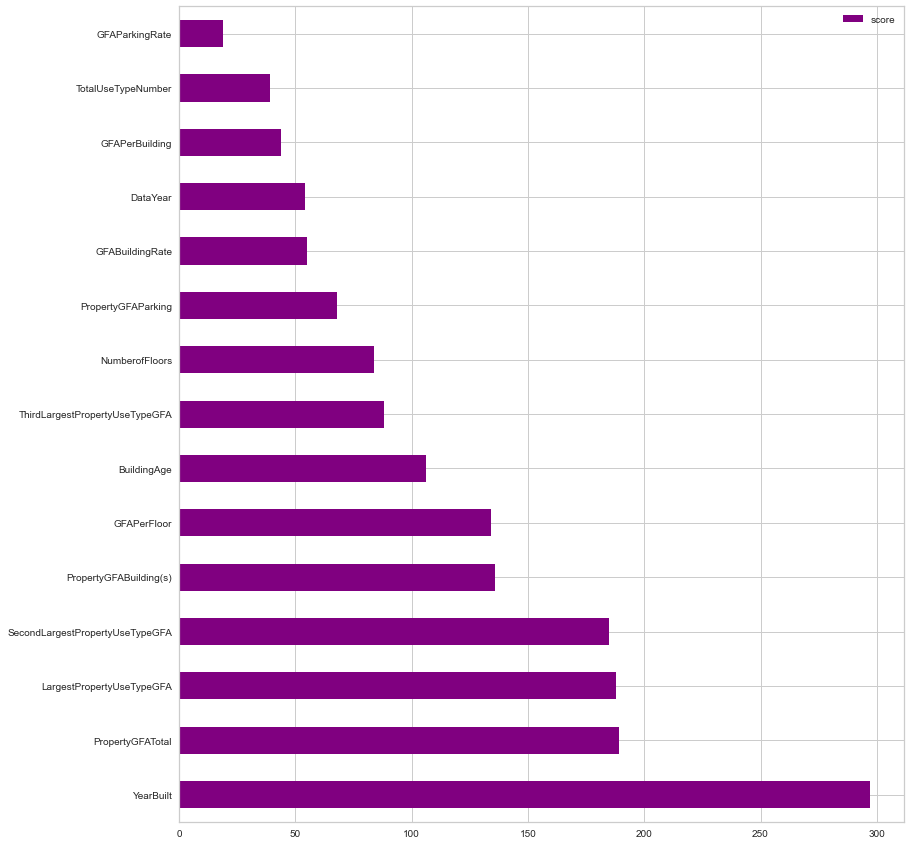

In [157]:
# Graphique de représentation des influences des Variables sur nos résultats :

def display_feat_imp_rforest(model):
  feature_imp = model_5_xgboost.get_booster().get_score(importance_type='weight')
  keys = list(feature_imp.keys())
  values = list(feature_imp.values())
  data = pd.DataFrame(data=values, index=keys, columns=["score"]).sort_values(by = "score", ascending=False)
  data.nlargest(15, columns="score").plot(kind='barh', figsize = (13,15), color = 'purple') 
 
display_feat_imp_rforest(model_5_xgboost)

# PERMUTATION IMPORTANCE :

In [158]:
pip install eli5

Note: you may need to restart the kernel to use updated packages.


In [159]:
# Importation :

import eli5
from eli5.sklearn import PermutationImportance

In [160]:
# Calcul Modèlisation Ridge :

from sklearn.linear_model import Ridge
model = Ridge(alpha=1e-2).fit(X_train, y_train)
model.score(X_test, y_test)

0.3021801096378839

In [161]:
# Tableau de Pondération :

perm = PermutationImportance(model, random_state=1).fit(X_test, y_test)
eli5.show_weights(perm, feature_names = X_test.columns.tolist())

Weight,Feature
1.7470 ± 0.4167,LargestPropertyUseTypeGFA
0.3212 ± 0.0193,NumberofFloors
0.1738 ± 0.0296,SecondLargestPropertyUseTypeGFA
0.1720 ± 0.0324,PropertyGFAParking
0.1056 ± 0.0760,PropertyGFABuilding(s)
0.0461 ± 0.0048,PropertyGFATotal
0.0107 ± 0.0018,GFAPerBuilding
0.0038 ± 0.0039,GFAParkingRate
0.0037 ± 0.0047,GFABuildingRate
0.0035 ± 0.0007,TotalUseTypeNumber


# II Conservation de la Variable ENERGYSTARScore :

# Split de Données en Entrée (Matrice X) et de la Variable Cible (Vecteur y) :

In [162]:
# Variables Qualitatives :

cols_cat_energystarscore = gordon.select_dtypes(exclude=[np.number]).columns.to_list()
cols_cat_energystarscore

['BuildingType',
 'PrimaryPropertyType',
 'Address',
 'Neighborhood',
 'ListOfAllPropertyUseTypes',
 'LargestPropertyUseType',
 'SecondLargestPropertyUseType',
 'ThirdLargestPropertyUseType']

In [163]:
# Déplacement de Colonne "TotalGHGEmissions" :

first_column_energystarscore = gordon.pop('TotalGHGEmissions')
gordon.insert(0, 'TotalGHGEmissions', first_column_energystarscore)
gordon

,TotalGHGEmissions,DataYear,YearBuilt,BuildingAge,BuildingType,PrimaryPropertyType,Address,Neighborhood,Latitude,Longitude,...,TotalUseTypeNumber,GFABuildingRate,GFAParkingRate,GFAPerBuilding,GFAPerFloor,EnergyUsePerFloor,EnergyUsePerBuilding,ENERGYSTARScorePerFloor,TotalGHGEmissionsPerFloor,GHGEmissionsIntensityPerFloor
0,0.78,2015,1962,53,NonResidential,Self-Storage Facility,1120 12Th Ave,Central,47.612465,-122.316300,...,2,1.00000,0.00000,24248.0,24248.000,126687.000,126687.000,0.0,0.780,0.010
1,22.96,2015,2009,6,NonResidential,Other,210 S Hudson St,Greater Duwamish,47.558918,-122.331560,...,2,0.33333,0.66667,127065.0,42355.000,1179146.333,3537439.000,0.0,7.653,0.023
2,12.99,2015,1910,105,NonResidential,Small- and Mid-Sized Office,1943 1St Ave S,Greater Duwamish,47.584620,-122.334700,...,2,1.00000,0.00000,49052.0,16350.667,594807.667,1784423.000,30.0,4.330,0.033
3,35.54,2015,1937,78,NonResidential,Small- and Mid-Sized Office,66 S Hanford St,Greater Duwamish,47.575943,-122.336240,...,2,1.00000,0.00000,39036.0,19518.000,816606.500,1633213.000,0.0,17.770,0.405
4,11.48,2015,1923,92,NonResidential,Small- and Mid-Sized Office,3201 1St Ave S,Greater Duwamish,47.575264,-122.334724,...,3,1.00000,0.00000,26310.0,26310.000,764906.000,764906.000,93.0,11.480,0.330
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1628,10.26,2016,1982,34,NonResidential,Small- and Mid-Sized Office,5506 6Th Ave S.,Greater Duwamish,47.553160,-122.326160,...,2,1.00000,0.00000,40029.0,20014.500,787664.125,1575328.250,34.5,5.130,0.130
1629,3.16,2016,1970,46,NonResidential,Other,670 South Orcas Street,Greater Duwamish,47.551680,-122.324590,...,2,1.00000,0.00000,26400.0,26400.000,452612.500,452612.500,0.0,3.160,0.120
1630,64.81,2016,1968,48,NonResidential,Warehouse,707 S Orcas St,Greater Duwamish,47.550490,-122.323820,...,2,1.00000,0.00000,27680.0,27680.000,1918665.750,1918665.750,0.0,64.810,2.340
1631,45.79,2016,1969,47,NonResidential,Small- and Mid-Sized Office,5700 Sixth Avenue South,Greater Duwamish,47.551450,-122.326350,...,2,1.00000,0.00000,25872.0,12936.000,926955.938,1853911.875,0.0,22.895,0.885


In [164]:
# Déplacement de Colonne "SiteEnergyUseWNLog" :

first_column_energystarscore = gordon.pop('SiteEnergyUseWNLog')
gordon.insert(0, 'SiteEnergyUseWNLog', first_column_energystarscore)
gordon

,SiteEnergyUseWNLog,TotalGHGEmissions,DataYear,YearBuilt,BuildingAge,BuildingType,PrimaryPropertyType,Address,Neighborhood,Latitude,...,TotalUseTypeNumber,GFABuildingRate,GFAParkingRate,GFAPerBuilding,GFAPerFloor,EnergyUsePerFloor,EnergyUsePerBuilding,ENERGYSTARScorePerFloor,TotalGHGEmissionsPerFloor,GHGEmissionsIntensityPerFloor
0,5.102735,0.78,2015,1962,53,NonResidential,Self-Storage Facility,1120 12Th Ave,Central,47.612465,...,2,1.00000,0.00000,24248.0,24248.000,126687.000,126687.000,0.0,0.780,0.010
1,6.548689,22.96,2015,2009,6,NonResidential,Other,210 S Hudson St,Greater Duwamish,47.558918,...,2,0.33333,0.66667,127065.0,42355.000,1179146.333,3537439.000,0.0,7.653,0.023
2,6.251498,12.99,2015,1910,105,NonResidential,Small- and Mid-Sized Office,1943 1St Ave S,Greater Duwamish,47.584620,...,2,1.00000,0.00000,49052.0,16350.667,594807.667,1784423.000,30.0,4.330,0.033
3,6.213043,35.54,2015,1937,78,NonResidential,Small- and Mid-Sized Office,66 S Hanford St,Greater Duwamish,47.575943,...,2,1.00000,0.00000,39036.0,19518.000,816606.500,1633213.000,0.0,17.770,0.405
4,5.883609,11.48,2015,1923,92,NonResidential,Small- and Mid-Sized Office,3201 1St Ave S,Greater Duwamish,47.575264,...,3,1.00000,0.00000,26310.0,26310.000,764906.000,764906.000,93.0,11.480,0.330
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1628,6.197371,10.26,2016,1982,34,NonResidential,Small- and Mid-Sized Office,5506 6Th Ave S.,Greater Duwamish,47.553160,...,2,1.00000,0.00000,40029.0,20014.500,787664.125,1575328.250,34.5,5.130,0.130
1629,5.655728,3.16,2016,1970,46,NonResidential,Other,670 South Orcas Street,Greater Duwamish,47.551680,...,2,1.00000,0.00000,26400.0,26400.000,452612.500,452612.500,0.0,3.160,0.120
1630,6.283000,64.81,2016,1968,48,NonResidential,Warehouse,707 S Orcas St,Greater Duwamish,47.550490,...,2,1.00000,0.00000,27680.0,27680.000,1918665.750,1918665.750,0.0,64.810,2.340
1631,6.268089,45.79,2016,1969,47,NonResidential,Small- and Mid-Sized Office,5700 Sixth Avenue South,Greater Duwamish,47.551450,...,2,1.00000,0.00000,25872.0,12936.000,926955.938,1853911.875,0.0,22.895,0.885


In [165]:
# Déplacement de Colonne "TotalGHGEmissionsLog" :

first_column_energystarscore = gordon.pop('TotalGHGEmissionsLog')
gordon.insert(0, 'TotalGHGEmissionsLog', first_column_energystarscore)
gordon

,TotalGHGEmissionsLog,SiteEnergyUseWNLog,TotalGHGEmissions,DataYear,YearBuilt,BuildingAge,BuildingType,PrimaryPropertyType,Address,Neighborhood,...,TotalUseTypeNumber,GFABuildingRate,GFAParkingRate,GFAPerBuilding,GFAPerFloor,EnergyUsePerFloor,EnergyUsePerBuilding,ENERGYSTARScorePerFloor,TotalGHGEmissionsPerFloor,GHGEmissionsIntensityPerFloor
0,0.250420,5.102735,0.78,2015,1962,53,NonResidential,Self-Storage Facility,1120 12Th Ave,Central,...,2,1.00000,0.00000,24248.0,24248.000,126687.000,126687.000,0.0,0.780,0.010
1,1.379487,6.548689,22.96,2015,2009,6,NonResidential,Other,210 S Hudson St,Greater Duwamish,...,2,0.33333,0.66667,127065.0,42355.000,1179146.333,3537439.000,0.0,7.653,0.023
2,1.145818,6.251498,12.99,2015,1910,105,NonResidential,Small- and Mid-Sized Office,1943 1St Ave S,Greater Duwamish,...,2,1.00000,0.00000,49052.0,16350.667,594807.667,1784423.000,30.0,4.330,0.033
3,1.562769,6.213043,35.54,2015,1937,78,NonResidential,Small- and Mid-Sized Office,66 S Hanford St,Greater Duwamish,...,2,1.00000,0.00000,39036.0,19518.000,816606.500,1633213.000,0.0,17.770,0.405
4,1.096215,5.883609,11.48,2015,1923,92,NonResidential,Small- and Mid-Sized Office,3201 1St Ave S,Greater Duwamish,...,3,1.00000,0.00000,26310.0,26310.000,764906.000,764906.000,93.0,11.480,0.330
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1628,1.051538,6.197371,10.26,2016,1982,34,NonResidential,Small- and Mid-Sized Office,5506 6Th Ave S.,Greater Duwamish,...,2,1.00000,0.00000,40029.0,20014.500,787664.125,1575328.250,34.5,5.130,0.130
1629,0.619093,5.655728,3.16,2016,1970,46,NonResidential,Other,670 South Orcas Street,Greater Duwamish,...,2,1.00000,0.00000,26400.0,26400.000,452612.500,452612.500,0.0,3.160,0.120
1630,1.818292,6.283000,64.81,2016,1968,48,NonResidential,Warehouse,707 S Orcas St,Greater Duwamish,...,2,1.00000,0.00000,27680.0,27680.000,1918665.750,1918665.750,0.0,64.810,2.340
1631,1.670153,6.268089,45.79,2016,1969,47,NonResidential,Small- and Mid-Sized Office,5700 Sixth Avenue South,Greater Duwamish,...,2,1.00000,0.00000,25872.0,12936.000,926955.938,1853911.875,0.0,22.895,0.885


In [166]:
# Déplacement de Colonne "SiteEnergyUseWN(kBtu)" :

first_column_energystarscore = gordon.pop('SiteEnergyUseWN(kBtu)')
gordon.insert(0, 'SiteEnergyUseWN(kBtu)', first_column_energystarscore)
gordon

,SiteEnergyUseWN(kBtu),TotalGHGEmissionsLog,SiteEnergyUseWNLog,TotalGHGEmissions,DataYear,YearBuilt,BuildingAge,BuildingType,PrimaryPropertyType,Address,...,TotalUseTypeNumber,GFABuildingRate,GFAParkingRate,GFAPerBuilding,GFAPerFloor,EnergyUsePerFloor,EnergyUsePerBuilding,ENERGYSTARScorePerFloor,TotalGHGEmissionsPerFloor,GHGEmissionsIntensityPerFloor
0,126687.000,0.250420,5.102735,0.78,2015,1962,53,NonResidential,Self-Storage Facility,1120 12Th Ave,...,2,1.00000,0.00000,24248.0,24248.000,126687.000,126687.000,0.0,0.780,0.010
1,3537439.000,1.379487,6.548689,22.96,2015,2009,6,NonResidential,Other,210 S Hudson St,...,2,0.33333,0.66667,127065.0,42355.000,1179146.333,3537439.000,0.0,7.653,0.023
2,1784423.000,1.145818,6.251498,12.99,2015,1910,105,NonResidential,Small- and Mid-Sized Office,1943 1St Ave S,...,2,1.00000,0.00000,49052.0,16350.667,594807.667,1784423.000,30.0,4.330,0.033
3,1633213.000,1.562769,6.213043,35.54,2015,1937,78,NonResidential,Small- and Mid-Sized Office,66 S Hanford St,...,2,1.00000,0.00000,39036.0,19518.000,816606.500,1633213.000,0.0,17.770,0.405
4,764906.000,1.096215,5.883609,11.48,2015,1923,92,NonResidential,Small- and Mid-Sized Office,3201 1St Ave S,...,3,1.00000,0.00000,26310.0,26310.000,764906.000,764906.000,93.0,11.480,0.330
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1628,1575328.250,1.051538,6.197371,10.26,2016,1982,34,NonResidential,Small- and Mid-Sized Office,5506 6Th Ave S.,...,2,1.00000,0.00000,40029.0,20014.500,787664.125,1575328.250,34.5,5.130,0.130
1629,452612.500,0.619093,5.655728,3.16,2016,1970,46,NonResidential,Other,670 South Orcas Street,...,2,1.00000,0.00000,26400.0,26400.000,452612.500,452612.500,0.0,3.160,0.120
1630,1918665.750,1.818292,6.283000,64.81,2016,1968,48,NonResidential,Warehouse,707 S Orcas St,...,2,1.00000,0.00000,27680.0,27680.000,1918665.750,1918665.750,0.0,64.810,2.340
1631,1853911.875,1.670153,6.268089,45.79,2016,1969,47,NonResidential,Small- and Mid-Sized Office,5700 Sixth Avenue South,...,2,1.00000,0.00000,25872.0,12936.000,926955.938,1853911.875,0.0,22.895,0.885


In [167]:
# Variables Cibles :

cols_target_energystarscore = gordon.columns[0:4].to_list()
cols_target_energystarscore

['SiteEnergyUseWN(kBtu)',
 'TotalGHGEmissionsLog',
 'SiteEnergyUseWNLog',
 'TotalGHGEmissions']

In [168]:
# Variables Quantitatives :

cols_num_energystarscore = gordon.select_dtypes(include=[np.number]).columns.to_list()
cols_num_energystarscore
del cols_num_energystarscore[0:4]
cols_num_energystarscore

['DataYear',
 'YearBuilt',
 'BuildingAge',
 'Latitude',
 'Longitude',
 'Latitude_Binaire',
 'Longitude_Binaire',
 'Latitude_Longitude_Binaire',
 'ENERGYSTARScore',
 'PropertyGFATotal',
 'PropertyGFAParking',
 'PropertyGFABuilding(s)',
 'LargestPropertyUseTypeGFA',
 'SecondLargestPropertyUseTypeGFA',
 'ThirdLargestPropertyUseTypeGFA',
 'NumberofBuildings',
 'NumberofFloors',
 'SiteEnergyUse(kBtu)',
 'GHGEmissionsIntensity',
 'SteamUse(kBtu)',
 'Electricity(kBtu)',
 'NaturalGas(kBtu)',
 'TotalUseTypeNumber',
 'GFABuildingRate',
 'GFAParkingRate',
 'GFAPerBuilding',
 'GFAPerFloor',
 'EnergyUsePerFloor',
 'EnergyUsePerBuilding',
 'ENERGYSTARScorePerFloor',
 'TotalGHGEmissionsPerFloor',
 'GHGEmissionsIntensityPerFloor']

In [169]:
# Sélection des Variables Quantitatives pour éviter l'hypercorrélation :

cols_num_energystarscore2 = ['ENERGYSTARScore','DataYear','YearBuilt','BuildingAge','PropertyGFATotal','PropertyGFAParking','PropertyGFABuilding(s)','LargestPropertyUseTypeGFA','SecondLargestPropertyUseTypeGFA','ThirdLargestPropertyUseTypeGFA','NumberofBuildings','NumberofFloors','TotalUseTypeNumber','GFABuildingRate','GFAParkingRate','GFAPerBuilding','GFAPerFloor']

# Matrice X ENERGYSTARScore 

In [170]:
# Conservation des Variables Catégoriques et Numériques et suppression des Variables Cibles :

X_ENERGYSTARScore = gordon[cols_cat_energystarscore + cols_num_energystarscore2]
X_ENERGYSTARScore.shape

(1633, 25)

In [171]:
# Visualisation du Dataset :

X_ENERGYSTARScore.head(3)

,BuildingType,PrimaryPropertyType,Address,Neighborhood,ListOfAllPropertyUseTypes,LargestPropertyUseType,SecondLargestPropertyUseType,ThirdLargestPropertyUseType,ENERGYSTARScore,DataYear,...,LargestPropertyUseTypeGFA,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseTypeGFA,NumberofBuildings,NumberofFloors,TotalUseTypeNumber,GFABuildingRate,GFAParkingRate,GFAPerBuilding,GFAPerFloor
0,NonResidential,Self-Storage Facility,1120 12Th Ave,Central,"Parking, Self-Storage Facility",Self-Storage Facility,Parking,0,0.0,2015,...,21018.0,3230.0,0.0,1,1,2,1.00000,0.00000,24248.0,24248.000
1,NonResidential,Other,210 S Hudson St,Greater Duwamish,"Office, Parking",Parking,Office,0,0.0,2015,...,84710.0,42355.0,0.0,1,3,2,0.33333,0.66667,127065.0,42355.000
2,NonResidential,Small- and Mid-Sized Office,1943 1St Ave S,Greater Duwamish,"Office, Retail Store",Office,Retail Store,0,90.0,2015,...,32393.0,10057.0,0.0,1,3,2,1.00000,0.00000,49052.0,16350.667


In [172]:
# Nombre de Lignes et de Colonnes :

X_ENERGYSTARScore.shape

(1633, 25)

In [173]:
# Nombre aléatoire pour la reproductibilité des résultats :

seed = 21
print(f'Nombre aléatoire : {seed}')

Nombre aléatoire : 21


# Vecteur y ENERGYSTARScore

In [174]:
# Isolation de la target 'TotalGHGEmissions' du dataset :

y_ENERGYSTARScore = gordon['TotalGHGEmissions']
y_ENERGYSTARScore.shape

(1633,)

# Split du jeu de données en jeu d'entraînement (Train) et jeu de test (Test) :

In [175]:
# Installation :

from sklearn.model_selection import train_test_split

In [176]:
# Split du dataset en train set et test set :

X_train_ENERGYSTARScore, X_test_ENERGYSTARScore, y_train_ENERGYSTARScore, y_test_ENERGYSTARScore = train_test_split(X_ENERGYSTARScore, y_ENERGYSTARScore, test_size=0.2, random_state=seed)

print(f'X_train : {X_train.shape} - X_test : {X_test.shape}')
print(f'y_train : {y_train.shape} - y_test : {y_test.shape}')

X_train : (1306, 16) - X_test : (327, 16)
y_train : (1306,) - y_test : (327,)


# Préparation des Variables Quantitatives :

In [177]:
# Data Pré-Processing :

from sklearn.preprocessing import OneHotEncoder, StandardScaler, RobustScaler, LabelEncoder
from category_encoders import LeaveOneOutEncoder, TargetEncoder

In [178]:
# Evitement du message d'erreur :

X_train_ENERGYSTARScore = X_train_ENERGYSTARScore.replace((np.inf, -np.inf, np.nan), 0).reset_index(drop=True)
X_test_ENERGYSTARScore = X_test_ENERGYSTARScore.replace((np.inf, -np.inf, np.nan), 0).reset_index(drop=True)

J'ai choisi le normalisateur RobustScaler, car ce dernier est peu sensible aux "Outliers" :

RobustScaler Calcul : Xscaled = (X - Médiane) / IQR ; (IQR = Ecart Interquartile)

In [179]:
# "Normalisation" Variables Quantitatives :

scaler_rob = RobustScaler()
X_train_ENERGYSTARScore[cols_num_energystarscore2] = scaler_rob.fit_transform(X_train_ENERGYSTARScore[cols_num_energystarscore2])
X_test_ENERGYSTARScore[cols_num_energystarscore2] = scaler_rob.transform(X_test_ENERGYSTARScore[cols_num_energystarscore2])

In [180]:
# Visualisation du dataset X_train Variables Numériques "Normalisé" :

X_train_ENERGYSTARScore[cols_num_energystarscore2]

,ENERGYSTARScore,DataYear,YearBuilt,BuildingAge,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),LargestPropertyUseTypeGFA,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseTypeGFA,NumberofBuildings,NumberofFloors,TotalUseTypeNumber,GFABuildingRate,GFAParkingRate,GFAPerBuilding,GFAPerFloor
0,-0.384615,-1.0,-0.666667,0.656250,-0.216580,0.000000,-0.253420,-0.147376,-0.434385,0.000000,0.0,0.000000,0.0,0.000000,0.000000,-0.214904,-0.506979
1,0.500000,0.0,-0.174603,0.187500,2.692604,5.957746,2.864011,2.379671,2.665699,3.141741,0.0,4.666667,0.0,-1.246219,1.246219,2.711258,-0.020958
2,-0.384615,0.0,0.190476,-0.171875,-0.280889,0.155704,-0.370757,-0.329449,-0.377674,0.385253,0.0,0.333333,3.0,-0.524304,0.524304,-0.279588,-0.692014
3,0.320513,0.0,-0.111111,0.125000,-0.161258,0.000000,-0.175050,0.132610,0.187932,0.000000,0.0,0.000000,0.0,0.000000,0.000000,-0.159259,-0.416825
4,-0.384615,0.0,-0.666667,0.671875,-0.134314,0.000000,-0.136879,-0.122892,-0.388609,0.000000,0.0,0.000000,0.0,0.000000,0.000000,-0.132157,-0.372915
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1301,-0.384615,-1.0,0.222222,-0.218750,1.833729,13.882394,0.312094,1.893323,2.497563,0.000000,0.0,1.000000,0.0,-3.982826,3.982826,1.847371,0.950776
1302,-0.384615,-1.0,-1.095238,1.078125,-0.156400,0.000000,-0.168168,-0.157607,-0.384876,0.000000,0.0,0.666667,0.0,0.000000,0.000000,-0.154373,-0.618432
1303,-0.384615,-1.0,0.111111,-0.109375,-0.152958,0.000000,-0.163291,-0.041127,-0.475712,0.000000,0.0,-0.333333,0.0,0.000000,0.000000,-0.150910,-0.138589
1304,-0.346154,0.0,-0.761905,0.765625,0.076127,0.886338,0.011901,-0.196895,0.047813,2.966023,0.0,0.000000,2.0,-1.061098,1.061098,0.079512,-0.029974


In [181]:
# Visualisation du dataset X_test Variables Numériques "Normalisé" :

X_test_ENERGYSTARScore[cols_num_energystarscore2]

,ENERGYSTARScore,DataYear,YearBuilt,BuildingAge,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),LargestPropertyUseTypeGFA,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseTypeGFA,NumberofBuildings,NumberofFloors,TotalUseTypeNumber,GFABuildingRate,GFAParkingRate,GFAPerBuilding,GFAPerFloor
0,-0.384615,0.0,0.365079,-0.343750,-0.077166,0.533239,-0.145766,0.014479,-0.306030,0.000000,0.0,0.000000,0.0,-0.882613,0.882613,-0.074676,-0.279785
1,-0.384615,0.0,0.349206,-0.328125,0.817566,0.000000,1.211583,0.949342,1.903640,5.646102,0.0,1.000000,7.0,0.000000,0.000000,0.825277,0.122790
2,0.538462,-1.0,0.015873,-0.015625,0.160513,1.826056,-0.026887,0.078165,0.333255,0.514955,0.0,0.333333,1.0,-1.897096,1.897096,0.164390,-0.152522
3,0.897436,0.0,-0.825397,0.828125,-0.272204,0.000000,-0.332218,-0.350230,-0.059049,0.000000,0.0,-0.333333,0.0,0.000000,0.000000,-0.270852,-0.430079
4,0.269231,-1.0,0.428571,-0.421875,0.389615,1.060845,0.426595,0.510080,0.092307,0.989245,0.0,2.666667,1.0,-0.811018,0.811018,0.394829,-0.547187
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
322,0.615385,-1.0,0.380952,-0.375000,1.089526,0.000000,1.596851,1.584587,-0.114441,0.944513,0.0,0.000000,4.0,0.000000,0.000000,1.098825,1.621493
323,0.705128,-1.0,0.492063,-0.484375,2.716525,13.776127,1.580595,1.491796,0.948935,0.000000,0.0,2.666667,0.0,-2.860058,2.860058,2.735319,0.486997
324,0.679487,0.0,-0.095238,0.109375,0.937841,0.000000,1.381969,1.396720,-0.085934,1.756755,0.0,2.666667,3.0,0.000000,0.000000,0.946255,-0.303530
325,0.358974,0.0,0.174603,-0.156250,2.168508,4.056338,2.441925,3.097011,1.696213,0.000000,0.0,10.000000,0.0,-1.016547,1.016547,2.184104,-0.540667


# Préparation des Variables Qualitatives :

In [182]:
# Encodage par "get_dummies" :

X_train_encoded_ENERGYSTARScore = pd.get_dummies(X_train_ENERGYSTARScore[cols_cat_energystarscore])
X_train_encoded_ENERGYSTARScore

,BuildingType_Campus,BuildingType_NonResidential,BuildingType_Nonresidential COS,BuildingType_SPS-District K-12,PrimaryPropertyType_College/University,PrimaryPropertyType_Distribution Center,PrimaryPropertyType_Hospital,PrimaryPropertyType_Hotel,PrimaryPropertyType_K-12 School,PrimaryPropertyType_Laboratory,...,ThirdLargestPropertyUseType_Refrigerated Warehouse,ThirdLargestPropertyUseType_Restaurant,ThirdLargestPropertyUseType_Retail Store,ThirdLargestPropertyUseType_Self-Storage Facility,ThirdLargestPropertyUseType_Social/Meeting Hall,ThirdLargestPropertyUseType_Strip Mall,ThirdLargestPropertyUseType_Supermarket/Grocery Store,ThirdLargestPropertyUseType_Swimming Pool,ThirdLargestPropertyUseType_Vocational School,ThirdLargestPropertyUseType_Worship Facility
0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1301,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1302,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1303,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1304,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [183]:
# Encodage par "get_dummies" :

X_test_encoded_ENERGYSTARScore = pd.get_dummies(X_test_ENERGYSTARScore[cols_cat_energystarscore])
X_test_encoded_ENERGYSTARScore

,BuildingType_Campus,BuildingType_NonResidential,BuildingType_Nonresidential COS,BuildingType_SPS-District K-12,PrimaryPropertyType_College/University,PrimaryPropertyType_Distribution Center,PrimaryPropertyType_Hospital,PrimaryPropertyType_Hotel,PrimaryPropertyType_K-12 School,PrimaryPropertyType_Laboratory,...,ThirdLargestPropertyUseType_Other - Entertainment/Public Assembly,ThirdLargestPropertyUseType_Other - Recreation,ThirdLargestPropertyUseType_Other - Services,ThirdLargestPropertyUseType_Parking,"ThirdLargestPropertyUseType_Personal Services (Health/Beauty, Dry Cleaning, etc)",ThirdLargestPropertyUseType_Pre-school/Daycare,ThirdLargestPropertyUseType_Restaurant,ThirdLargestPropertyUseType_Retail Store,ThirdLargestPropertyUseType_Social/Meeting Hall,ThirdLargestPropertyUseType_Swimming Pool
0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
322,0,1,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
323,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
324,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
325,0,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [184]:
# Même nombre de colonnes entre les deux datasets :

cols = X_train_encoded_ENERGYSTARScore.columns.tolist()
X_test_encoded_ENERGYSTARScore = X_test_encoded_ENERGYSTARScore.reindex(columns=cols).fillna(0)
X_test_encoded_ENERGYSTARScore

,BuildingType_Campus,BuildingType_NonResidential,BuildingType_Nonresidential COS,BuildingType_SPS-District K-12,PrimaryPropertyType_College/University,PrimaryPropertyType_Distribution Center,PrimaryPropertyType_Hospital,PrimaryPropertyType_Hotel,PrimaryPropertyType_K-12 School,PrimaryPropertyType_Laboratory,...,ThirdLargestPropertyUseType_Refrigerated Warehouse,ThirdLargestPropertyUseType_Restaurant,ThirdLargestPropertyUseType_Retail Store,ThirdLargestPropertyUseType_Self-Storage Facility,ThirdLargestPropertyUseType_Social/Meeting Hall,ThirdLargestPropertyUseType_Strip Mall,ThirdLargestPropertyUseType_Supermarket/Grocery Store,ThirdLargestPropertyUseType_Swimming Pool,ThirdLargestPropertyUseType_Vocational School,ThirdLargestPropertyUseType_Worship Facility
0,0,1,0,0,0,0,0,0,0,0,...,0.0,0,0,0.0,0,0.0,0.0,0,0.0,0.0
1,0,1,0,0,0,0,0,0,0,0,...,0.0,0,0,0.0,1,0.0,0.0,0,0.0,0.0
2,0,1,0,0,0,0,0,0,0,0,...,0.0,0,0,0.0,0,0.0,0.0,0,0.0,0.0
3,0,1,0,0,0,0,0,0,0,0,...,0.0,0,0,0.0,0,0.0,0.0,0,0.0,0.0
4,0,1,0,0,0,0,0,1,0,0,...,0.0,1,0,0.0,0,0.0,0.0,0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
322,0,1,0,0,0,0,0,0,0,0,...,0.0,0,0,0.0,0,0.0,0.0,0,0.0,0.0
323,0,1,0,0,0,0,0,0,0,0,...,0.0,0,0,0.0,0,0.0,0.0,0,0.0,0.0
324,0,1,0,0,0,0,0,0,0,0,...,0.0,0,0,0.0,0,0.0,0.0,0,0.0,0.0
325,0,1,0,0,0,0,0,1,0,0,...,0.0,0,0,0.0,0,0.0,0.0,0,0.0,0.0


In [185]:
# Visualisation du dataset train "encodé" et "normalisé" :

X_train_ENERGYSTARScore = pd.concat([X_train_ENERGYSTARScore[cols_num_energystarscore2]], axis = 1)
X_train_ENERGYSTARScore

,ENERGYSTARScore,DataYear,YearBuilt,BuildingAge,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),LargestPropertyUseTypeGFA,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseTypeGFA,NumberofBuildings,NumberofFloors,TotalUseTypeNumber,GFABuildingRate,GFAParkingRate,GFAPerBuilding,GFAPerFloor
0,-0.384615,-1.0,-0.666667,0.656250,-0.216580,0.000000,-0.253420,-0.147376,-0.434385,0.000000,0.0,0.000000,0.0,0.000000,0.000000,-0.214904,-0.506979
1,0.500000,0.0,-0.174603,0.187500,2.692604,5.957746,2.864011,2.379671,2.665699,3.141741,0.0,4.666667,0.0,-1.246219,1.246219,2.711258,-0.020958
2,-0.384615,0.0,0.190476,-0.171875,-0.280889,0.155704,-0.370757,-0.329449,-0.377674,0.385253,0.0,0.333333,3.0,-0.524304,0.524304,-0.279588,-0.692014
3,0.320513,0.0,-0.111111,0.125000,-0.161258,0.000000,-0.175050,0.132610,0.187932,0.000000,0.0,0.000000,0.0,0.000000,0.000000,-0.159259,-0.416825
4,-0.384615,0.0,-0.666667,0.671875,-0.134314,0.000000,-0.136879,-0.122892,-0.388609,0.000000,0.0,0.000000,0.0,0.000000,0.000000,-0.132157,-0.372915
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1301,-0.384615,-1.0,0.222222,-0.218750,1.833729,13.882394,0.312094,1.893323,2.497563,0.000000,0.0,1.000000,0.0,-3.982826,3.982826,1.847371,0.950776
1302,-0.384615,-1.0,-1.095238,1.078125,-0.156400,0.000000,-0.168168,-0.157607,-0.384876,0.000000,0.0,0.666667,0.0,0.000000,0.000000,-0.154373,-0.618432
1303,-0.384615,-1.0,0.111111,-0.109375,-0.152958,0.000000,-0.163291,-0.041127,-0.475712,0.000000,0.0,-0.333333,0.0,0.000000,0.000000,-0.150910,-0.138589
1304,-0.346154,0.0,-0.761905,0.765625,0.076127,0.886338,0.011901,-0.196895,0.047813,2.966023,0.0,0.000000,2.0,-1.061098,1.061098,0.079512,-0.029974


In [186]:
# Visualisation du dataset train "encodé" et "normalisé" :

X_test_ENERGYSTARScore = pd.concat([X_test_ENERGYSTARScore[cols_num_energystarscore2]], axis = 1)
X_test_ENERGYSTARScore

,ENERGYSTARScore,DataYear,YearBuilt,BuildingAge,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),LargestPropertyUseTypeGFA,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseTypeGFA,NumberofBuildings,NumberofFloors,TotalUseTypeNumber,GFABuildingRate,GFAParkingRate,GFAPerBuilding,GFAPerFloor
0,-0.384615,0.0,0.365079,-0.343750,-0.077166,0.533239,-0.145766,0.014479,-0.306030,0.000000,0.0,0.000000,0.0,-0.882613,0.882613,-0.074676,-0.279785
1,-0.384615,0.0,0.349206,-0.328125,0.817566,0.000000,1.211583,0.949342,1.903640,5.646102,0.0,1.000000,7.0,0.000000,0.000000,0.825277,0.122790
2,0.538462,-1.0,0.015873,-0.015625,0.160513,1.826056,-0.026887,0.078165,0.333255,0.514955,0.0,0.333333,1.0,-1.897096,1.897096,0.164390,-0.152522
3,0.897436,0.0,-0.825397,0.828125,-0.272204,0.000000,-0.332218,-0.350230,-0.059049,0.000000,0.0,-0.333333,0.0,0.000000,0.000000,-0.270852,-0.430079
4,0.269231,-1.0,0.428571,-0.421875,0.389615,1.060845,0.426595,0.510080,0.092307,0.989245,0.0,2.666667,1.0,-0.811018,0.811018,0.394829,-0.547187
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
322,0.615385,-1.0,0.380952,-0.375000,1.089526,0.000000,1.596851,1.584587,-0.114441,0.944513,0.0,0.000000,4.0,0.000000,0.000000,1.098825,1.621493
323,0.705128,-1.0,0.492063,-0.484375,2.716525,13.776127,1.580595,1.491796,0.948935,0.000000,0.0,2.666667,0.0,-2.860058,2.860058,2.735319,0.486997
324,0.679487,0.0,-0.095238,0.109375,0.937841,0.000000,1.381969,1.396720,-0.085934,1.756755,0.0,2.666667,3.0,0.000000,0.000000,0.946255,-0.303530
325,0.358974,0.0,0.174603,-0.156250,2.168508,4.056338,2.441925,3.097011,1.696213,0.000000,0.0,10.000000,0.0,-1.016547,1.016547,2.184104,-0.540667


# Forme :

In [187]:
# Nombre de Lignes / Nombre de Colonnes :

X_train_ENERGYSTARScore.shape

(1306, 17)

In [188]:
# Nombre de Lignes / Nombre de Colonnes :

X_test_ENERGYSTARScore.shape

(327, 17)

In [189]:
# Nombre de Lignes / Nombre de Colonnes :

y_train_ENERGYSTARScore.shape

(1306,)

In [190]:
# Nombre de Lignes / Nombre de Colonnes :

y_test_ENERGYSTARScore.shape

(327,)

# Test de Plusieurs Autres Transformers et Calcul de Quelques Métriques :

In [191]:
# Nombre de Lignes et de Colonnes :

print(X_train_ENERGYSTARScore.shape, y_train_ENERGYSTARScore.shape)

(1306, 17) (1306,)


In [192]:
# Installation des Bibliothèques :

from numpy import mean
from numpy import absolute
from numpy import loadtxt
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.pipeline import Pipeline
from sklearn.linear_model import HuberRegressor
from sklearn.preprocessing import MinMaxScaler
from sklearn.compose import TransformedTargetRegressor
from sklearn.preprocessing import PowerTransformer

# TransformedTargetRegressor :

In [193]:
# Préparation du modèle et mise à l'échelle par MinMaxScaler :

pipeline = Pipeline(steps=[('normalize', MinMaxScaler()), ('model', HuberRegressor())])

In [194]:
# Préparation du modèle et mise à l'échelle de la Cible :

model = TransformedTargetRegressor(regressor=pipeline, transformer=MinMaxScaler())

In [195]:
# Evaluation du Modèle :

cv = KFold(n_splits=10, shuffle=True, random_state=1)
scores = cross_val_score(model, X_train_ENERGYSTARScore, y_train_ENERGYSTARScore, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)

/Users/sylvaincarlevato/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_huber.py:332: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/sylvaincarlevato/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_huber.py:332: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/sylvaincarlevato/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_huber.py:332: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: T

In [196]:
# Conversion :

scores = absolute(scores)

In [197]:
# Résultats :

s_mean = mean(scores)
print('Mean MAE: %.3f' % (s_mean))

Mean MAE: 154.051


/Users/sylvaincarlevato/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_huber.py:332: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/sylvaincarlevato/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_huber.py:332: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/sylvaincarlevato/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_huber.py:332: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: T

# PowerTransformer :

In [198]:
# Préparation du modèle et mise à l'échelle :

pipeline = Pipeline(steps=[('power', PowerTransformer()), ('model', HuberRegressor())])

In [199]:
# Préparation du modèle et mise à l'échelle de la Cible :

model = TransformedTargetRegressor(regressor=pipeline, transformer=PowerTransformer())

In [200]:
# Evaluation du Modèle :

cv = KFold(n_splits=10, shuffle=True, random_state=1)
scores = cross_val_score(model, X_train_ENERGYSTARScore, y_train_ENERGYSTARScore, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)

/Users/sylvaincarlevato/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_huber.py:332: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/sylvaincarlevato/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_huber.py:332: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/sylvaincarlevato/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_huber.py:332: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: T

In [201]:
# Conversion :

scores = absolute(scores)

In [202]:
# Résultats :

s_mean = mean(scores)
print('Mean MAE: %.3f' % (s_mean))

Mean MAE: 154.364


# Test des Différents Algorithmes de MACHINE LEARNING :

L'objectif de cette partie est de :

- Tester, avec leurs hyperparamètres par défaut tout en effectuant de la cross-validation, différents modèles de MACHINE LEARNING linéaires ou non.
- Sélectionner des algorithmes non optimisés les plus performants pour notre problématique.

# Modèle Baseline :

Utilisation de Baseline Dummy Regressor, car une simple "Baseline" sert d'élément de comparaison avec d'autres régresseurs.

In [203]:
# Résultats :

resultsenergystarscore = pd.DataFrame({})

# Paramètres : Stratégie par la Moyenne et par la Médiane :

# Moyenne : Prédiction de la moyenne du "training set" :

In [204]:
# Définition du Modèle :

from sklearn.metrics import mean_squared_error, r2_score
from sklearn.dummy import DummyRegressor
model = DummyRegressor(strategy="mean").fit(X_train_ENERGYSTARScore, y_train_ENERGYSTARScore)
print(model.score(X_train_ENERGYSTARScore, y_train_ENERGYSTARScore))

0.0


In [205]:
# Coefficient de détermination R^2 sur la Prédiction :

y_pred_ENERGYSTARScore = model.predict(X_test_ENERGYSTARScore)
print(model.score(X_test_ENERGYSTARScore, y_test_ENERGYSTARScore))

-2.3172823755412963e-06


In [206]:
# Métriques :

from sklearn import metrics

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test_ENERGYSTARScore, y_pred_ENERGYSTARScore))
print('Mean Squared Error:', metrics.mean_squared_error(y_test_ENERGYSTARScore, y_pred_ENERGYSTARScore))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test_ENERGYSTARScore, y_pred_ENERGYSTARScore)))
print('R^2:', r2_score(y_test_ENERGYSTARScore, y_pred_ENERGYSTARScore))

Mean Absolute Error: 246.48321161798518
Mean Squared Error: 979300.9316121166
Root Mean Squared Error: 989.5963478166826
R^2: -2.3172823755412963e-06


L’indicateur MAE donne une meilleure idée de la qualité de prédiction. Par contre, il n’est pas possible de savoir si le modèle a tendance à sous ou sur-estimer les prédictions.

Le MSE est la moyenne arithmétique des carrés des écarts entre prévisions du modèle et observations.

Le RMSE est pertinent. Cet indice fournit une indication par rapport à la dispersion ou la variabilité de la qualité de la prédiction. Le RMSE peut être relié à la variance du modèle. Les valeurs de RMSE sont difficiles à interpréter parce que l’on est pas en mesure de dire si une valeur de variance est faible ou forte. Il serait plus intéressant de normaliser le RMSE pour que cet indicateur soit exprimé comme un pourcentage de la valeur moyenne des observations.

# Analyse des Résidus :

In [207]:
# Comparaison des Valeurs Actuelles de Test aux Valeurs Prédites :

compare = pd.DataFrame({'Valeur Actuelle': y_test_ENERGYSTARScore.values.ravel(), 'Valeur Prédite': y_pred_ENERGYSTARScore})
compare

,Valeur Actuelle,Valeur Prédite
0,109.59,211.820919
1,1623.34,211.820919
2,45.83,211.820919
3,6.73,211.820919
4,263.51,211.820919
...,...,...
322,67.48,211.820919
323,73.67,211.820919
324,346.62,211.820919
325,648.62,211.820919


In [208]:
# Résultats Baseline :

import math
resultsenergystarscore = resultsenergystarscore.append(pd.DataFrame({
    'Modèle' : ['Baseline Moyenne'],'R^2' : r2_score(y_test_ENERGYSTARScore, y_pred_ENERGYSTARScore),'Mean Absolute Error' : metrics.mean_absolute_error(y_test_ENERGYSTARScore, y_pred_ENERGYSTARScore),'Mean Squared Error': metrics.mean_squared_error(y_test_ENERGYSTARScore, y_pred_ENERGYSTARScore),
    'Score_RMSE' : [np.sqrt(metrics.mean_squared_error(y_test_ENERGYSTARScore, y_pred_ENERGYSTARScore))]}),
              ignore_index=True)

# Médiane : Prédiction de la médiane du "training set" :

In [209]:
# Définition du Modèle :

from sklearn.metrics import mean_squared_error, r2_score
from sklearn.dummy import DummyRegressor
model = DummyRegressor(strategy="median").fit(X_train_ENERGYSTARScore, y_train_ENERGYSTARScore)
print(model.score(X_train_ENERGYSTARScore, y_train_ENERGYSTARScore))

-0.0418615941136633


In [210]:
# Coefficient de détermination R^2 sur la Prédiction :

y_pred = model.predict(X_test_ENERGYSTARScore)
print(model.score(X_test_ENERGYSTARScore, y_test_ENERGYSTARScore))

-0.0228897762956366


In [211]:
# Métriques :

from sklearn import metrics

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test_ENERGYSTARScore, y_pred_ENERGYSTARScore))
print('Mean Squared Error:', metrics.mean_squared_error(y_test_ENERGYSTARScore, y_pred_ENERGYSTARScore))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test_ENERGYSTARScore, y_pred_ENERGYSTARScore)))
print('R^2:', r2_score(y_test_ENERGYSTARScore, y_pred_ENERGYSTARScore))

Mean Absolute Error: 246.48321161798518
Mean Squared Error: 979300.9316121166
Root Mean Squared Error: 989.5963478166826
R^2: -2.3172823755412963e-06


# Analyse des Résidus :

In [212]:
# Comparaison des Valeurs Actuelles de Test aux Valeurs Prédites :

compare = pd.DataFrame({'Valeur Actuelle': y_test_ENERGYSTARScore.values.ravel(), 'Valeur Prédite': y_pred_ENERGYSTARScore})
compare

,Valeur Actuelle,Valeur Prédite
0,109.59,211.820919
1,1623.34,211.820919
2,45.83,211.820919
3,6.73,211.820919
4,263.51,211.820919
...,...,...
322,67.48,211.820919
323,73.67,211.820919
324,346.62,211.820919
325,648.62,211.820919


In [213]:
# Résultats Baseline :

import math
resultsenergystarscore = resultsenergystarscore.append(pd.DataFrame({
    'Modèle' : ['Baseline Médiane'],'R^2' : r2_score(y_test_ENERGYSTARScore, y_pred_ENERGYSTARScore),'Mean Absolute Error' : metrics.mean_absolute_error(y_test_ENERGYSTARScore, y_pred_ENERGYSTARScore),'Mean Squared Error': metrics.mean_squared_error(y_test_ENERGYSTARScore, y_pred_ENERGYSTARScore),
    'Score_RMSE' : [np.sqrt(metrics.mean_squared_error(y_test_ENERGYSTARScore, y_pred_ENERGYSTARScore))]}),
              ignore_index=True)

# Modèles Linéaires :

# Régression Linéaire Multiple :

In [214]:
# Importation :

from sklearn.linear_model import LinearRegression, Ridge, ElasticNet, Lasso
from sklearn.metrics import mean_squared_error, r2_score

In [215]:
# "Fit" du modèle de regression linéaire vers le dataset :

regressor = LinearRegression() 
regressor.fit(X_train_ENERGYSTARScore, y_train_ENERGYSTARScore)

LinearRegression()

In [216]:
# Set de prédictions :

y_pred_ENERGYSTARScore = regressor.predict(X_test_ENERGYSTARScore)

In [217]:
# Métriques :

from sklearn import metrics

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test_ENERGYSTARScore, y_pred_ENERGYSTARScore))
print('Mean Squared Error:', metrics.mean_squared_error(y_test_ENERGYSTARScore, y_pred_ENERGYSTARScore))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test_ENERGYSTARScore, y_pred_ENERGYSTARScore)))
print('R^2:', r2_score(y_test_ENERGYSTARScore, y_pred_ENERGYSTARScore))

Mean Absolute Error: 255.95566361932313
Mean Squared Error: 685090.199412242
Root Mean Squared Error: 827.7017575263701
R^2: 0.3004277185441919


# Analyse des Résidus :

In [218]:
# Comparaison des Valeurs Actuelles de Test aux Valeurs Prédites :

compare = pd.DataFrame({'Valeur Actuelle': y_test_ENERGYSTARScore.values.ravel(), 'Valeur Prédite': y_pred_ENERGYSTARScore})
compare

,Valeur Actuelle,Valeur Prédite
0,109.59,197.942981
1,1623.34,405.903655
2,45.83,93.823093
3,6.73,-44.020044
4,263.51,-28.298564
...,...,...
322,67.48,376.907783
323,73.67,-616.164790
324,346.62,160.515155
325,648.62,-68.085567


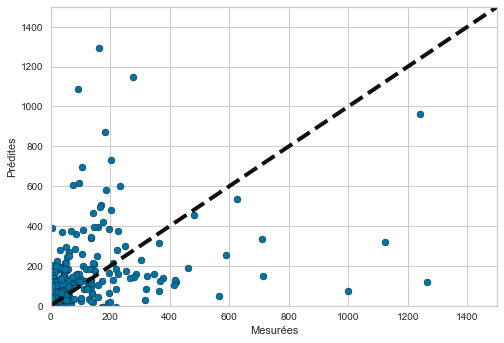

In [219]:
# Graphique de Prédictions :

fig, ax = plt.subplots()
ax.scatter(y_test_ENERGYSTARScore, y_pred_ENERGYSTARScore, edgecolors=(0, 0, 0))
ax.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
ax.set_xlim([0, 1500])
ax.set_ylim([0, 1500])
ax.set_xlabel('Mesurées')
ax.set_ylabel('Prédites')
plt.show()

In [220]:
# Résultats Régressions Linéaires Multiples :

import math
resultsenergystarscore = resultsenergystarscore.append(pd.DataFrame({
    'Modèle' : ['Régression Linéaire Multiple'],'R^2' : r2_score(y_test_ENERGYSTARScore, y_pred_ENERGYSTARScore),'Mean Absolute Error' : metrics.mean_absolute_error(y_test_ENERGYSTARScore, y_pred_ENERGYSTARScore),'Mean Squared Error': metrics.mean_squared_error(y_test_ENERGYSTARScore, y_pred_ENERGYSTARScore),
    'Score_RMSE' : [np.sqrt(metrics.mean_squared_error(y_test_ENERGYSTARScore, y_pred_ENERGYSTARScore))]}),
              ignore_index=True)

# Régression Ridge :

In [221]:
# Création d'un modèle de regression linéaire avec Ridge :

regressor = Ridge(alpha=1.0)
regressor.fit(X_train_ENERGYSTARScore, y_train_ENERGYSTARScore)
y_pred_ENERGYSTARScore = regressor.predict(X_test_ENERGYSTARScore)

In [222]:
# "Print" Pondération et Métriques par Ridge :

print("\n===Ridge Regularization===")
print("Weights: \n", regressor.coef_)
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test_ENERGYSTARScore, y_pred_ENERGYSTARScore))
print('Mean Squared Error:', metrics.mean_squared_error(y_test_ENERGYSTARScore, y_pred_ENERGYSTARScore))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test_ENERGYSTARScore, y_pred_ENERGYSTARScore)))
print("R^2: %.3f" % r2_score(y_test_ENERGYSTARScore, y_pred_ENERGYSTARScore))


===Ridge Regularization===
Weights: 
 [-1.13881201e+02  5.93659037e+00 -1.06744064e+00  1.14352111e+00
 -5.51503956e+01 -7.17764510e+01 -6.60342934e+01  3.92402915e+02
  7.73116239e+01 -4.72382386e+00 -3.88942594e+00 -1.02895840e+02
  2.73870825e-02 -4.41877027e+01  4.41877027e+01  1.46699152e+00
 -5.77641266e+01]
Mean Absolute Error: 255.8748911372496
Mean Squared Error: 686296.1669041925
Root Mean Squared Error: 828.4299408545013
R^2: 0.299


# Analyse des Résidus :

In [223]:
# Comparaison des Valeurs Actuelles de Test aux Valeurs Prédites :

compare = pd.DataFrame({'Valeur Actuelle': y_test_ENERGYSTARScore.values.ravel(), 'Valeur Prédite': y_pred_ENERGYSTARScore})
compare

,Valeur Actuelle,Valeur Prédite
0,109.59,197.671564
1,1623.34,405.369233
2,45.83,93.975610
3,6.73,-43.703604
4,263.51,-28.246606
...,...,...
322,67.48,377.128576
323,73.67,-614.336916
324,346.62,160.586803
325,648.62,-68.540738


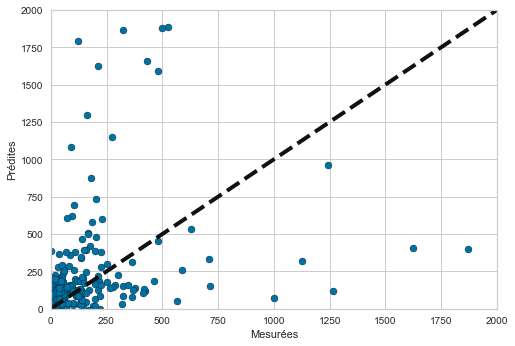

In [224]:
# Graphique de Prédictions :

fig, ax = plt.subplots()
ax.scatter(y_test_ENERGYSTARScore, y_pred_ENERGYSTARScore, edgecolors=(0, 0, 0))
ax.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
ax.set_xlim([0, 2000])
ax.set_ylim([0, 2000])
ax.set_xlabel('Mesurées')
ax.set_ylabel('Prédites')
plt.show()

In [225]:
# Résultats Régressions Linéaires Multiples :

import math
resultsenergystarscore = resultsenergystarscore.append(pd.DataFrame({
    'Modèle' : ['Régression Ridge'],'R^2' : r2_score(y_test_ENERGYSTARScore, y_pred_ENERGYSTARScore),'Mean Absolute Error' : metrics.mean_absolute_error(y_test_ENERGYSTARScore, y_pred_ENERGYSTARScore),'Mean Squared Error': metrics.mean_squared_error(y_test_ENERGYSTARScore, y_pred_ENERGYSTARScore),
    'Score_RMSE' : [np.sqrt(metrics.mean_squared_error(y_test_ENERGYSTARScore, y_pred_ENERGYSTARScore))]}),
              ignore_index=True)

# Régression Ridge : Log :

In [226]:
# Conservation des Variables Catégoriques et Numériques et Suppression des Variables Cibles :

X_ENERGYSTARScore_log = gordon[cols_cat_energystarscore + cols_num_energystarscore2]
X_ENERGYSTARScore_log.shape

(1633, 25)

In [227]:
# Isolation de la Target 'TotalGHGEmissionsLog' du Dataset :

y_ENERGYSTARScore_log = gordon['TotalGHGEmissionsLog']
y_ENERGYSTARScore_log.shape

(1633,)

In [228]:
# Split du Dataset en Train set et Test set :

X_train_ENERGYSTARScore_log, X_test_ENERGYSTARScore_log, y_train_ENERGYSTARScore_log, y_test_ENERGYSTARScore_log = train_test_split(X_ENERGYSTARScore_log, y_ENERGYSTARScore_log, test_size=0.2, random_state=seed)
print(f'X_train : {X_train_ENERGYSTARScore_log.shape} - X_test : {X_test_ENERGYSTARScore_log.shape}')
print(f'y_train : {y_train_ENERGYSTARScore_log.shape} - y_test : {y_test_ENERGYSTARScore_log.shape}')

X_train : (1306, 25) - X_test : (327, 25)
y_train : (1306,) - y_test : (327,)


In [229]:
# Evitement du Message d'Erreur :

X_train_ENERGYSTARScore_log = X_train_ENERGYSTARScore_log.replace((np.inf, -np.inf, np.nan), 0).reset_index(drop=True)
X_test_ENERGYSTARScore_log = X_test_ENERGYSTARScore_log.replace((np.inf, -np.inf, np.nan), 0).reset_index(drop=True)

In [230]:
# "Normalisation" Variables Quantitatives :

scaler_rob = RobustScaler()
X_train_ENERGYSTARScore_log[cols_num_energystarscore2] = scaler_rob.fit_transform(X_train_ENERGYSTARScore_log[cols_num_energystarscore2])
X_test_ENERGYSTARScore_log[cols_num_energystarscore2] = scaler_rob.transform(X_test_ENERGYSTARScore_log[cols_num_energystarscore2])

In [231]:
# Encodage par "get_dummies" :

X_train_ENERGYSTARScore_log_encoded = pd.get_dummies(X_train_ENERGYSTARScore_log[cols_cat])
X_train_ENERGYSTARScore_log_encoded

,BuildingType_Campus,BuildingType_NonResidential,BuildingType_Nonresidential COS,BuildingType_SPS-District K-12,PrimaryPropertyType_College/University,PrimaryPropertyType_Distribution Center,PrimaryPropertyType_Hospital,PrimaryPropertyType_Hotel,PrimaryPropertyType_K-12 School,PrimaryPropertyType_Laboratory,...,ThirdLargestPropertyUseType_Refrigerated Warehouse,ThirdLargestPropertyUseType_Restaurant,ThirdLargestPropertyUseType_Retail Store,ThirdLargestPropertyUseType_Self-Storage Facility,ThirdLargestPropertyUseType_Social/Meeting Hall,ThirdLargestPropertyUseType_Strip Mall,ThirdLargestPropertyUseType_Supermarket/Grocery Store,ThirdLargestPropertyUseType_Swimming Pool,ThirdLargestPropertyUseType_Vocational School,ThirdLargestPropertyUseType_Worship Facility
0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1301,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1302,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1303,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1304,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [232]:
# Encodage par "get_dummies" :

X_test_ENERGYSTARScore_log_encoded = pd.get_dummies(X_test_ENERGYSTARScore_log[cols_cat])
X_test_ENERGYSTARScore_log_encoded

,BuildingType_Campus,BuildingType_NonResidential,BuildingType_Nonresidential COS,BuildingType_SPS-District K-12,PrimaryPropertyType_College/University,PrimaryPropertyType_Distribution Center,PrimaryPropertyType_Hospital,PrimaryPropertyType_Hotel,PrimaryPropertyType_K-12 School,PrimaryPropertyType_Laboratory,...,ThirdLargestPropertyUseType_Other - Entertainment/Public Assembly,ThirdLargestPropertyUseType_Other - Recreation,ThirdLargestPropertyUseType_Other - Services,ThirdLargestPropertyUseType_Parking,"ThirdLargestPropertyUseType_Personal Services (Health/Beauty, Dry Cleaning, etc)",ThirdLargestPropertyUseType_Pre-school/Daycare,ThirdLargestPropertyUseType_Restaurant,ThirdLargestPropertyUseType_Retail Store,ThirdLargestPropertyUseType_Social/Meeting Hall,ThirdLargestPropertyUseType_Swimming Pool
0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
322,0,1,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
323,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
324,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
325,0,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [233]:
# Même Nombre de Colonnes entre les deux Datasets :

cols = X_train_ENERGYSTARScore_log_encoded.columns.tolist()
X_test_ENERGYSTARScore_log_encoded = X_test_ENERGYSTARScore_log_encoded.reindex(columns=cols).fillna(0)
X_test_ENERGYSTARScore_log_encoded

,BuildingType_Campus,BuildingType_NonResidential,BuildingType_Nonresidential COS,BuildingType_SPS-District K-12,PrimaryPropertyType_College/University,PrimaryPropertyType_Distribution Center,PrimaryPropertyType_Hospital,PrimaryPropertyType_Hotel,PrimaryPropertyType_K-12 School,PrimaryPropertyType_Laboratory,...,ThirdLargestPropertyUseType_Refrigerated Warehouse,ThirdLargestPropertyUseType_Restaurant,ThirdLargestPropertyUseType_Retail Store,ThirdLargestPropertyUseType_Self-Storage Facility,ThirdLargestPropertyUseType_Social/Meeting Hall,ThirdLargestPropertyUseType_Strip Mall,ThirdLargestPropertyUseType_Supermarket/Grocery Store,ThirdLargestPropertyUseType_Swimming Pool,ThirdLargestPropertyUseType_Vocational School,ThirdLargestPropertyUseType_Worship Facility
0,0,1,0,0,0,0,0,0,0,0,...,0.0,0,0,0.0,0,0.0,0.0,0,0.0,0.0
1,0,1,0,0,0,0,0,0,0,0,...,0.0,0,0,0.0,1,0.0,0.0,0,0.0,0.0
2,0,1,0,0,0,0,0,0,0,0,...,0.0,0,0,0.0,0,0.0,0.0,0,0.0,0.0
3,0,1,0,0,0,0,0,0,0,0,...,0.0,0,0,0.0,0,0.0,0.0,0,0.0,0.0
4,0,1,0,0,0,0,0,1,0,0,...,0.0,1,0,0.0,0,0.0,0.0,0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
322,0,1,0,0,0,0,0,0,0,0,...,0.0,0,0,0.0,0,0.0,0.0,0,0.0,0.0
323,0,1,0,0,0,0,0,0,0,0,...,0.0,0,0,0.0,0,0.0,0.0,0,0.0,0.0
324,0,1,0,0,0,0,0,0,0,0,...,0.0,0,0,0.0,0,0.0,0.0,0,0.0,0.0
325,0,1,0,0,0,0,0,1,0,0,...,0.0,0,0,0.0,0,0.0,0.0,0,0.0,0.0


In [234]:
# Visualisation du Dataset train "encodé" et "normalisé" :

X_train_ENERGYSTARScore_log = pd.concat([X_train_ENERGYSTARScore_log[cols_num_energystarscore2]], axis = 1)
X_train_ENERGYSTARScore_log

,ENERGYSTARScore,DataYear,YearBuilt,BuildingAge,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),LargestPropertyUseTypeGFA,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseTypeGFA,NumberofBuildings,NumberofFloors,TotalUseTypeNumber,GFABuildingRate,GFAParkingRate,GFAPerBuilding,GFAPerFloor
0,-0.384615,-1.0,-0.666667,0.656250,-0.216580,0.000000,-0.253420,-0.147376,-0.434385,0.000000,0.0,0.000000,0.0,0.000000,0.000000,-0.214904,-0.506979
1,0.500000,0.0,-0.174603,0.187500,2.692604,5.957746,2.864011,2.379671,2.665699,3.141741,0.0,4.666667,0.0,-1.246219,1.246219,2.711258,-0.020958
2,-0.384615,0.0,0.190476,-0.171875,-0.280889,0.155704,-0.370757,-0.329449,-0.377674,0.385253,0.0,0.333333,3.0,-0.524304,0.524304,-0.279588,-0.692014
3,0.320513,0.0,-0.111111,0.125000,-0.161258,0.000000,-0.175050,0.132610,0.187932,0.000000,0.0,0.000000,0.0,0.000000,0.000000,-0.159259,-0.416825
4,-0.384615,0.0,-0.666667,0.671875,-0.134314,0.000000,-0.136879,-0.122892,-0.388609,0.000000,0.0,0.000000,0.0,0.000000,0.000000,-0.132157,-0.372915
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1301,-0.384615,-1.0,0.222222,-0.218750,1.833729,13.882394,0.312094,1.893323,2.497563,0.000000,0.0,1.000000,0.0,-3.982826,3.982826,1.847371,0.950776
1302,-0.384615,-1.0,-1.095238,1.078125,-0.156400,0.000000,-0.168168,-0.157607,-0.384876,0.000000,0.0,0.666667,0.0,0.000000,0.000000,-0.154373,-0.618432
1303,-0.384615,-1.0,0.111111,-0.109375,-0.152958,0.000000,-0.163291,-0.041127,-0.475712,0.000000,0.0,-0.333333,0.0,0.000000,0.000000,-0.150910,-0.138589
1304,-0.346154,0.0,-0.761905,0.765625,0.076127,0.886338,0.011901,-0.196895,0.047813,2.966023,0.0,0.000000,2.0,-1.061098,1.061098,0.079512,-0.029974


In [235]:
# Visualisation du Dataset train "encodé" et "normalisé" :

X_test_ENERGYSTARScore_log = pd.concat([X_test_ENERGYSTARScore_log[cols_num_energystarscore2]], axis = 1)
X_test_ENERGYSTARScore_log

,ENERGYSTARScore,DataYear,YearBuilt,BuildingAge,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),LargestPropertyUseTypeGFA,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseTypeGFA,NumberofBuildings,NumberofFloors,TotalUseTypeNumber,GFABuildingRate,GFAParkingRate,GFAPerBuilding,GFAPerFloor
0,-0.384615,0.0,0.365079,-0.343750,-0.077166,0.533239,-0.145766,0.014479,-0.306030,0.000000,0.0,0.000000,0.0,-0.882613,0.882613,-0.074676,-0.279785
1,-0.384615,0.0,0.349206,-0.328125,0.817566,0.000000,1.211583,0.949342,1.903640,5.646102,0.0,1.000000,7.0,0.000000,0.000000,0.825277,0.122790
2,0.538462,-1.0,0.015873,-0.015625,0.160513,1.826056,-0.026887,0.078165,0.333255,0.514955,0.0,0.333333,1.0,-1.897096,1.897096,0.164390,-0.152522
3,0.897436,0.0,-0.825397,0.828125,-0.272204,0.000000,-0.332218,-0.350230,-0.059049,0.000000,0.0,-0.333333,0.0,0.000000,0.000000,-0.270852,-0.430079
4,0.269231,-1.0,0.428571,-0.421875,0.389615,1.060845,0.426595,0.510080,0.092307,0.989245,0.0,2.666667,1.0,-0.811018,0.811018,0.394829,-0.547187
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
322,0.615385,-1.0,0.380952,-0.375000,1.089526,0.000000,1.596851,1.584587,-0.114441,0.944513,0.0,0.000000,4.0,0.000000,0.000000,1.098825,1.621493
323,0.705128,-1.0,0.492063,-0.484375,2.716525,13.776127,1.580595,1.491796,0.948935,0.000000,0.0,2.666667,0.0,-2.860058,2.860058,2.735319,0.486997
324,0.679487,0.0,-0.095238,0.109375,0.937841,0.000000,1.381969,1.396720,-0.085934,1.756755,0.0,2.666667,3.0,0.000000,0.000000,0.946255,-0.303530
325,0.358974,0.0,0.174603,-0.156250,2.168508,4.056338,2.441925,3.097011,1.696213,0.000000,0.0,10.000000,0.0,-1.016547,1.016547,2.184104,-0.540667


In [236]:
# Evitement du Message d'Erreur :

X_train_ENERGYSTARScore_log = X_train_ENERGYSTARScore_log.replace((np.inf, -np.inf, np.nan), 0).reset_index(drop=True)
X_test_ENERGYSTARScore_log = X_test_ENERGYSTARScore_log.replace((np.inf, -np.inf, np.nan), 0).reset_index(drop=True)

In [237]:
# Création d'un modèle de regression linéaire avec Ridge :

regressor = Ridge(alpha=1.0)
regressor.fit(X_train_ENERGYSTARScore_log, y_train_ENERGYSTARScore_log)
y_pred_ENERGYSTARScore_log = regressor.predict(X_test_ENERGYSTARScore_log)

In [238]:
# "Print" Pondération et Métriques par Ridge :

print("\n===Ridge Regularization===")
print("Weights: \n", regressor.coef_)
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test_ENERGYSTARScore_log, y_pred_ENERGYSTARScore_log))
print('Mean Squared Error:', metrics.mean_squared_error(y_test_ENERGYSTARScore_log, y_pred_ENERGYSTARScore_log))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test_ENERGYSTARScore_log, y_pred_ENERGYSTARScore_log)))
print("R^2: %.3f" % r2_score(y_test_ENERGYSTARScore_log, y_pred_ENERGYSTARScore_log))


===Ridge Regularization===
Weights: 
 [-0.14717264  0.00315969  0.02313619 -0.02272532 -0.05310921 -0.02102792
 -0.07169321  0.07392528  0.05428026  0.00321229  0.02504167  0.04328245
  0.01995142 -0.00539336  0.00539336  0.13413918  0.04434529]
Mean Absolute Error: 0.39094587589511587
Mean Squared Error: 0.2560797549353213
Root Mean Squared Error: 0.5060432342550598
R^2: 0.295


# Analyse des Résidus :

In [239]:
# Comparaison des Valeurs Actuelles de Test aux Valeurs Prédites :

compare = pd.DataFrame({'Valeur Actuelle': y_test_ENERGYSTARScore_log.values.ravel(), 'Valeur Prédite': y_pred_ENERGYSTARScore_log})
compare

,Valeur Actuelle,Valeur Prédite
0,2.043716,1.740059
1,3.210677,2.124900
2,1.670524,1.661277
3,0.888179,1.461658
4,2.422442,1.814153
...,...,...
322,1.835564,1.856636
323,1.873146,1.757058
324,2.541105,1.831703
325,2.812659,2.305336


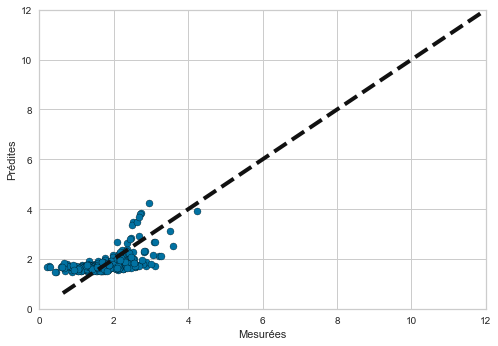

In [240]:
# Graphique de Prédictions :

fig, ax = plt.subplots()
ax.scatter(y_test_ENERGYSTARScore_log, y_pred_ENERGYSTARScore_log, edgecolors=(0, 0, 0))
ax.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
ax.set_xlim([0, 12])
ax.set_ylim([0, 12])
ax.set_xlabel('Mesurées')
ax.set_ylabel('Prédites')
plt.show()

# Régression par Lasso :

In [241]:
# Création d'un modèle de regression linéaire avec Lasso :

regressor = Lasso(alpha=1.0)
regressor.fit(X_train_ENERGYSTARScore, y_train_ENERGYSTARScore)
y_pred_ENERGYSTARScore = regressor.predict(X_test_ENERGYSTARScore)

In [242]:
# "Print" Pondération et Métriques par Lasso :

print("\n===LASSO Regularization===")
print("Weights: \n", regressor.coef_)
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test_ENERGYSTARScore, y_pred_ENERGYSTARScore))
print('Mean Squared Error:', metrics.mean_squared_error(y_test_ENERGYSTARScore, y_pred_ENERGYSTARScore))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test_ENERGYSTARScore, y_pred_ENERGYSTARScore)))
print("R^2: %.3f" % r2_score(y_test_ENERGYSTARScore, y_pred_ENERGYSTARScore))


===LASSO Regularization===
Weights: 
 [-1.09796901e+02  1.78043425e+00 -0.00000000e+00  0.00000000e+00
 -1.07769937e+02 -6.44316712e+01 -2.27287054e+01  3.87196793e+02
  7.61889094e+01 -5.07764755e+00 -3.94772440e+00 -1.02999462e+02
  0.00000000e+00 -8.61251864e+01  7.83339967e-13 -0.00000000e+00
 -5.78376626e+01]
Mean Absolute Error: 255.23256020389277
Mean Squared Error: 691605.8915787985
Root Mean Squared Error: 831.6284576532952
R^2: 0.294


# Analyse des Résidus :

In [243]:
# Comparaison des Valeurs Actuelles de Test aux Valeurs Prédites :

compare = pd.DataFrame({'Valeur Actuelle': y_test_ENERGYSTARScore.values.ravel(), 'Valeur Prédite': y_pred_ENERGYSTARScore})
compare

,Valeur Actuelle,Valeur Prédite
0,109.59,193.819171
1,1623.34,400.261285
2,45.83,95.502256
3,6.73,-42.717806
4,263.51,-25.204545
...,...,...
322,67.48,383.018762
323,73.67,-602.266191
324,346.62,160.971571
325,648.62,-72.930278


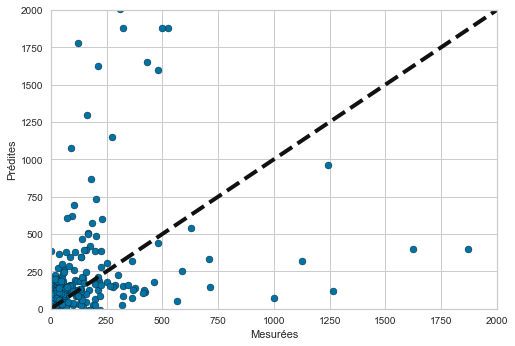

In [244]:
# Graphique de Prédictions :

fig, ax = plt.subplots()
ax.scatter(y_test_ENERGYSTARScore, y_pred_ENERGYSTARScore, edgecolors=(0, 0, 0))
ax.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
ax.set_xlim([0, 2000])
ax.set_ylim([0, 2000])
ax.set_xlabel('Mesurées')
ax.set_ylabel('Prédites')
plt.show()

In [245]:
# Résultats Régressions Linéaires Multiples :

import math
resultsenergystarscore = resultsenergystarscore.append(pd.DataFrame({
    'Modèle' : ['Régression Lasso'],'R^2' : r2_score(y_test_ENERGYSTARScore, y_pred_ENERGYSTARScore),'Mean Absolute Error' : metrics.mean_absolute_error(y_test_ENERGYSTARScore, y_pred_ENERGYSTARScore),'Mean Squared Error': metrics.mean_squared_error(y_test_ENERGYSTARScore, y_pred_ENERGYSTARScore),
    'Score_RMSE' : [np.sqrt(metrics.mean_squared_error(y_test_ENERGYSTARScore, y_pred_ENERGYSTARScore))]}),
              ignore_index=True)

# Régression par Elastic Net :

In [246]:
# Création d'un modèle de regression linéaire avec Elastic Net :

regressor = ElasticNet(alpha=1.0,l1_ratio=0.5)
regressor.fit(X_train_ENERGYSTARScore, y_train_ENERGYSTARScore)
y_pred_ENERGYSTARScore = regressor.predict(X_test_ENERGYSTARScore)

In [247]:
# "Print" Pondération et Métriques par Elastic Net :

print("\n===Elastic Net Regularization===")
print("Weights: \n", regressor.coef_)
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test_ENERGYSTARScore, y_pred_ENERGYSTARScore))
print('Mean Squared Error:', metrics.mean_squared_error(y_test_ENERGYSTARScore, y_pred_ENERGYSTARScore))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test_ENERGYSTARScore, y_pred_ENERGYSTARScore)))
print("R^2: %.3f" % r2_score(y_test_ENERGYSTARScore, y_pred_ENERGYSTARScore))


===Elastic Net Regularization===
Weights: 
 [-39.84287626  -0.26941521   3.01949875  -2.97655241  21.42690084
 -54.72614618  40.13815996 169.04471585  60.53519182 -21.84728662
  -4.44096991 -78.29248179   0.27399005 -24.65423644  24.6542896
  24.37622347 -36.00924114]
Mean Absolute Error: 240.3510828832593
Mean Squared Error: 931346.1178718025
Root Mean Squared Error: 965.0627533335863
R^2: 0.049


# Analyse des Résidus :

In [248]:
# Comparaison des Valeurs Actuelles de Test aux Valeurs Prédites :

compare = pd.DataFrame({'Valeur Actuelle': y_test_ENERGYSTARScore.values.ravel(), 'Valeur Prédite': y_pred_ENERGYSTARScore})
compare

,Valeur Actuelle,Valeur Prédite
0,109.59,127.021456
1,1623.34,285.752467
2,45.83,91.253811
3,6.73,22.883334
4,263.51,1.082671
...,...,...
322,67.48,385.813991
323,73.67,-255.591678
324,346.62,177.003808
325,648.62,-14.135320


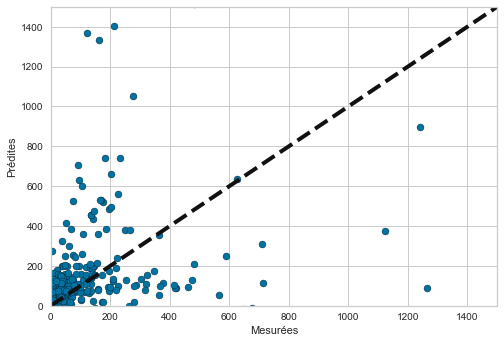

In [249]:
# Graphique de Prédictions :

fig, ax = plt.subplots()
ax.scatter(y_test_ENERGYSTARScore, y_pred_ENERGYSTARScore, edgecolors=(0, 0, 0))
ax.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
ax.set_xlim([0, 1500])
ax.set_ylim([0, 1500])
ax.set_xlabel('Mesurées')
ax.set_ylabel('Prédites')
plt.show()

In [250]:
# Résultats Régressions Linéaires Multiples :

import math
resultsenergystarscore = resultsenergystarscore.append(pd.DataFrame({
    'Modèle' : ['Régression Elastic Net'],'R^2' : r2_score(y_test_ENERGYSTARScore, y_pred_ENERGYSTARScore),'Mean Absolute Error' : metrics.mean_absolute_error(y_test_ENERGYSTARScore, y_pred_ENERGYSTARScore),'Mean Squared Error': metrics.mean_squared_error(y_test_ENERGYSTARScore, y_pred_ENERGYSTARScore),
    'Score_RMSE' : [np.sqrt(metrics.mean_squared_error(y_test_ENERGYSTARScore, y_pred_ENERGYSTARScore))]}),
              ignore_index=True)

# "Tuning" des Hyperparamètres avec Optuna :

In [251]:
# Cross Validation :

def ridge_objective(trial):   
    _alpha = trial.suggest_float("alpha", 0.1, 20)    
    ridge = Ridge(alpha=_alpha, random_state=42)   
    scores = cross_val_score(ridge, X_train_ENERGYSTARScore, y_train_ENERGYSTARScore, 
                             cv=KFold(n_splits=10,
                                      shuffle=True,
                                      random_state=42),
                             scoring="neg_root_mean_squared_error"
                            )  
    return scores.mean()

In [252]:
# Etude :

import optuna
study = optuna.create_study(direction="maximize")

[I 2022-05-25 11:31:51,444] A new study created in memory with name: no-name-820feb20-494d-4574-baa9-f904796beb2c


In [253]:
# Optimisation :

study.optimize(ridge_objective, n_trials=10)

[I 2022-05-25 11:31:51,473] Trial 0 finished with value: -555.1069785911874 and parameters: {'alpha': 19.681733302511844}. Best is trial 0 with value: -555.1069785911874.
[I 2022-05-25 11:31:51,494] Trial 1 finished with value: -566.34468437599 and parameters: {'alpha': 9.787226474061422}. Best is trial 0 with value: -555.1069785911874.
[I 2022-05-25 11:31:51,515] Trial 2 finished with value: -554.9391066492085 and parameters: {'alpha': 19.89986611982239}. Best is trial 2 with value: -554.9391066492085.
[I 2022-05-25 11:31:51,535] Trial 3 finished with value: -558.8430023033568 and parameters: {'alpha': 15.504105632489987}. Best is trial 2 with value: -554.9391066492085.
[I 2022-05-25 11:31:51,556] Trial 4 finished with value: -566.8970172708754 and parameters: {'alpha': 9.461306680955756}. Best is trial 2 with value: -554.9391066492085.
[I 2022-05-25 11:31:51,577] Trial 5 finished with value: -585.0902984645733 and parameters: {'alpha': 2.459338614521427}. Best is trial 2 with value: 

In [254]:
# Résultats :

best_params = study.best_params
best_score = study.best_value
print(f"Best score: {best_score}\n")
print(f"Optimized parameters: {best_params}\n")

Best score: -554.9391066492085

Optimized parameters: {'alpha': 19.89986611982239}



# Modèles Ensemblistes :

# Random Forest Regression :

In [255]:
# Import Random Forest Regressor :

from sklearn.ensemble import RandomForestRegressor

In [256]:
# Fit du Modèle :

regressor = RandomForestRegressor(n_estimators = 10, random_state=0)
regressor.fit(X_train_ENERGYSTARScore, y_train_ENERGYSTARScore)

RandomForestRegressor(n_estimators=10, random_state=0)

In [257]:
# Prédictions :

y_pred_ENERGYSTARScore = regressor.predict(X_test_ENERGYSTARScore)

In [258]:
# "Print" Métriques par Random Forest Regressor :

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test_ENERGYSTARScore, y_pred_ENERGYSTARScore))
print('Mean Squared Error:', metrics.mean_squared_error(y_test_ENERGYSTARScore, y_pred_ENERGYSTARScore))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test_ENERGYSTARScore, y_pred_ENERGYSTARScore)))
print("R^2: %.3f" % r2_score(y_test_ENERGYSTARScore, y_pred_ENERGYSTARScore))

Mean Absolute Error: 151.66263302752293
Mean Squared Error: 778961.1804487921
Root Mean Squared Error: 882.5877749259798
R^2: 0.205


# Analyse des Résidus :

In [259]:
# Comparaison des Valeurs Actuelles de Test aux Valeurs Prédites :

compare = pd.DataFrame({'Valeur Actuelle': y_test_ENERGYSTARScore.values.ravel(), 'Valeur Prédite': y_pred_ENERGYSTARScore})
compare

,Valeur Actuelle,Valeur Prédite
0,109.59,118.924
1,1623.34,229.596
2,45.83,43.048
3,6.73,32.540
4,263.51,222.476
...,...,...
322,67.48,86.505
323,73.67,92.211
324,346.62,279.909
325,648.62,735.716


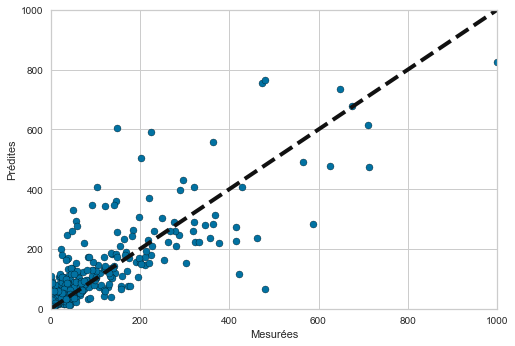

In [260]:
# Graphique de Prédictions :

fig, ax = plt.subplots()
ax.scatter(y_test_ENERGYSTARScore, y_pred_ENERGYSTARScore, edgecolors=(0, 0, 0))
ax.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
ax.set_xlim([0, 1000])
ax.set_ylim([0, 1000])
ax.set_xlabel('Mesurées')
ax.set_ylabel('Prédites')
plt.show()

In [261]:
# Résultats Modèles Ensemblistes :

import math
resultsenergystarscore = resultsenergystarscore.append(pd.DataFrame({
    'Modèle' : ['Random Forest Regression'],'R^2' : r2_score(y_test_ENERGYSTARScore, y_pred_ENERGYSTARScore),'Mean Absolute Error' : metrics.mean_absolute_error(y_test_ENERGYSTARScore, y_pred_ENERGYSTARScore),'Mean Squared Error': metrics.mean_squared_error(y_test_ENERGYSTARScore, y_pred_ENERGYSTARScore),
    'Score_RMSE' : [np.sqrt(metrics.mean_squared_error(y_test_ENERGYSTARScore, y_pred_ENERGYSTARScore))]}),
              ignore_index=True)

# XG BOOST Regression :

In [262]:
# Importation :

import xgboost as xgb
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error as mse

In [263]:
# Visualisation du dataset train "encodé" et "normalisé" :

X_train_ENERGYSTARScore2 = pd.concat([X_train_encoded_ENERGYSTARScore, X_train_ENERGYSTARScore[cols_num_energystarscore2]], axis = 1)
X_train_ENERGYSTARScore2

,BuildingType_Campus,BuildingType_NonResidential,BuildingType_Nonresidential COS,BuildingType_SPS-District K-12,PrimaryPropertyType_College/University,PrimaryPropertyType_Distribution Center,PrimaryPropertyType_Hospital,PrimaryPropertyType_Hotel,PrimaryPropertyType_K-12 School,PrimaryPropertyType_Laboratory,...,LargestPropertyUseTypeGFA,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseTypeGFA,NumberofBuildings,NumberofFloors,TotalUseTypeNumber,GFABuildingRate,GFAParkingRate,GFAPerBuilding,GFAPerFloor
0,0,1,0,0,0,0,0,0,0,0,...,-0.147376,-0.434385,0.000000,0.0,0.000000,0.0,0.000000,0.000000,-0.214904,-0.506979
1,0,1,0,0,0,0,0,0,0,0,...,2.379671,2.665699,3.141741,0.0,4.666667,0.0,-1.246219,1.246219,2.711258,-0.020958
2,0,1,0,0,0,0,0,0,0,0,...,-0.329449,-0.377674,0.385253,0.0,0.333333,3.0,-0.524304,0.524304,-0.279588,-0.692014
3,0,1,0,0,0,0,0,0,0,0,...,0.132610,0.187932,0.000000,0.0,0.000000,0.0,0.000000,0.000000,-0.159259,-0.416825
4,0,1,0,0,0,0,0,0,0,0,...,-0.122892,-0.388609,0.000000,0.0,0.000000,0.0,0.000000,0.000000,-0.132157,-0.372915
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1301,0,1,0,0,0,0,0,0,0,0,...,1.893323,2.497563,0.000000,0.0,1.000000,0.0,-3.982826,3.982826,1.847371,0.950776
1302,0,1,0,0,0,0,0,0,0,0,...,-0.157607,-0.384876,0.000000,0.0,0.666667,0.0,0.000000,0.000000,-0.154373,-0.618432
1303,0,1,0,0,0,0,0,0,0,0,...,-0.041127,-0.475712,0.000000,0.0,-0.333333,0.0,0.000000,0.000000,-0.150910,-0.138589
1304,0,1,0,0,0,0,0,0,0,0,...,-0.196895,0.047813,2.966023,0.0,0.000000,2.0,-1.061098,1.061098,0.079512,-0.029974


In [264]:
# Visualisation du dataset train "encodé" et "normalisé" :

X_test_ENERGYSTARScore2 = pd.concat([X_test_encoded_ENERGYSTARScore, X_test_ENERGYSTARScore[cols_num_energystarscore2]], axis = 1)
X_test_ENERGYSTARScore2

,BuildingType_Campus,BuildingType_NonResidential,BuildingType_Nonresidential COS,BuildingType_SPS-District K-12,PrimaryPropertyType_College/University,PrimaryPropertyType_Distribution Center,PrimaryPropertyType_Hospital,PrimaryPropertyType_Hotel,PrimaryPropertyType_K-12 School,PrimaryPropertyType_Laboratory,...,LargestPropertyUseTypeGFA,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseTypeGFA,NumberofBuildings,NumberofFloors,TotalUseTypeNumber,GFABuildingRate,GFAParkingRate,GFAPerBuilding,GFAPerFloor
0,0,1,0,0,0,0,0,0,0,0,...,0.014479,-0.306030,0.000000,0.0,0.000000,0.0,-0.882613,0.882613,-0.074676,-0.279785
1,0,1,0,0,0,0,0,0,0,0,...,0.949342,1.903640,5.646102,0.0,1.000000,7.0,0.000000,0.000000,0.825277,0.122790
2,0,1,0,0,0,0,0,0,0,0,...,0.078165,0.333255,0.514955,0.0,0.333333,1.0,-1.897096,1.897096,0.164390,-0.152522
3,0,1,0,0,0,0,0,0,0,0,...,-0.350230,-0.059049,0.000000,0.0,-0.333333,0.0,0.000000,0.000000,-0.270852,-0.430079
4,0,1,0,0,0,0,0,1,0,0,...,0.510080,0.092307,0.989245,0.0,2.666667,1.0,-0.811018,0.811018,0.394829,-0.547187
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
322,0,1,0,0,0,0,0,0,0,0,...,1.584587,-0.114441,0.944513,0.0,0.000000,4.0,0.000000,0.000000,1.098825,1.621493
323,0,1,0,0,0,0,0,0,0,0,...,1.491796,0.948935,0.000000,0.0,2.666667,0.0,-2.860058,2.860058,2.735319,0.486997
324,0,1,0,0,0,0,0,0,0,0,...,1.396720,-0.085934,1.756755,0.0,2.666667,3.0,0.000000,0.000000,0.946255,-0.303530
325,0,1,0,0,0,0,0,1,0,0,...,3.097011,1.696213,0.000000,0.0,10.000000,0.0,-1.016547,1.016547,2.184104,-0.540667


In [265]:
# Instantiation avec hyperparamètres :

xgb_reg = xgb.XGBRegressor(max_depth=3, n_estimators=100, n_jobs=2,
                           objective='reg:squarederror', booster='gbtree',
                           random_state=42, learning_rate=0.05)

In [266]:
# Fit du Modèle :

xgb_reg.fit(X_train_ENERGYSTARScore2, y_train_ENERGYSTARScore)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.05, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=2,
             num_parallel_tree=1, predictor='auto', random_state=42,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [267]:
# Prédictions :

y_pred_ENERGYSTARScore = xgb_reg.predict(X_test_ENERGYSTARScore2)

In [268]:
# "Print" Métriques par XG BOOST Regressor :

MSE = mse(y_test_ENERGYSTARScore, y_pred_ENERGYSTARScore)
RMSE = np.sqrt(MSE)
R_squared = r2_score(y_test_ENERGYSTARScore, y_pred_ENERGYSTARScore)

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test_ENERGYSTARScore, y_pred_ENERGYSTARScore))
print('Mean Squared Error:', metrics.mean_squared_error(y_test_ENERGYSTARScore, y_pred_ENERGYSTARScore))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test_ENERGYSTARScore, y_pred_ENERGYSTARScore)))
print("R^2: %.3f" % np.round(R_squared,2))

Mean Absolute Error: 154.28616497541424
Mean Squared Error: 724803.5889421292
Root Mean Squared Error: 851.3539739392359
R^2: 0.260


# Analyse des Résidus :

In [269]:
# Comparaison des Valeurs Actuelles de Test aux Valeurs Prédites :

compare = pd.DataFrame({'Valeur Actuelle': y_test_ENERGYSTARScore.values.ravel(), 'Valeur Prédite': y_pred_ENERGYSTARScore})
compare

,Valeur Actuelle,Valeur Prédite
0,109.59,86.493019
1,1623.34,242.911575
2,45.83,79.154465
3,6.73,70.580704
4,263.51,171.415390
...,...,...
322,67.48,136.139191
323,73.67,127.443039
324,346.62,138.126251
325,648.62,529.409607


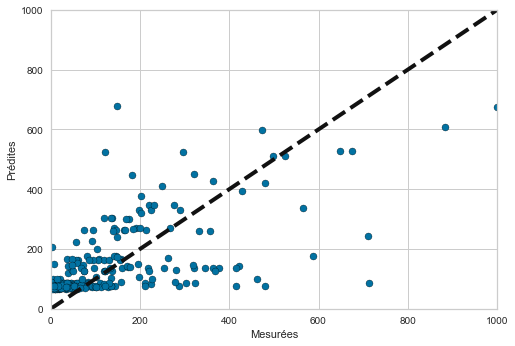

In [270]:
# Graphique de Prédictions :

fig, ax = plt.subplots()
ax.scatter(y_test_ENERGYSTARScore, y_pred_ENERGYSTARScore, edgecolors=(0, 0, 0))
ax.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
ax.set_xlim([0, 1000])
ax.set_ylim([0, 1000])
ax.set_xlabel('Mesurées')
ax.set_ylabel('Prédites')
plt.show()

In [271]:
# Résultats Modèles Ensemblistes :

import math
resultsenergystarscore = resultsenergystarscore.append(pd.DataFrame({
    'Modèle' : ['XG BOOST Regression'],'R^2' : r2_score(y_test_ENERGYSTARScore, y_pred_ENERGYSTARScore),'Mean Absolute Error' : metrics.mean_absolute_error(y_test_ENERGYSTARScore, y_pred_ENERGYSTARScore),'Mean Squared Error': metrics.mean_squared_error(y_test_ENERGYSTARScore, y_pred_ENERGYSTARScore),
    'Score_RMSE' : [np.sqrt(metrics.mean_squared_error(y_test_ENERGYSTARScore, y_pred_ENERGYSTARScore))]}),
              ignore_index=True)

In [272]:
# Présentation des Résultats :

resultsenergystarscore

,Modèle,R^2,Mean Absolute Error,Mean Squared Error,Score_RMSE
0,Baseline Moyenne,-0.000002,246.483212,979300.931612,989.596348
1,Baseline Médiane,-0.000002,246.483212,979300.931612,989.596348
2,Régression Linéaire Multiple,0.300428,255.955664,685090.199412,827.701758
3,Régression Ridge,0.299196,255.874891,686296.166904,828.429941
4,Régression Lasso,0.293774,255.232560,691605.891579,831.628458
5,Régression Elastic Net,0.048966,240.351083,931346.117872,965.062753
6,Random Forest Regression,0.204572,151.662633,778961.180449,882.587775
7,XG BOOST Regression,0.259875,154.286165,724803.588942,851.353974


# Validation Croisée et Optimisation des Hyperparamètres :

# Régression Linéaire :

# Elastic Net / Cross Validation :

In [273]:
# Importation :

from sklearn.linear_model import LinearRegression,Ridge, ElasticNet, Lasso
from sklearn.metrics import mean_squared_error, r2_score
from numpy import mean
from numpy import std
from numpy import absolute

In [274]:
# Fit du Modèle :

model = ElasticNet(random_state=0)
model.fit(X_train_ENERGYSTARScore, y_train_ENERGYSTARScore)
print('Train score:', model.score(X_train_ENERGYSTARScore, y_train_ENERGYSTARScore))
print('Test score:', model.score(X_test_ENERGYSTARScore, y_test_ENERGYSTARScore))

Train score: 0.5086910274799956
Test score: 0.04896621048795535


In [275]:
from sklearn.model_selection import cross_val_score 

scores = cross_val_score(ElasticNet(random_state=0), X_train_ENERGYSTARScore, y_train_ENERGYSTARScore, cv=5, scoring ='neg_mean_absolute_error')
scores

scores = absolute(scores)
print('Mean MAE: %.3f (%.3f)' % (mean(scores), std(scores)))

Mean MAE: 198.186 (28.411)


# Elastic Net / Grid Search :

# Rappel de la Fonction de Coût du Elasticnet :

1 / (2 * n_samples) * ||y - Xw||^2_2 + alpha * l1_ratio * ||w||_1 + 0.5 * alpha * (1 - l1_ratio) * ||w||^2_2

Alpha est un coefficient qui multiplie le terme de pénalité.

L1 ratio, si L1 = 1 alors Lasso, L1 = 0 alors Ridge.

In [276]:
# Importation :

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import ElasticNet

In [277]:
# Paramètrage :

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import ElasticNet

parameters = {"tol" : [0.1,0.01,0.001,0.0001],
              "alpha": [0.0001, 0.001, 0.01, 0.1, 1, 10, 100],
              "l1_ratio": np.arange(0.0, 1.0, 0.1)}


elastic_grid = GridSearchCV(estimator = ElasticNet(), 
                      param_grid = parameters,
                      scoring = 'neg_mean_squared_error',
                      cv=5,
                      verbose=0
                     )

elastic_grid.fit(X_train_ENERGYSTARScore, y_train_ENERGYSTARScore)

GridSearchCV(cv=5, estimator=ElasticNet(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100],
                         'l1_ratio': array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]),
                         'tol': [0.1, 0.01, 0.001, 0.0001]},
             scoring='neg_mean_squared_error')

In [278]:
# Recherche des Hyperparamètres Optimaux :

elastic_grid.best_params_

{'alpha': 1, 'l1_ratio': 0.9, 'tol': 0.1}

# Modèles Ensemblistes :

# Random Forest Regression / Cross Validation :

In [279]:
# Import Random Forest Regressor :

from sklearn.ensemble import RandomForestRegressor

In [280]:
# Fit du Modèle :

model = RandomForestRegressor(n_estimators = 10, random_state=0)
model.fit(X_train_ENERGYSTARScore, y_train_ENERGYSTARScore)
print('Train score:', model.score(X_train_ENERGYSTARScore, y_train_ENERGYSTARScore))
print('Test score:', model.score(X_test_ENERGYSTARScore, y_test_ENERGYSTARScore))

Train score: 0.8981110942460877
Test score: 0.2045724042767072


In [281]:
from sklearn.model_selection import cross_val_score 

scores = cross_val_score(model, X_train_ENERGYSTARScore, y_train_ENERGYSTARScore, cv=5, scoring ='neg_mean_absolute_error')
scores

scores = absolute(scores)
print('Mean MAE: %.3f (%.3f)' % (mean(scores), std(scores)))

Mean MAE: 136.299 (32.994)


# Random Forest Regression / Grid Search :

In [282]:
# Importation :

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor

In [283]:
# Paramètrage :

from sklearn.ensemble import RandomForestRegressor

parameters = {
    'n_estimators' : [10,50,100], # Nombre d'Arbres de Décision.
    'min_samples_leaf' : [1,3,5,10], # Nombre de Feuilles Minimales dans un Noeud.
    'max_features': ['auto', 'sqrt'] # Nombre de Features observées pour chaque Arbre.
}

rfr_search = GridSearchCV(RandomForestRegressor(),
                               param_grid = parameters,
                               scoring='neg_mean_squared_error',
                               verbose=2,
                               cv=5)

rfr_search.fit(X_train_ENERGYSTARScore, y_train_ENERGYSTARScore)

Fitting 5 folds for each of 24 candidates, totalling 120 fits
[CV] END max_features=auto, min_samples_leaf=1, n_estimators=10; total time=   0.1s
[CV] END max_features=auto, min_samples_leaf=1, n_estimators=10; total time=   0.1s
[CV] END max_features=auto, min_samples_leaf=1, n_estimators=10; total time=   0.1s
[CV] END max_features=auto, min_samples_leaf=1, n_estimators=10; total time=   0.1s
[CV] END max_features=auto, min_samples_leaf=1, n_estimators=10; total time=   0.1s
[CV] END max_features=auto, min_samples_leaf=1, n_estimators=50; total time=   0.3s
[CV] END max_features=auto, min_samples_leaf=1, n_estimators=50; total time=   0.3s
[CV] END max_features=auto, min_samples_leaf=1, n_estimators=50; total time=   0.3s
[CV] END max_features=auto, min_samples_leaf=1, n_estimators=50; total time=   0.3s
[CV] END max_features=auto, min_samples_leaf=1, n_estimators=50; total time=   0.3s
[CV] END max_features=auto, min_samples_leaf=1, n_estimators=100; total time=   0.6s
[CV] END max_

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 3, 5, 10],
                         'n_estimators': [10, 50, 100]},
             scoring='neg_mean_squared_error', verbose=2)

In [284]:
# Recherche des Hyperparamètres Optimaux :

rfr_search.best_params_

{'max_features': 'sqrt', 'min_samples_leaf': 1, 'n_estimators': 100}

# XG Boost / Grid Search :

In [285]:
# Paramètrage :

from xgboost import XGBRegressor


parameters = {
    'n_estimators' : [100,500,1000]
}

xgb_grid = GridSearchCV(XGBRegressor(n_jobs=-1),
                        param_grid = parameters,
                        scoring = 'neg_mean_squared_error',
                        cv = 5,
                        verbose=5)
xgb_grid.fit(X_train_ENERGYSTARScore, y_train_ENERGYSTARScore)

Fitting 5 folds for each of 3 candidates, totalling 15 fits
[CV 1/5] END .............n_estimators=100;, score=-50636.331 total time=   0.3s
[CV 2/5] END ..............n_estimators=100;, score=-9946.120 total time=   0.2s
[CV 3/5] END ............n_estimators=100;, score=-456497.147 total time=   0.2s
[CV 4/5] END .............n_estimators=100;, score=-49242.606 total time=   0.2s
[CV 5/5] END .............n_estimators=100;, score=-54333.295 total time=   0.2s
[CV 1/5] END .............n_estimators=500;, score=-50489.568 total time=   0.9s
[CV 2/5] END ..............n_estimators=500;, score=-9822.069 total time=   0.8s
[CV 3/5] END ............n_estimators=500;, score=-456286.751 total time=   0.8s
[CV 4/5] END .............n_estimators=500;, score=-48958.954 total time=   0.8s
[CV 5/5] END .............n_estimators=500;, score=-54307.587 total time=   0.9s
[CV 1/5] END ............n_estimators=1000;, score=-50489.406 total time=   1.3s
[CV 2/5] END .............n_estimators=1000;, sco

GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None,
                                    enable_categorical=False, gamma=None,
                                    gpu_id=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, max_delta_step=None,
                                    max_depth=None, min_child_weight=None,
                                    missing=nan, monotone_constraints=None,
                                    n_estimators=100, n_jobs=-1,
                                    num_parallel_tree=None, predictor=None,
                                    random_state=None, reg_alpha=None,
                                    reg_lambda=None, scale_pos_weight=None,
         

In [286]:
# Recherche des Hyperparamètres Optimaux :

xgb_grid.best_params_

{'n_estimators': 1000}

In [287]:
# Recherche des Estimateurs Optimaux :

xgb_grid.best_estimator_

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.300000012,
             max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=1000, n_jobs=-1,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [288]:
# Recherche des Hyperparamètres Optimaux :

xgb_grid.best_estimator_.feature_importances_

array([8.8916957e-02, 2.1231064e-04, 6.2812651e-03, 5.2909111e-04,
       9.2608100e-03, 3.7631239e-03, 4.0518738e-02, 8.7393910e-02,
       4.7282287e-01, 1.3131619e-02, 1.8639235e-02, 1.7302050e-01,
       6.1952109e-03, 3.6974787e-03, 0.0000000e+00, 6.7274541e-02,
       8.3423117e-03], dtype=float32)

# Méthode A Noyaux :

# Support Vector Regression / Grid Search :

In [289]:
# Paramètrage :

from sklearn.svm import SVR

parameters = {'gamma' : [1e-4, 1e-3, 1e-2, 1e-1], # Kernel Coefficient [ici kernel = Radial Basis Function]
              'epsilon' : [0.001, 0.01, 0.1, 1], # Erreur tolérée par l'algorithme
              'C' : [0.001, 0.01, 0.1, 1, 10]} # Parametre de régularisation

svm = GridSearchCV(estimator = SVR(), 
                      param_grid = parameters,
                      scoring = 'neg_mean_squared_error',
                      cv=5,
                   verbose=2
                     )

svm.fit(X_train_ENERGYSTARScore, y_train_ENERGYSTARScore)

Fitting 5 folds for each of 80 candidates, totalling 400 fits
[CV] END ...............C=0.001, epsilon=0.001, gamma=0.0001; total time=   0.1s
[CV] END ...............C=0.001, epsilon=0.001, gamma=0.0001; total time=   0.1s
[CV] END ...............C=0.001, epsilon=0.001, gamma=0.0001; total time=   0.1s
[CV] END ...............C=0.001, epsilon=0.001, gamma=0.0001; total time=   0.1s
[CV] END ...............C=0.001, epsilon=0.001, gamma=0.0001; total time=   0.1s
[CV] END ................C=0.001, epsilon=0.001, gamma=0.001; total time=   0.1s
[CV] END ................C=0.001, epsilon=0.001, gamma=0.001; total time=   0.1s
[CV] END ................C=0.001, epsilon=0.001, gamma=0.001; total time=   0.1s
[CV] END ................C=0.001, epsilon=0.001, gamma=0.001; total time=   0.1s
[CV] END ................C=0.001, epsilon=0.001, gamma=0.001; total time=   0.1s
[CV] END .................C=0.001, epsilon=0.001, gamma=0.01; total time=   0.1s
[CV] END .................C=0.001, epsilon=0.00

GridSearchCV(cv=5, estimator=SVR(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10],
                         'epsilon': [0.001, 0.01, 0.1, 1],
                         'gamma': [0.0001, 0.001, 0.01, 0.1]},
             scoring='neg_mean_squared_error', verbose=2)

In [290]:
# Recherche des Hyperparamètres Optimaux :

svm.best_params_

{'C': 10, 'epsilon': 0.001, 'gamma': 0.01}

In [291]:
# Recherche des Scores Optimaux :

svm.best_score_

-521177.58030534396

# FEATURE IMPORTANCE :

In [292]:
# Feature Importance par XGBoost :

model_6_xgboost = XGBRegressor(n_estimators=50, 
                     max_depth=7, 
                     eta=0.1, 
                     subsample=0.7, 
                     colsample_bytree=0.8, 
                     objective ='reg:squarederror')
model_6_xgboost.fit(X_train_ENERGYSTARScore, y_train_ENERGYSTARScore)

scores = cross_val_score(model_6_xgboost, X_train_ENERGYSTARScore, y_train_ENERGYSTARScore,cv=10)
print("Training Data Mean cross-validation score: %.2f" % scores.mean())

scores = cross_val_score(model_6_xgboost, X_test_ENERGYSTARScore, y_test_ENERGYSTARScore,cv=10)
print("Test Data Mean cross-validation score: %.2f" % scores.mean())

Training Data Mean cross-validation score: -1.40
Test Data Mean cross-validation score: -1.53


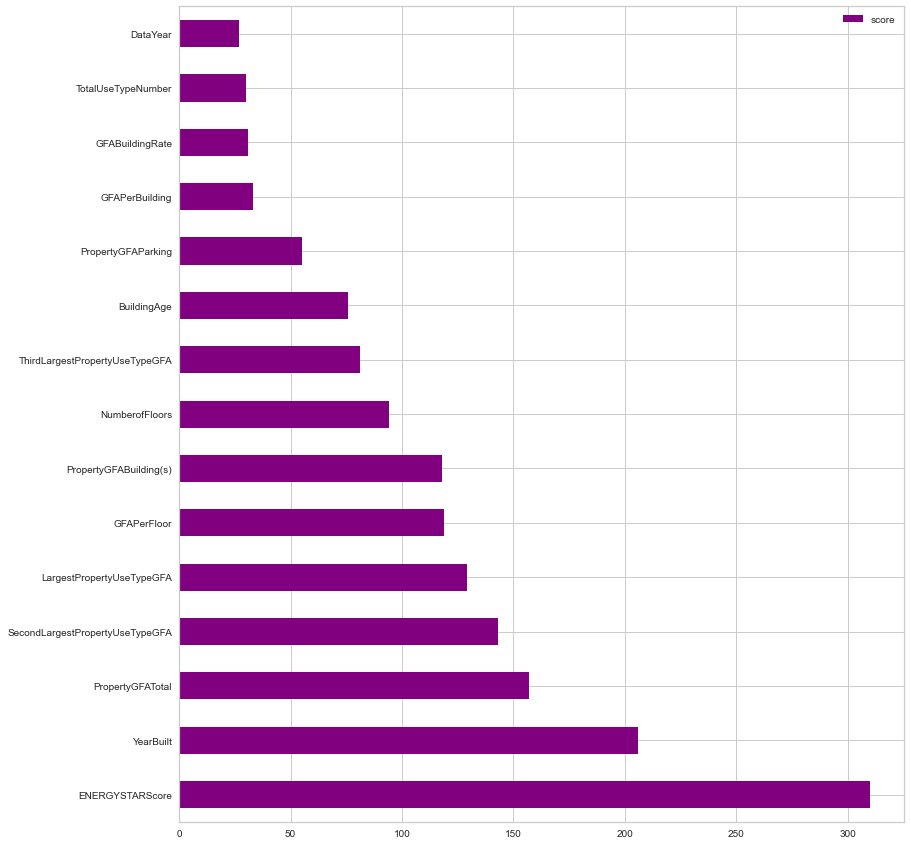

In [293]:
# Graphique de représentation des influences des Variables sur nos résultats :

def display_feat_imp_rforest(model):
  feature_imp = model_6_xgboost.get_booster().get_score(importance_type='weight')
  keys = list(feature_imp.keys())
  values = list(feature_imp.values())
  data = pd.DataFrame(data=values, index=keys, columns=["score"]).sort_values(by = "score", ascending=False)
  data.nlargest(15, columns="score").plot(kind='barh', figsize = (13,15), color = 'purple') 
 
display_feat_imp_rforest(model_6_xgboost)

# PERMUTATION IMPORTANCE :

In [294]:
pip install eli5

Note: you may need to restart the kernel to use updated packages.


In [295]:
# Importation :

import eli5
from eli5.sklearn import PermutationImportance

In [296]:
# Calcul Modèlisation Ridge :

from sklearn.linear_model import Ridge
model = Ridge(alpha=1e-2).fit(X_train_ENERGYSTARScore, y_train_ENERGYSTARScore)
model.score(X_test_ENERGYSTARScore, y_test_ENERGYSTARScore)

0.3004153700509442

In [297]:
# Tableau de Pondération :

perm = PermutationImportance(model, random_state=1).fit(X_test_ENERGYSTARScore, y_test_ENERGYSTARScore)
eli5.show_weights(perm, feature_names = X_test_ENERGYSTARScore.columns.tolist())

Weight,Feature
1.7939 ± 0.0779,LargestPropertyUseTypeGFA
0.2927 ± 0.0624,NumberofFloors
0.1844 ± 0.0059,SecondLargestPropertyUseTypeGFA
0.1646 ± 0.0518,PropertyGFAParking
0.1070 ± 0.0417,PropertyGFABuilding(s)
0.0631 ± 0.0462,PropertyGFATotal
0.0100 ± 0.0106,ENERGYSTARScore
0.0032 ± 0.0045,GFABuildingRate
0.0023 ± 0.0072,GFAParkingRate
0.0001 ± 0.0004,DataYear
